# CHALLENGE

Integrantes:

Bruno Marcelo de Rosa		RM 563779

Danilo Oliveira Alves			RM 564109

Fred Henrique Ferreira de Sousa	RM 565725

Luana Fernandes Silva Ferreira	RM 560474

Vinicius de Sousa Macedo		RM 561911

Desafio 1 - SEGUIMENTAR
1. Decodificando o Comportamento do Cliente
- Perfil de compra
Objsetivo: Seguimentar os clientes em grupos distintos com base em seu histórico de compras
- foco em entender os diferentes perfis de viajantes
- possam ser tratados por Growth (promoções, e-mails, marketing, push)

PLUS: Construir um dashboard para monitorar o comportamento de compra dos grupos de clientes

Desafio 2 - PREVISÂO

2. timing é tudo
- Prever, para um conjunto de clientes se eles realizarão qualquer compra na plataforma dentro de uma janeala de tempo futura definida (próximos 7 ou 30 dias)
- classificação binária

PLUS: prever o número de dias até a próxima compra do cliente

Desafio 3 - PREVISÂO

3. Previsão do próximo trecho
- prever qual o trecho específico (par origem-destino) um cliente tem maior probabilidade de comprar em sua próxima viagem
- pode ser abordado como classificação multi-classe ou recomendação

Plus: combinar com o desafio 2, entregando a data e trecho da próxima compra

# Base inicial

##Bibliotecas e leitura dos dados

In [ ]:
import pandas as pd
import numpy as np
import numbers
import gdown

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                             roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
                             classification_report, silhouette_score)

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from tqdm import tqdm

In [ ]:
url_df_t = "https://drive.google.com/uc?id=1H43N5nTAWX7TdPIkX1G3nf50bxTw18JD"
out_df_t= "challenge.csv"

gdown.download(url_df_t, out_df_t)

Downloading...
From (original): https://drive.google.com/uc?id=1H43N5nTAWX7TdPIkX1G3nf50bxTw18JD
From (redirected): https://drive.google.com/uc?id=1H43N5nTAWX7TdPIkX1G3nf50bxTw18JD&confirm=t&uuid=28d1feca-5db9-4cfa-bb15-1a8893a9c0c5
To: /content/challenge.csv
100%|██████████| 660M/660M [00:07<00:00, 83.7MB/s]


'challenge.csv'

In [ ]:
df = pd.read_csv('/content/challenge.csv', index_col = 0)

##Analise exploratória inicial dos dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1741344 entries, bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef1fee010c95dcbbab9 to 113a96cafbc0fc70ab6cfba8bc017c57e720366265820c128b3ecc23f846a628
Data columns (total 11 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   fk_contact                      object 
 1   date_purchase                   object 
 2   time_purchase                   object 
 3   place_origin_departure          object 
 4   place_destination_departure     object 
 5   place_origin_return             object 
 6   place_destination_return        object 
 7   fk_departure_ota_bus_company    object 
 8   fk_return_ota_bus_company       object 
 9   gmv_success                     float64
 10  total_tickets_quantity_success  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 159.4+ MB


In [ ]:
df.shape

(1741344, 11)

In [ ]:
df.isnull().sum()

fk_contact                        0
date_purchase                     0
time_purchase                     0
place_origin_departure            0
place_destination_departure       0
place_origin_return               0
place_destination_return          0
fk_departure_ota_bus_company      0
fk_return_ota_bus_company         0
gmv_success                       0
total_tickets_quantity_success    0
dtype: int64

In [ ]:
df.head()

fk_contact  \
nk_ota_localizer_id                                                                                     
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef...  a7218ff4ee7d37d48d2b4391b955627cb089870b934912...   
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e7...  37228485e0dc83d84d1bcd1bef3dc632301bf6cb22c8b5...   
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec...  3467ec081e2421e72c96e7203b929d21927fd00b6b5f28...   
4dc44a6dd592b702feccb493d192210c86965aee6845298...  ab3251a2be0f69713b8f97b0e9d1579e31551f4fd4facf...   
aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f...  ceea0de820a6379f2c4215bddaec66c33994b304607e56...   

                                                   date_purchase  \
nk_ota_localizer_id                                                
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef...    2018-12-26   
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e7...    2018-12-05   
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec...    2018-12-21   
4dc44a6dd592b702feccb493d192210c86965aee6845298...    2018-12-06   
aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f...    2021-02-23   

                                                   time_purchase  \
nk_ota_localizer_id                                                
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef...      15:33:35   
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e7...      15:07:57   
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec...      18:41:54   
4dc44a6dd592b702feccb493d192210c86965aee6845298...      14:01:38   
aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f...      20:08:25   

                                                                               place_origin_departure  \
nk_ota_localizer_id                                                                                     
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef...  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...   
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e7...  10e4e7caf8b078429bb1c80b1a10118ac6f963eff098fd...   
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec...  7688b6ef52555962d008fff894223582c484517cea7da4...   
4dc44a6dd592b702feccb493d192210c86965aee6845298...  4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...   
aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f...  7688b6ef52555962d008fff894223582c484517cea7da4...   

                                                                          place_destination_departure  \
nk_ota_localizer_id                                                                                     
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef...  50e9a8665b62c8d68bccc77c7c92431a1aa26ccbd38ed4...   
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e7...  e6d41d208672a4e50b86d959f4a6254975e6fb9b088116...   
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec...  8c1f1046219ddd216a023f792356ddf127fce372a72ec9...   
4dc44a6dd592b702feccb493d192210c86965aee6845298...  d6acb3c1a79e57bcc03d976cb4d98f56edccd4cf426392...   
aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f...  23765fc69c4e3c0b10f5d15471dc2245e2a19af16b513f...   

                                                   place_origin_return  \
nk_ota_localizer_id                                                      
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef...                   0   
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e7...                   0   
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec...                   0   
4dc44a6dd592b702feccb493d192210c86965aee6845298...                   0   
aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f...                   0   

                                                   place_destination_return  \
nk_ota_localizer_id                                                           
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef...                        0   
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e7...                        0   
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec...                        0   
4dc44a6dd592b70

In [ ]:
df.nunique()

fk_contact                        581817
date_purchase                       3835
time_purchase                      83937
place_origin_departure              2551
place_destination_departure         2899
place_origin_return                 1859
place_destination_return            1419
fk_departure_ota_bus_company         299
fk_return_ota_bus_company            275
gmv_success                        83218
total_tickets_quantity_success        12
dtype: int64

In [ ]:
inicial_date = df['date_purchase'].min()
final_date = df['date_purchase'].max()

print(f"Data Inicial dos Dados: {inicial_date}")
print(f"Data Final dos Dados: {final_date}")

Data Inicial dos Dados: 2013-09-12
Data Final dos Dados: 2024-04-01


## Tirar os dados do HASH

In [ ]:
# concatenar colunas e aplicar um codigo unico
colunas_cidade = [
    'place_origin_departure',
    'place_destination_departure',
    'place_origin_return',
    'place_destination_return'
]

hashes_validos_cidades = np.concatenate([
    df[col][df[col] != '0'].unique() for col in colunas_cidade
])

hashes_cidade_unicos = pd.Series(hashes_validos_cidades).unique()
mapeamento_cidades = {h: i for i, h in enumerate(hashes_cidade_unicos)}

def gerar_legenda_cidades(hash_val):
    if hash_val == '0':
        return '0'
    return f'Cidade_{mapeamento_cidades.get(hash_val, "NA")}'

for col in colunas_cidade:
    legenda = col + '_legend'
    df[legenda] = df[col].map(gerar_legenda_cidades)

In [ ]:
colunas_empresas = [
    'fk_departure_ota_bus_company',
    'fk_return_ota_bus_company'
]

hashes_validos_empresas = np.concatenate([
    df[col][df[col] != '0'].unique() for col in colunas_empresas
])
hashes_empresas_unicos = pd.Series(hashes_validos_empresas).unique()
mapeamento_empresas = {h: i for i, h in enumerate(hashes_empresas_unicos)}

def gerar_legenda_empresas(hash_val):
  if hash_val == '1':
    return f'1'
  return f'Empresa_{mapeamento_empresas.get(hash_val, "NA")}'

for col in colunas_empresas:
  legenda = col+'_legend'
  df[legenda] = df[col].map(gerar_legenda_empresas)

In [ ]:
df['fk_contact_legend'] = df['fk_contact'].astype('category').cat.codes
df['fk_contact_legend'] = 'Cliente_' + df['fk_contact_legend'].astype(str)

In [ ]:
# Guardar os dados originais (em hash) em dicionários, para consultas futuras e remoção no df para facilitar visualização
mapa_fk_contact = dict(zip(df['fk_contact_legend'], df['fk_contact']))
mapa_place_origin_departure = dict(zip(df['place_origin_departure_legend'], df['place_origin_departure']))
mapa_place_destination_departure = dict(zip(df['place_destination_departure_legend'], df['place_destination_departure']))
mapa_place_origin_return = dict(zip(df['place_origin_return_legend'], df['place_origin_return']))
mapa_place_destination_return = dict(zip(df['place_destination_return_legend'], df['place_destination_return']))
mapa_fk_departure_ota_bus_company = dict(zip(df['fk_departure_ota_bus_company_legend'], df['fk_departure_ota_bus_company']))
mapa_fk_return_ota_bus_company = dict(zip(df['fk_return_ota_bus_company_legend'], df['fk_return_ota_bus_company']))

Fácil de consultar depois, caso necessário, fazer um de == para

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1741344 entries, bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef1fee010c95dcbbab9 to 113a96cafbc0fc70ab6cfba8bc017c57e720366265820c128b3ecc23f846a628
Data columns (total 18 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   fk_contact                           object 
 1   date_purchase                        object 
 2   time_purchase                        object 
 3   place_origin_departure               object 
 4   place_destination_departure          object 
 5   place_origin_return                  object 
 6   place_destination_return             object 
 7   fk_departure_ota_bus_company         object 
 8   fk_return_ota_bus_company            object 
 9   gmv_success                          float64
 10  total_tickets_quantity_success       int64  
 11  place_origin_departure_legend        object 
 12  place_destination_departure_legend   object 
 13  place_origin_retu

In [ ]:
# drop das variaveis para limpar o df
df = df.drop(['fk_contact', 'place_origin_departure', 'place_origin_return', 'place_destination_return', 'place_destination_departure', 'fk_departure_ota_bus_company', 'fk_return_ota_bus_company'], axis=1)

## Rename das variaveis

In [ ]:
# renomeando as variaveis
df = df.rename(columns={
    'date_purchase': 'data_compra',
  'fk_contact_legend': 'id_cliente',
  'place_origin_departure_legend': 'origem_ida',
  'place_destination_departure_legend': 'destino_ida',
  'place_origin_return_legend': 'origem_volta',
  'place_destination_return_legend': 'destino_volta',
  'fk_departure_ota_bus_company_legend': 'empresa_ida',
  'fk_return_ota_bus_company_legend': 'empresa_volta',
  'total_tickets_quantity_success': 'quantidade_tickets',
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1741344 entries, bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef1fee010c95dcbbab9 to 113a96cafbc0fc70ab6cfba8bc017c57e720366265820c128b3ecc23f846a628
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   data_compra         object 
 1   time_purchase       object 
 2   gmv_success         float64
 3   quantidade_tickets  int64  
 4   origem_ida          object 
 5   destino_ida         object 
 6   origem_volta        object 
 7   destino_volta       object 
 8   empresa_ida         object 
 9   empresa_volta       object 
 10  id_cliente          object 
dtypes: float64(1), int64(1), object(9)
memory usage: 223.9+ MB


## Limpeza inicial

Remoção de linhas que foram consideradas como "erros"

In [ ]:
negative_gmv_condition = df['gmv_success'] <= 0
negative_gmv_count = negative_gmv_condition.sum()
print(f'Quantidade de valores negativos em valor_ticket: {negative_gmv_count}')

df = df[~negative_gmv_condition]

Quantidade de valores negativos em valor_ticket: 185


In [ ]:
iguais_origem_destino = df['origem_ida'] == df['destino_ida']
quantidade = iguais_origem_destino.sum()
print(f"Quantidade de linhas onde origem ida é igual a destino ida: {quantidade}")

df = df[~iguais_origem_destino]

Quantidade de linhas onde origem ida é igual a destino ida: 14742


In [ ]:
diferente_ida_volta = (df['origem_ida'] != df['destino_volta']) & (df['destino_volta'] != '0')
quantidade = diferente_ida_volta.sum()
print(f"Quantidade de linhas onde origem ida é diferente de destino volta e destino volta é diferente de 0: {quantidade}")

df = df[~diferente_ida_volta]

Quantidade de linhas onde origem ida é diferente de destino volta e destino volta é diferente de 0: 2350


In [ ]:
df.head()

data_compra time_purchase  \
nk_ota_localizer_id                                                            
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef...  2018-12-26      15:33:35   
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e7...  2018-12-05      15:07:57   
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec...  2018-12-21      18:41:54   
4dc44a6dd592b702feccb493d192210c86965aee6845298...  2018-12-06      14:01:38   
aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f...  2021-02-23      20:08:25   

                                                    gmv_success  \
nk_ota_localizer_id                                               
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef...        89.09   
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e7...       155.97   
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec...       121.99   
4dc44a6dd592b702feccb493d192210c86965aee6845298...        55.22   
aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f...        45.31   

                                                    quantidade_tickets  \
nk_ota_localizer_id                                                      
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef...                   1   
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e7...                   1   
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec...                   1   
4dc44a6dd592b702feccb493d192210c86965aee6845298...                   1   
aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f...                   1   

                                                   origem_ida  destino_ida  \
nk_ota_localizer_id                                                          
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef...   Cidade_0    Cidade_76   
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e7...   Cidade_1   Cidade_900   
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec...   Cidade_2   Cidade_367   
4dc44a6dd592b702feccb493d192210c86965aee6845298...   Cidade_3  Cidade_1284   
aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f...   Cidade_2    Cidade_65   

                                                   origem_volta destino_volta  \
nk_ota_localizer_id                                                             
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef...            0             0   
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e7...            0             0   
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec...            0             0   
4dc44a6dd592b702feccb493d192210c86965aee6845298...            0             0   
aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f...            0             0   

                                                   empresa_ida empresa_volta  \
nk_ota_localizer_id                                                            
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef...   Empresa_0             1   
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e7...   Empresa_1             1   
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec...   Empresa_2             1   
4dc44a6dd592b702feccb493d192210c86965aee6845298...   Empresa_3             1   
aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f...   Empresa_4             1   

                                                        id_cliente  
nk_ota_localizer_id                                                 
bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674ef...  Cliente_380081  
5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e7...  Cliente_125030  
fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8ec...  Cliente_118673  
4dc44a6dd592b702feccb493d192210c86965aee6845298...  Cliente_389356  
aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181f...  Cliente_470537

In [ ]:
condicao = (df['quantidade_tickets'] == 1) & (df['destino_volta'] != '0')
qtd_linhas = condicao.sum()
print(f"Quantidade de linhas que mostram que 1 ticket gerou passagem de ida e volta {qtd_linhas}")

df = df[~condicao]

Quantidade de linhas que mostram que 1 ticket gerou passagem de ida e volta 31


## Separação dos dados de teste

In [ ]:
df['data_compra'] = pd.to_datetime(df['data_compra'])
df.sort_values(by='data_compra', inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
print("DataFrame convertido para datetime e ordenado cronologicamente.")
print(f"Período completo dos dados: de {df['data_compra'].min().date()} até {df['data_compra'].max().date()}")

DataFrame convertido para datetime e ordenado cronologicamente.
Período completo dos dados: de 2013-09-12 até 2024-04-01


11 de março de 2020, a COVID-19 foi caracterizada pela OMS como uma pandemia

5 de maio de 2023, a OMS declarou o fim da COVID-19.

fonte: https://www.paho.org/pt/historico-da-emergencia-internacional-covid-19

In [ ]:
inicio_covid = pd.to_datetime('2020-03-11')
fim_covid = pd.to_datetime('2023-05-05')

def classificar_periodo(data):
    if data < inicio_covid:
        return 'pre-covid'
    elif data <= fim_covid:
        return 'durante-covid'
    else:
        return 'pos-covid'

df['periodo_covid'] = df['data_compra'].apply(classificar_periodo)

print("Coluna 'periodo_covid' criada com sucesso!")
print(df['periodo_covid'].value_counts())

Coluna 'periodo_covid' criada com sucesso!
periodo_covid
durante-covid    862689
pre-covid        503070
pos-covid        358277
Name: count, dtype: int64


 A pandemia foi um **"choque exógeno"** que alterou drasticamente os padrões de viagem. Sem essa variável, o modelo tentaria encontrar um padrão linear em um comportamento que foi tudo, menos linear. Ao criar essa feature, nós damos ao modelo um contexto crucial. Ele poderá aprender que:

In [ ]:
def split_by_size(df, test_size, val_size):
    assert len(df) > test_size + val_size, "Tamanhos de teste/validação excedem o DataFrame total."

    df_test = df.tail(test_size).copy()
    df_train = df.iloc[:-test_size].copy()
    df_val = df_train.tail(val_size).copy()
    df_train_final = df_train.iloc[:-val_size].copy()

    print("--- Divisão Concluída ---")
    print(f"Treino: {df_train_final.shape} | Validação: {df_val.shape} | Teste: {df_test.shape}")
    print(f"Período do treino: {df_train_final['data_compra'].min().date()} até {df_train_final['data_compra'].max().date()}")
    print(f"Período da validação: {df_val['data_compra'].min().date()} até {df_val['data_compra'].max().date()}")
    print(f"Período do teste: {df_test['data_compra'].min().date()} até {df_test['data_compra'].max().date()}")

    return df_train_final, df_val, df_test

df_train_final, df_val, df_test = split_by_size(df, test_size=340000, val_size=170000)

--- Divisão Concluída ---
Treino: (1214036, 12) | Validação: (170000, 12) | Teste: (340000, 12)
Período do treino: 2013-09-12 até 2022-12-18
Período da validação: 2022-12-18 até 2023-05-26
Período do teste: 2023-05-26 até 2024-04-01


**O comportamento de compra é temporal.** Padrões de consumo, popularidade de trechos e até o efeito de campanhas de marketing mudam ao longo do tempo. Se usássemos uma divisão aleatória (como train_test_split faria por padrão), nosso modelo de treino aprenderia com dados futuros para prever o passado (data leakage ou vazamento de dados). Isso inflaria artificialmente as métricas de performance, mas o modelo falharia miseravelmente em produção, pois nunca viu dados tão recentes.


In [ ]:
df_train_final['split'] = 'train'
df_val['split'] = 'val'
df_test['split'] = 'test'

df_completo = pd.concat([df_train_final, df_val, df_test], ignore_index=True)
print("DataFrame completo criado com sucesso!")
print(df_completo['split'].value_counts())

DataFrame completo criado com sucesso!
split
train    1214036
test      340000
val       170000
Name: count, dtype: int64


In [ ]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724036 entries, 0 to 1724035
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   data_compra         datetime64[ns]
 1   time_purchase       object        
 2   gmv_success         float64       
 3   quantidade_tickets  int64         
 4   origem_ida          object        
 5   destino_ida         object        
 6   origem_volta        object        
 7   destino_volta       object        
 8   empresa_ida         object        
 9   empresa_volta       object        
 10  id_cliente          object        
 11  periodo_covid       object        
 12  split               object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 171.0+ MB


In [ ]:
df_completo.shape

(1724036, 13)

In [ ]:
df_completo.tail()

data_compra time_purchase  gmv_success  quantidade_tickets origem_ida  \
1724031  2024-04-01      16:09:55       137.94                   1   Cidade_2   
1724032  2024-04-01      16:24:43        79.03                   1  Cidade_19   
1724033  2024-04-01      11:01:41       110.91                   1   Cidade_0   
1724034  2024-04-01      11:51:14        57.82                   1  Cidade_33   
1724035  2024-04-01      19:37:10       439.92                   2   Cidade_2   

        destino_ida origem_volta destino_volta empresa_ida empresa_volta  \
1724031    Cidade_3            0             0   Empresa_8             1   
1724032    Cidade_2            0             0  Empresa_24             1   
1724033    Cidade_2            0             0  Empresa_94             1   
1724034   Cidade_56            0             0  Empresa_95             1   
1724035    Cidade_0     Cidade_0      Cidade_2  Empresa_17    Empresa_94   

             id_cliente periodo_covid split  
1724031  Cliente_224316     pos-covid  test  
1724032   Cliente_76142     pos-covid  test  
1724033  Cliente_351446     pos-covid  test  
1724034  Cliente_472322     pos-covid  test  
1724035  Cliente_235902     pos-covid  test

# Analise Exploratória EDA

## Cliente e Ticket

In [ ]:
df_completo['quantidade_tickets'].value_counts()

quantidade_tickets
1     1245598
2      381086
4       50308
3       33916
6        5721
5        4220
8        2294
10        825
12         26
9          21
7          15
16          6
Name: count, dtype: int64

In [ ]:
tickets_por_cliente = df_completo.groupby('id_cliente')['quantidade_tickets'].sum().reset_index()
tickets_por_cliente.columns = ['id_cliente', 'total_tickets']
print(tickets_por_cliente['total_tickets'].describe())

count    575385.000000
mean          4.159789
std          10.759744
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        2338.000000
Name: total_tickets, dtype: float64


In [ ]:
# Analise de Outliers para compras feitas por clientes unicos
Q1 = tickets_por_cliente['total_tickets'].quantile(0.25)
Q3 = tickets_por_cliente['total_tickets'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")
print(f"Limite inferior para outliers (Q3 + 1.5*IQR): {limite_inferior}")
print(f"Limite superior para outliers (Q3 + 1.5*IQR): {limite_superior}")

outliers = tickets_por_cliente[(tickets_por_cliente['total_tickets'] < limite_inferior) | (tickets_por_cliente['total_tickets'] > limite_superior)]
print(f"\nOutliers (acima de {limite_superior:.1f} tickets): {len(outliers)} compras")
print(f"Percentual de outliers: {len(outliers)/len(tickets_por_cliente)*100:.2f}%")

print(f"\nDistribuição de quantidade de tickets:")
freq_tickets = tickets_por_cliente['total_tickets'].value_counts().sort_index()
for valor, freq in freq_tickets.head(10).items():
    percentual = (freq / len(tickets_por_cliente)) * 100
    print(f"{valor} tickets: {freq:,} compras ({percentual:.2f}%)")

Q1 (25%): 1.0
Q3 (75%): 4.0
IQR: 3.0
Limite inferior para outliers (Q3 + 1.5*IQR): -3.5
Limite superior para outliers (Q3 + 1.5*IQR): 8.5

Outliers (acima de 8.5 tickets): 56448 compras
Percentual de outliers: 9.81%

Distribuição de quantidade de tickets:
1 tickets: 197,940 compras (34.40%)
2 tickets: 142,496 compras (24.77%)
3 tickets: 51,729 compras (8.99%)
4 tickets: 55,728 compras (9.69%)
5 tickets: 22,844 compras (3.97%)
6 tickets: 22,875 compras (3.98%)
7 tickets: 12,282 compras (2.13%)
8 tickets: 13,043 compras (2.27%)
9 tickets: 7,744 compras (1.35%)
10 tickets: 7,486 compras (1.30%)


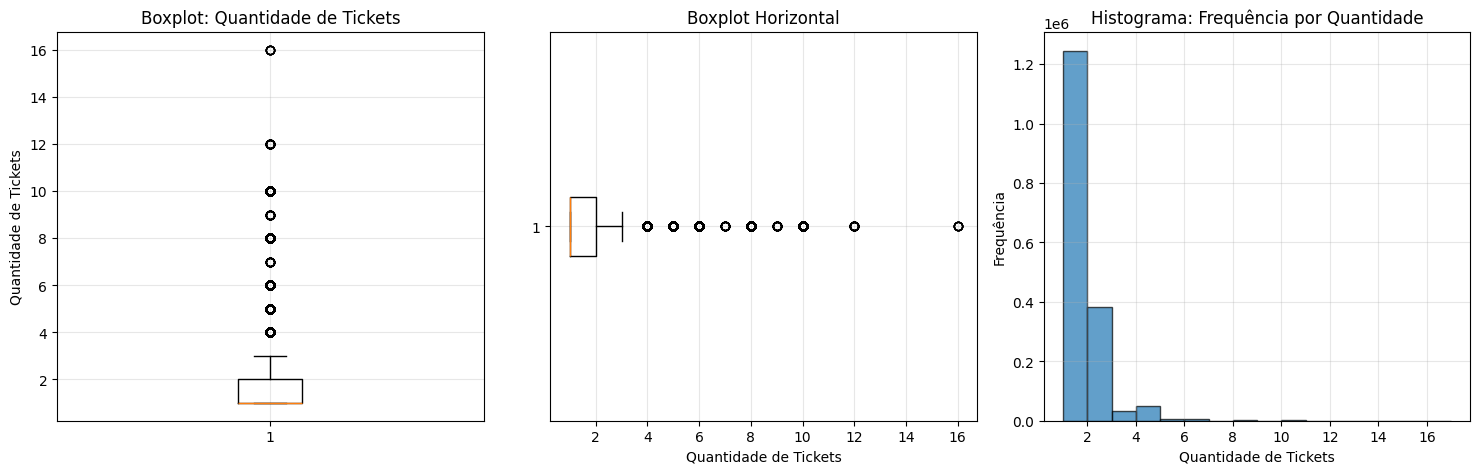

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df_completo['quantidade_tickets'])
plt.title('Boxplot: Quantidade de Tickets')
plt.ylabel('Quantidade de Tickets')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.boxplot(df_completo['quantidade_tickets'], vert=False)
plt.title('Boxplot Horizontal')
plt.xlabel('Quantidade de Tickets')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.hist(df_completo['quantidade_tickets'], bins=range(1, df_completo['quantidade_tickets'].max()+2),
         alpha=0.7, edgecolor='black')
plt.title('Histograma: Frequência por Quantidade')
plt.xlabel('Quantidade de Tickets')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
df_completo.head()

data_compra time_purchase  gmv_success  quantidade_tickets  origem_ida  \
0  2013-09-12      16:04:22        65.63                   1   Cidade_17   
1  2013-09-13      14:37:45       164.78                   2    Cidade_2   
2  2013-09-17      16:28:09        81.62                   1   Cidade_17   
3  2013-09-18      12:41:05        46.42                   1    Cidade_0   
4  2013-09-19      20:24:01        79.30                   1  Cidade_106   

  destino_ida origem_volta destino_volta empresa_ida empresa_volta  \
0  Cidade_132            0             0  Empresa_35             1   
1   Cidade_17            0             0   Empresa_8     Empresa_8   
2    Cidade_2            0             0   Empresa_2             1   
3   Cidade_65            0             0  Empresa_13             1   
4    Cidade_2            0             0   Empresa_2             1   

       id_cliente periodo_covid  split  
0  Cliente_578847     pre-covid  train  
1   Cliente_57527     pre-covid  train  
2  Cliente_513653     pre-covid  train  
3  Cliente_307300     pre-covid  train  
4  Cliente_251592     pre-covid  train

In [ ]:
df_completo['faixa_tickets'] = df_completo['quantidade_tickets'].apply(lambda x: str(x) if x < 4 else '4+')
print(df_completo['faixa_tickets'].value_counts(normalize=True))

faixa_tickets
1     0.722490
2     0.221043
4+    0.036795
3     0.019672
Name: proportion, dtype: float64


Criando uma variável por faixa de tickets, isso reduz a cardinalidade e agrupa outliers em uma classe

In [ ]:
df_completo.shape

(1724036, 14)

## Feriado

In [ ]:
!pip install holidays

In [ ]:
import holidays

data_inicial = df['data_compra'].min()
data_final_total = df['data_compra'].max()

feriados_br = holidays.Brazil(years=range(data_inicial.year, data_final_total.year + 1))
feriados_set = set(feriados_br.keys())

In [ ]:
def adicionar_features_de_data(dataframe, feriados_lookup):
    df_temp = dataframe.copy()

    df_temp['ano'] = df_temp['data_compra'].dt.year
    df_temp['mes'] = df_temp['data_compra'].dt.month
    df_temp['dia'] = df_temp['data_compra'].dt.day
    df_temp['dia_semana'] = df_temp['data_compra'].dt.weekday
    df_temp['fim_de_semana'] = (df_temp['dia_semana'] > 5).astype(int) # Sábado (5) ou Domingo (6)
    df_temp['e_feriado'] = df_temp['data_compra'].dt.date.isin(feriados_lookup).astype(int)

    df_temp['ano'] = df_temp['ano'].astype('int16')
    df_temp['mes'] = df_temp['mes'].astype('int8')
    df_temp['dia'] = df_temp['dia'].astype('int8')
    df_temp['dia_semana'] = df_temp['dia_semana'].astype('int8')
    df_temp['fim_de_semana'] = df_temp['fim_de_semana'].astype('int8')
    df_temp['e_feriado'] = df_temp['e_feriado'].astype('int8')

    return df_temp

df_completo = adicionar_features_de_data(df_completo, feriados_set)

In [ ]:
feriados_lista = []
for ano in range(2013, 2025):
    br_feriados = holidays.Brazil(years=ano)
    for data in br_feriados:
        feriados_lista.append(data)

feriados_intervalo = [
    d for d in feriados_lista
    if pd.to_datetime("2013-01-11").date() <= d <= pd.to_datetime("2024-03-31").date()
]

feriados_intervalo = [pd.to_datetime(d).date() for d in feriados_intervalo]
df_completo['data_feriado'] = df_completo['data_compra'].dt.date.isin(feriados_intervalo).astype(bool)

df_completo['data_compra'] = pd.to_datetime(df_completo['data_compra']).dt.date

feriados_extendido = []
for feriado in feriados_intervalo:
  inicio = feriado - pd.Timedelta(days=5)
  feriados_extendido.extend(
      pd.date_range(start=inicio, end=feriado).date
  )
feriados_extendido = pd.Series(sorted(set(feriados_extendido)))

# criacao de um delta de 5 dias para compras feitas para feriado
df_completo['compra_ate_5_dias_feriado'] = (
    df_completo['data_compra']
    .isin(feriados_extendido)
    .astype(int)
)
print(f"Distribuição:")
print(df_completo['compra_ate_5_dias_feriado'].value_counts())

Distribuição:
compra_ate_5_dias_feriado
0    1419105
1     304931
Name: count, dtype: int64


In [ ]:
df_completo.shape

(1724036, 22)

A ideia de escolher um delta = 5 parte de uma  hipótese inicial forte, baseada no comportamento típico do viajante. É um ponto de partida padrão na indústria, que equilibra bem a captura do sinal do evento sem se contaminar com o ruído de dias normais.

In [ ]:
df_completo['data_compra'] = pd.to_datetime(df_completo['data_compra'])
compras_feriados = df_completo[df_completo['data_feriado'] == True].copy()

feriados_stats = compras_feriados.groupby(compras_feriados['data_compra'].dt.date).agg(
    gmv_total=('gmv_success', 'sum'),
    num_compras=('gmv_success', 'count'),
    tickets_total=('quantidade_tickets', 'sum')
).round(2)

feriados_stats.reset_index(inplace=True)
feriados_stats['data_compra'] = pd.to_datetime(feriados_stats['data_compra'])

feriados_br_dict = holidays.Brazil(years=range(2013, 2025))
feriados_stats['nome_feriado'] = feriados_stats['data_compra'].dt.date.map(feriados_br_dict)

feriados_por_tipo = feriados_stats.groupby('nome_feriado').agg(
    gmv_medio_anual=('gmv_total', 'mean'),
    compras_medias_anual=('num_compras', 'mean'),
    tickets_medios_anual=('tickets_total', 'mean'),
    anos_ocorreu=('data_compra', 'count')
)

top_feriados = feriados_por_tipo.sort_values('gmv_medio_anual', ascending=False).head(10)
print("--- 10 feriados por GMV médio anual ---\n")
display(top_feriados)

--- 10 feriados por GMV médio anual ---



gmv_medio_anual  compras_medias_anual  \
nome_feriado                                                          
Universal Fraternization Day    114470.746364            769.636364   
Christmas Day                   113492.540909            744.636364   
Republic Proclamation Day        73144.582727            487.818182   
Independence Day                 71371.887778            477.444444   
Our Lady of Aparecida            61922.174545            430.090909   
Good Friday                      60300.246364            429.363636   
All Souls' Day                   59294.754545            394.363636   
Tiradentes' Day                  50766.876000            357.600000   
Worker's Day                     46545.236000            362.500000   

                              tickets_medios_anual  anos_ocorreu  
nome_feriado                                                      
Universal Fraternization Day           1108.363636            11  
Christmas Day                          1071.363636            11  
Republic Proclamation Day               677.000000            11  
Independence Day                        657.444444             9  
Our Lady of Aparecida                   581.545455            11  
Good Friday                             573.909091            11  
All Souls' Day                          549.818182            11  
Tiradentes' Day                         478.500000            10  
Worker's Day                            459.100000            10

In [ ]:
print("Lista completa de feriados identificados:")
print(feriados_stats[['data_compra', 'nome_feriado', 'gmv_total']].sort_values('gmv_total', ascending=False))

print("\n" + "="*50)
print("Verificando feriados únicos:")
feriados_unicos = feriados_stats['nome_feriado'].unique()
for feriado in sorted(feriados_unicos):
    print(f"- {feriado}")

Lista completa de feriados identificados:
   data_compra                  nome_feriado  gmv_total
93  2024-01-01  Universal Fraternization Day  344158.68
92  2023-12-25                 Christmas Day  329816.74
84  2023-01-01  Universal Fraternization Day  261855.82
83  2022-12-25                 Christmas Day  237439.50
74  2021-12-25                 Christmas Day  206890.93
..         ...                           ...        ...
8   2014-10-12         Our Lady of Aparecida     520.07
10  2014-11-15     Republic Proclamation Day     516.70
0   2013-10-12         Our Lady of Aparecida     210.90
1   2013-11-02                All Souls' Day     104.90
2   2013-11-15     Republic Proclamation Day      62.74

[95 rows x 3 columns]

Verificando feriados únicos:
- All Souls' Day
- Christmas Day
- Good Friday
- Independence Day
- Our Lady of Aparecida
- Republic Proclamation Day
- Tiradentes' Day
- Universal Fraternization Day
- Worker's Day


In [ ]:
comparacao = (
    df_completo
    .groupby('compra_ate_5_dias_feriado')
    .agg(
        gmv_total=('gmv_success', 'sum'),
        num_compras=('gmv_success', 'count'),
        tickets_total=('quantidade_tickets', 'sum')
    )
    .reset_index()
)

dias_unicos_df = (
    df_completo
    .groupby('compra_ate_5_dias_feriado')
    .agg(dias_unicos=('data_compra', 'nunique'))
    .reset_index()
)

comparacao_final = comparacao.merge(dias_unicos_df, on='compra_ate_5_dias_feriado')
comparacao_final['tipo_dia'] = comparacao_final['compra_ate_5_dias_feriado'].map({
    1: 'Período Feriado',
    0: 'Dias Normais'
})

total_gmv = comparacao_final['gmv_total'].sum()
total_compras = comparacao_final['num_compras'].sum()
total_tickets = comparacao_final['tickets_total'].sum()
total_dias = comparacao_final['dias_unicos'].sum()

comparacao_final['gmv_percentual'] = (comparacao_final['gmv_total'] / total_gmv * 100).round(1)
comparacao_final['compras_percentual'] = (comparacao_final['num_compras'] / total_compras * 100).round(1)
comparacao_final['tickets_percentual'] = (comparacao_final['tickets_total'] / total_tickets * 100).round(1)
comparacao_final['dias_percentual'] = (comparacao_final['dias_unicos'] / total_dias * 100).round(1)

comparacao_final['gmv_por_dia'] = (comparacao_final['gmv_total'] / comparacao_final['dias_unicos']).round(2)
comparacao_final['compras_por_dia'] = (comparacao_final['num_compras'] / comparacao_final['dias_unicos']).round(2)
comparacao_final['tickets_por_dia'] = (comparacao_final['tickets_total'] / comparacao_final['dias_unicos']).round(2)

display(
    comparacao_final.style.format({
        'gmv_total': '{:,.0f}',
        'gmv_por_dia': '{:,.2f}',
        'num_compras': '{:,.0f}',
        'compras_por_dia': '{:,.2f}',
        'tickets_total': '{:,.0f}',
        'tickets_por_dia': '{:,.2f}',
    })
)

In [ ]:
def categorizar_dia(row):
    if row['e_feriado'] == 1:
        return 'Feriado'
    if row['compra_ate_5_dias_feriado'] == 1:
        return 'Janela Pré-Feriado (5d)'
    return 'Dia Comum'

df_completo['tipo_dia'] = df_completo.apply(categorizar_dia, axis=1)

resumo_agrupado = df_completo.groupby('tipo_dia').agg(
    gmv_total=('gmv_success', 'sum'),
    gmv_medio=('gmv_success', 'mean'),
    tickets_total=('quantidade_tickets', 'sum'),
    tickets_medio=('quantidade_tickets', 'mean'),
    n_compras=('gmv_success', 'count')
)

resumo_final = resumo_agrupado.T
resumo_final = resumo_final[['Dia Comum', 'Janela Pré-Feriado (5d)', 'Feriado']]

print("Resumo Comparativo Detalhado:")
display(resumo_final.style.format('{:,.2f}'))

Resumo Comparativo Detalhado:


In [ ]:
df_completo.shape

(1724036, 23)

## Variaveis de tempo

In [ ]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724036 entries, 0 to 1724035
Data columns (total 23 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   data_compra                datetime64[ns]
 1   time_purchase              object        
 2   gmv_success                float64       
 3   quantidade_tickets         int64         
 4   origem_ida                 object        
 5   destino_ida                object        
 6   origem_volta               object        
 7   destino_volta              object        
 8   empresa_ida                object        
 9   empresa_volta              object        
 10  id_cliente                 object        
 11  periodo_covid              object        
 12  split                      object        
 13  faixa_tickets              object        
 14  ano                        int16         
 15  mes                        int8          
 16  dia                        int8     

Text(0.5, 1.0, 'GMV Total por Dia da Semana')

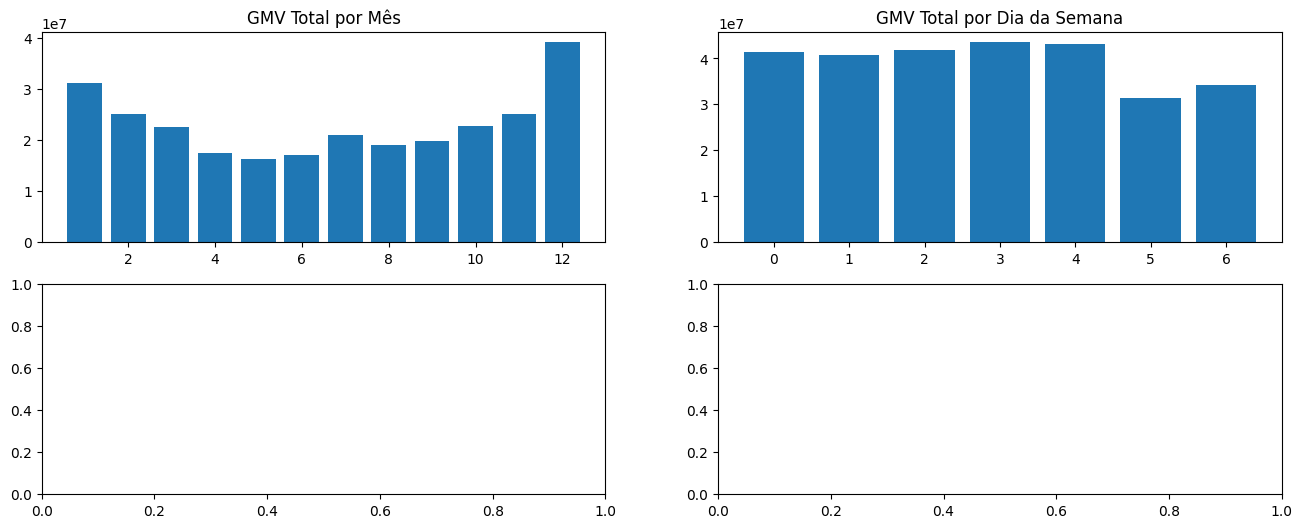

In [ ]:
gmv_por_mes = df_completo.groupby('mes')['gmv_success'].agg(['sum', 'mean'])
gmv_por_dia_semana = df_completo.groupby('dia_semana')['gmv_success'].agg(['sum', 'mean'])

fig, axes = plt.subplots(2, 2, figsize=(16, 6))

axes[0,0].bar(gmv_por_mes.index, gmv_por_mes['sum'])
axes[0,0].set_title('GMV Total por Mês')

axes[0,1].bar(gmv_por_dia_semana.index, gmv_por_dia_semana['sum'])
axes[0,1].set_title('GMV Total por Dia da Semana')

In [ ]:
# Medidas resumo por mês
stats_por_mes = df_completo.groupby('mes')['gmv_success'].describe()
display(stats_por_mes)

# Medidas resumo por dia da semana
stats_por_dia_semana = df_completo.groupby('dia_semana')['gmv_success'].describe()
display(stats_por_dia_semana)

count        mean         std   min      25%     50%     75%      max
mes                                                                          
1    184389.0  169.327097  174.491246  4.19  63.8400  118.57  209.52  4779.00
2    158719.0  157.969945  161.094573  5.00  61.3000  111.99  194.26  4365.84
3    144946.0  155.817299  159.978945  5.00  59.1825  110.80  192.76  5088.10
4    113201.0  153.859090  156.112478  5.00  59.7000  111.04  189.06  5076.60
5    109744.0  149.084122  152.246618  5.00  57.4700  106.21  184.07  4769.04
6    113582.0  150.535284  151.291536  1.35  58.0400  108.21  186.28  3733.66
7    128178.0  163.295009  164.027174  5.00  64.0025  117.94  201.36  4602.44
8    121457.0  156.797510  157.221704  5.00  61.1800  112.69  193.83  4786.61
9    125480.0  157.302231  159.704839  5.00  61.0200  112.72  193.39  3734.26
10   142357.0  159.262565  161.940113  2.06  61.6700  114.08  195.50  3865.89
11   153490.0  163.298374  174.060549  5.00  60.5300  114.09  199.79  6635.55
12   228493.0  171.103557  180.735861  5.00  64.4400  119.09  210.09  6723.93

count        mean         std   min    25%     50%       75%  \
dia_semana                                                                    
0           244226.0  169.762900  171.710465  5.00  65.79  121.47  210.4175   
1           232875.0  174.734634  175.879363  5.00  68.44  125.52  216.6700   
2           243036.0  172.054857  172.889660  2.06  67.67  123.31  212.4000   
3           266133.0  163.532724  166.406806  5.00  63.84  116.89  200.6000   
4           279945.0  154.330780  163.004778  5.00  58.12  107.86  188.8500   
5           209775.0  149.533745  155.064044  1.35  57.53  106.03  183.5700   
6           248046.0  138.042208  143.936657  4.19  53.03   95.93  168.5400   

                max  
dia_semana           
0           4365.84  
1           6723.93  
2           5088.10  
3           4377.17  
4           6635.55  
5           5076.60  
6           5203.21

In [ ]:
# Calcular limites dos outliers para todo o conjunto dentro de gmv_success
Q1 = df_completo['gmv_success'].quantile(0.25)
Q3 = df_completo['gmv_success'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

outliers = df_completo[df_completo['gmv_success'] > limite_superior]
print(f'Total de outliers: {len(outliers)}, ({len(outliers)/len(df)*100:.2f}%)')

# outliers dentro do mês
outliers_mes = df_completo.groupby('mes').apply(lambda x: (x['gmv_success'] > limite_superior).sum())
print(outliers_mes)

Total de outliers: 109247, (6.34%)
mes
1     13429
2      9688
3      8650
4      6363
5      5772
6      6147
7      8236
8      7143
9      7530
10     8774
11    10384
12    17131
dtype: int64


/tmp/ipython-input-1889184171.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_mes = df_completo.groupby('mes').apply(lambda x: (x['gmv_success'] > limite_superior).sum())


In [ ]:
# Matriz de análise completa
def analise_completa_temporal(df_completo, periodo='mes'):
    grouped = df_completo.groupby(periodo).agg({
        'gmv_success': ['sum', 'mean', 'std', 'count'],
        'quantidade_tickets': ['sum', 'mean'],
        'data_feriado': lambda x: (x == 1).sum()
    }).round(2)

    return grouped

analise_mensal = analise_completa_temporal(df_completo, 'mes')
analise_anual = analise_completa_temporal(df_completo, 'ano')

display(analise_mensal.style.format('{:,.2f}'))

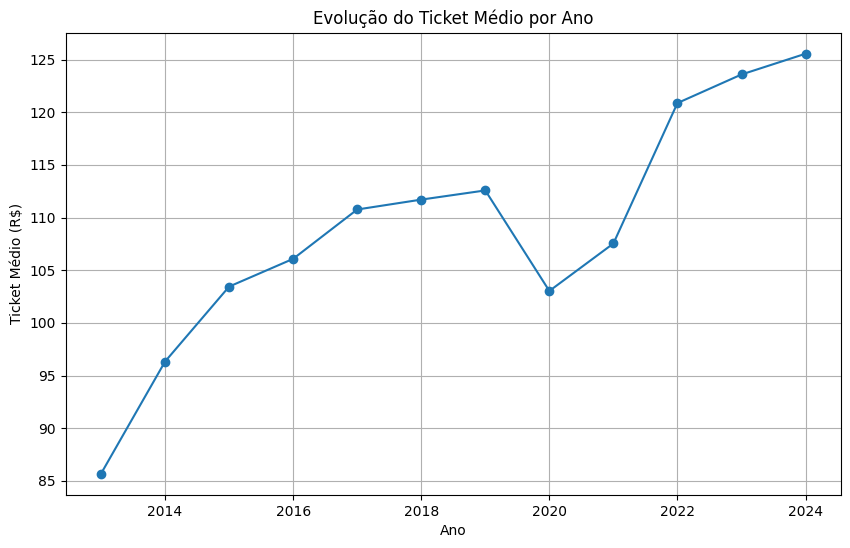

In [ ]:
preco_medio_ano = df_completo.groupby('ano').agg({
    'gmv_success': 'sum',
    'quantidade_tickets': 'sum'
})
preco_medio_ano['ticket_medio'] = preco_medio_ano['gmv_success'] / preco_medio_ano['quantidade_tickets']

plt.figure(figsize=(10, 6))
plt.plot(preco_medio_ano.index, preco_medio_ano['ticket_medio'], marker='o')
plt.title('Evolução do Ticket Médio por Ano')
plt.ylabel('Ticket Médio (R$)')
plt.xlabel('Ano')
plt.grid(True)

## Categorização do período

In [ ]:
df_completo['time_purchase'] = pd.to_datetime(df_completo['time_purchase'], format='%H:%M:%S', errors='coerce')
df_completo['hora_compra'] = df_completo['time_purchase'].dt.hour

def periodo_do_dia(hora):
    if pd.isna(hora):
        return 'indefinido'
    elif 5 <= hora < 12:
        return 'manhã'
    elif 12 <= hora < 18:
        return 'tarde'
    elif 18 <= hora < 24:
        return 'noite'
    else: # hora < 5
        return 'madrugada'

df_completo['periodo_compra'] = df_completo['hora_compra'].apply(periodo_do_dia)

display(df_completo[['time_purchase', 'hora_compra', 'periodo_compra']].head())
display(df_completo['periodo_compra'].value_counts())

time_purchase  hora_compra periodo_compra
0 1900-01-01 16:04:22           16          tarde
1 1900-01-01 14:37:45           14          tarde
2 1900-01-01 16:28:09           16          tarde
3 1900-01-01 12:41:05           12          tarde
4 1900-01-01 20:24:01           20          noite

periodo_compra
tarde        666378
noite        544597
manhã        447834
madrugada     65227
Name: count, dtype: int64

In [ ]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724036 entries, 0 to 1724035
Data columns (total 25 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   data_compra                datetime64[ns]
 1   time_purchase              datetime64[ns]
 2   gmv_success                float64       
 3   quantidade_tickets         int64         
 4   origem_ida                 object        
 5   destino_ida                object        
 6   origem_volta               object        
 7   destino_volta              object        
 8   empresa_ida                object        
 9   empresa_volta              object        
 10  id_cliente                 object        
 11  periodo_covid              object        
 12  split                      object        
 13  faixa_tickets              object        
 14  ano                        int16         
 15  mes                        int8          
 16  dia                        int8     

## Trecho

In [ ]:
# Principais trechos (origem_ida → destino_ida)
df_completo['trecho_ida'] = df_completo['origem_ida'] + ' → ' + df_completo['destino_ida']
principais_trechos = df_completo['trecho_ida'].value_counts().head(10)
print(principais_trechos)

trecho_ida
Cidade_0 → Cidade_2      37675
Cidade_2 → Cidade_0      35909
Cidade_0 → Cidade_5      20058
Cidade_5 → Cidade_0      18577
Cidade_0 → Cidade_65     14824
Cidade_0 → Cidade_3      11323
Cidade_2 → Cidade_17     10908
Cidade_3 → Cidade_0      10459
Cidade_17 → Cidade_2      9756
Cidade_63 → Cidade_29     9123
Name: count, dtype: int64


In [ ]:
principais_trechos.values.sum()

np.int64(178612)

In [ ]:
df_completo['trecho_volta_valido'] = df_completo[
    (df_completo['origem_volta'] != '0') & (df_completo['destino_volta'] != '0')
].apply(
    lambda row: str(row['origem_volta']) + ' → ' + str(row['destino_volta']), axis=1
)

principais_trechos_volta_validos = df_completo['trecho_volta_valido'].value_counts().head(10)
print(principais_trechos_volta_validos)

trecho_volta_valido
Cidade_2 → Cidade_0       6623
Cidade_0 → Cidade_2       4080
Cidade_5 → Cidade_0       2628
Cidade_0 → Cidade_5       2455
Cidade_263 → Cidade_28    2295
Cidade_2 → Cidade_17      1803
Cidade_17 → Cidade_2      1525
Cidade_197 → Cidade_0     1381
Cidade_319 → Cidade_28    1320
Cidade_17 → Cidade_0      1160
Name: count, dtype: int64


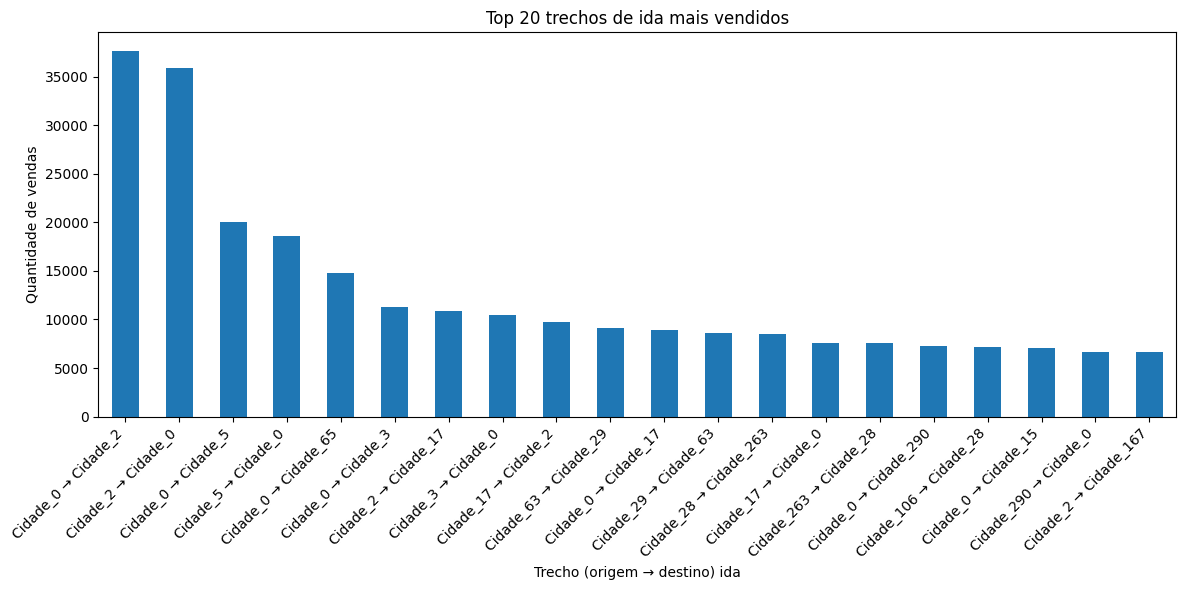

In [ ]:
top_n = 20
trechos_ida_top = df_completo['trecho_ida'].value_counts().head(top_n)

plt.figure(figsize=(12,6))
trechos_ida_top.plot(kind='bar')
plt.title('Top 20 trechos de ida mais vendidos')
plt.ylabel('Quantidade de vendas')
plt.xlabel('Trecho (origem → destino) ida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

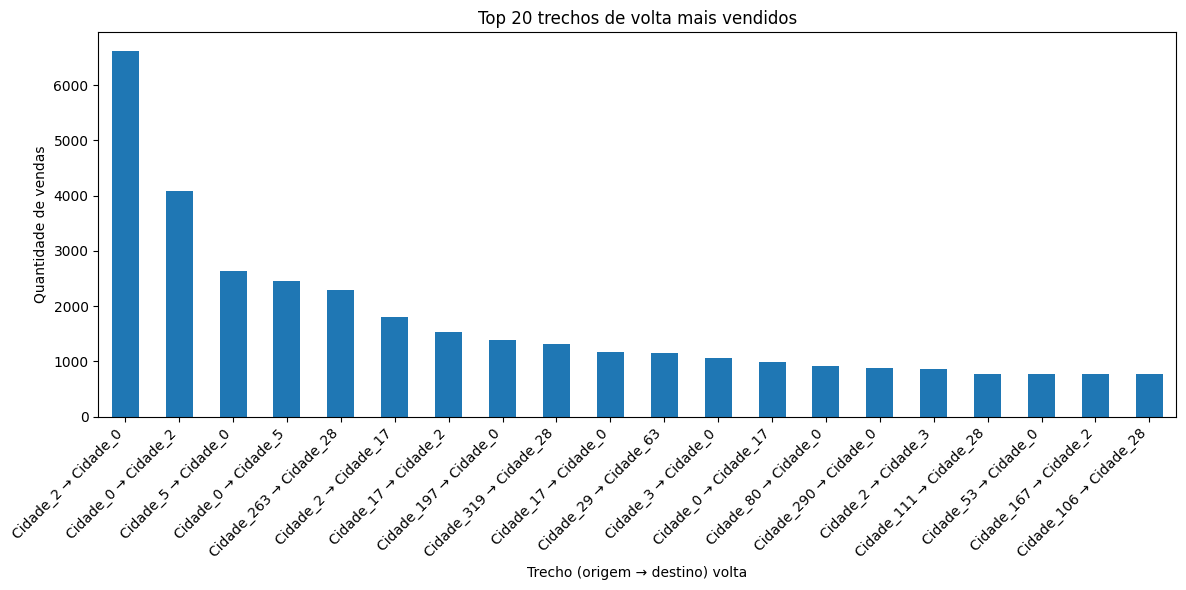

In [ ]:
top_n = 20
trechos_ida_top = df_completo['trecho_volta_valido'].value_counts().head(top_n)

plt.figure(figsize=(12,6))
trechos_ida_top.plot(kind='bar')
plt.title('Top 20 trechos de volta mais vendidos')
plt.ylabel('Quantidade de vendas')
plt.xlabel('Trecho (origem → destino) volta')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
porcent_ida = (df_completo['trecho_ida'].value_counts() / df_completo['trecho_ida'].value_counts().sum()) * 100
print("Porcentagem de vendas por trecho de ida (top 10) [%]:")
print(porcent_ida.head(10).round(2))

porcent_volta = (df_completo['trecho_volta_valido'].value_counts() / df_completo['trecho_volta_valido'].value_counts().sum()) * 100
print("\nPorcentagem de vendas por trecho de volta (top 10) [%]:")
print(porcent_volta.head(10).round(2))

Porcentagem de vendas por trecho de ida (top 10) [%]:
trecho_ida
Cidade_0 → Cidade_2      2.19
Cidade_2 → Cidade_0      2.08
Cidade_0 → Cidade_5      1.16
Cidade_5 → Cidade_0      1.08
Cidade_0 → Cidade_65     0.86
Cidade_0 → Cidade_3      0.66
Cidade_2 → Cidade_17     0.63
Cidade_3 → Cidade_0      0.61
Cidade_17 → Cidade_2     0.57
Cidade_63 → Cidade_29    0.53
Name: count, dtype: float64

Porcentagem de vendas por trecho de volta (top 10) [%]:
trecho_volta_valido
Cidade_2 → Cidade_0       3.79
Cidade_0 → Cidade_2       2.34
Cidade_5 → Cidade_0       1.50
Cidade_0 → Cidade_5       1.41
Cidade_263 → Cidade_28    1.31
Cidade_2 → Cidade_17      1.03
Cidade_17 → Cidade_2      0.87
Cidade_197 → Cidade_0     0.79
Cidade_319 → Cidade_28    0.76
Cidade_17 → Cidade_0      0.66
Name: count, dtype: float64


In [ ]:
principais_origens = df_completo['origem_ida'].value_counts().head(10)
print(principais_origens)

origem_ida
Cidade_0     256977
Cidade_2     161360
Cidade_5      72792
Cidade_3      61761
Cidade_17     55735
Cidade_9      54858
Cidade_54     35733
Cidade_28     32632
Cidade_56     27697
Cidade_63     26154
Name: count, dtype: int64


## Empresa

In [ ]:
principais_empresas_ida = df_completo['empresa_ida'].value_counts().head(10)
print("Top 10 empresas de ida (por volume):")
print(principais_empresas_ida)

principais_empresas_volta = df_completo['empresa_volta'].value_counts().head(10)
print("\nTop 10 empresas de volta (por volume):")
print(principais_empresas_volta)

Top 10 empresas de ida (por volume):
empresa_ida
Empresa_8     187961
Empresa_24     92962
Empresa_6      79378
Empresa_13     74037
Empresa_2      68073
Empresa_12     61201
Empresa_3      43983
Empresa_11     40203
Empresa_5      39825
Empresa_17     39036
Name: count, dtype: int64

Top 10 empresas de volta (por volume):
empresa_volta
1             1535920
Empresa_8       21901
Empresa_24      12599
Empresa_6       10085
Empresa_2       10026
Empresa_13       8277
Empresa_11       4756
Empresa_5        4636
Empresa_12       4456
Empresa_17       4393
Name: count, dtype: int64


In [ ]:
market_share_ida = (df_completo['empresa_ida'].value_counts() / len(df) * 100).head(10)
print("\nMarket Share - Empresas de Ida (%):")
print(market_share_ida.round(2))


Market Share - Empresas de Ida (%):
empresa_ida
Empresa_8     10.90
Empresa_24     5.39
Empresa_6      4.60
Empresa_13     4.29
Empresa_2      3.95
Empresa_12     3.55
Empresa_3      2.55
Empresa_11     2.33
Empresa_5      2.31
Empresa_17     2.26
Name: count, dtype: float64


In [ ]:
receita_por_empresa = df_completo.groupby('empresa_ida').agg({
    'gmv_success': ['sum', 'mean', 'count'],
    'quantidade_tickets': 'sum'
}).round(2)

print("\nReceita por Empresa (Ida):")
print(receita_por_empresa.head(10))


Receita por Empresa (Ida):
            gmv_success                quantidade_tickets
                    sum    mean  count                sum
empresa_ida                                              
Empresa_0    1528168.90   73.69  20739              27869
Empresa_1     230262.02  107.65   2139               2696
Empresa_10   7201627.32  272.80  26399              36928
Empresa_100   318299.76  217.42   1464               2026
Empresa_101   657909.48  171.73   3831               5297
Empresa_102    63047.22  240.64    262                337
Empresa_103  1877911.13  237.89   7894              10251
Empresa_104  1956693.80  168.48  11614              14782
Empresa_105   736003.51   87.18   8442              12225
Empresa_106    63115.22   93.50    675                890


In [ ]:
empresas_por_trecho = df_completo.groupby('trecho_ida')['empresa_ida'].agg(lambda x: x.mode()).head(10)
print("\nEmpresa dominante por trecho (Top 10 trechos):")
print(empresas_por_trecho)


Empresa dominante por trecho (Top 10 trechos):
trecho_ida
Cidade_0 → Cidade_1       Empresa_110
Cidade_0 → Cidade_10       Empresa_91
Cidade_0 → Cidade_1000     Empresa_28
Cidade_0 → Cidade_1002      Empresa_5
Cidade_0 → Cidade_1007     Empresa_17
Cidade_0 → Cidade_101      Empresa_35
Cidade_0 → Cidade_1015    Empresa_103
Cidade_0 → Cidade_1017     Empresa_10
Cidade_0 → Cidade_102      Empresa_51
Cidade_0 → Cidade_1028      Empresa_6
Name: empresa_ida, dtype: object


In [ ]:
performance_empresas = df_completo.groupby('empresa_ida').agg({
    'gmv_success': 'mean',
    'quantidade_tickets': 'mean'
}).round(2)
performance_empresas['receita_por_ticket'] = (performance_empresas['gmv_success'] / performance_empresas['quantidade_tickets']).round(2)
print("\nPerformance das empresas (receita média por ticket):")
print(performance_empresas.head(10))


Performance das empresas (receita média por ticket):
             gmv_success  quantidade_tickets  receita_por_ticket
empresa_ida                                                     
Empresa_0          73.69                1.34               54.99
Empresa_1         107.65                1.26               85.44
Empresa_10        272.80                1.40              194.86
Empresa_100       217.42                1.38              157.55
Empresa_101       171.73                1.38              124.44
Empresa_102       240.64                1.29              186.54
Empresa_103       237.89                1.30              182.99
Empresa_104       168.48                1.27              132.66
Empresa_105        87.18                1.45               60.12
Empresa_106        93.50                1.32               70.83


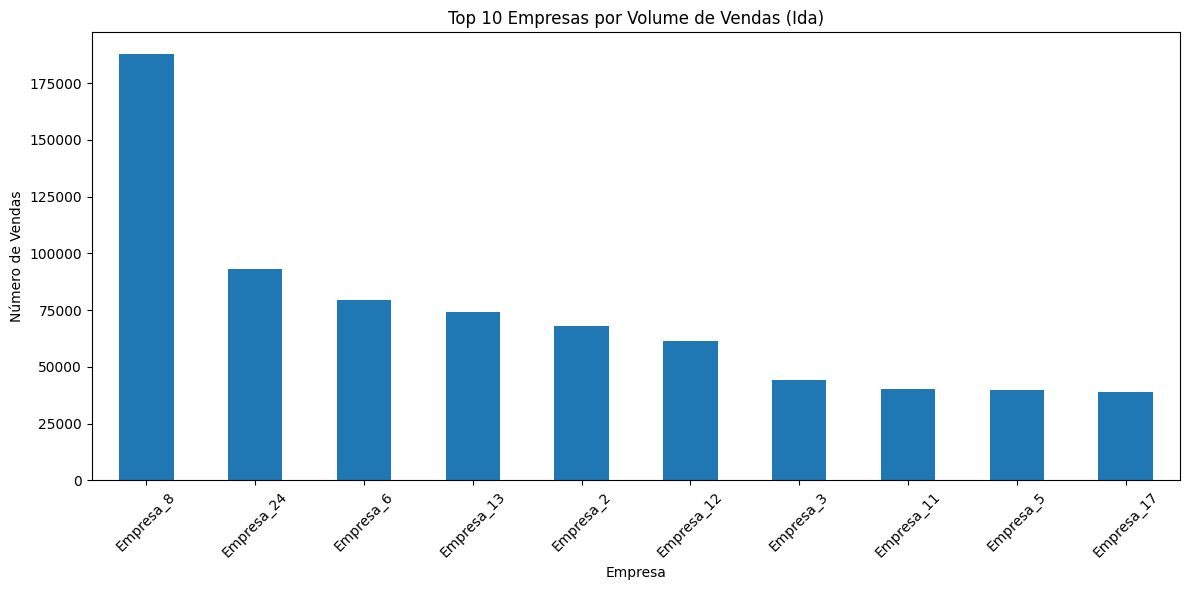

In [ ]:
plt.figure(figsize=(12,6))
principais_empresas_ida.head(10).plot(kind='bar')
plt.title('Top 10 Empresas por Volume de Vendas (Ida)')
plt.xlabel('Empresa')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

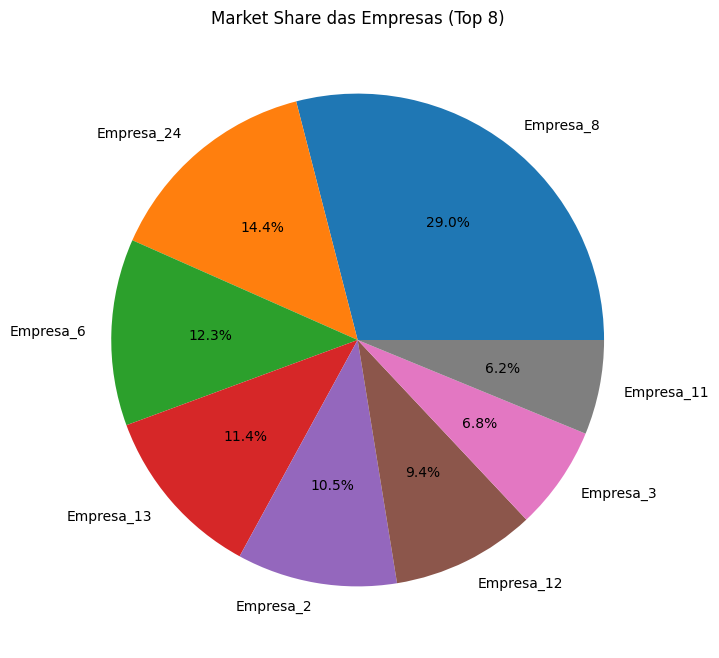

In [ ]:
plt.figure(figsize=(10,8))
market_share_ida.head(8).plot(kind='pie', autopct='%1.1f%%')
plt.title('Market Share das Empresas (Top 8)')
plt.ylabel('')
plt.show()

In [ ]:
empresas_tempo = df_completo.groupby(['ano', 'empresa_ida']).agg({
    'gmv_success': 'sum',
    'quantidade_tickets': 'sum'
}).reset_index()

top_5_empresas = principais_empresas_ida.head(5).index
empresas_tempo_filtrado = empresas_tempo[empresas_tempo['empresa_ida'].isin(top_5_empresas)]

print("\nEvolução das receitas das top 5 empresas por ano:")
print(empresas_tempo_filtrado.pivot_table(values='gmv_success', index='ano', columns='empresa_ida', fill_value=0))


Evolução das receitas das top 5 empresas por ano:
empresa_ida    Empresa_13     Empresa_2    Empresa_24     Empresa_6  \
ano                                                                   
2013         3.303250e+03  5.661660e+03  2.502140e+03  2.072320e+03   
2014         2.235513e+04  1.101569e+05  9.362459e+04  6.329605e+04   
2015         1.661947e+05  3.792620e+05  4.607033e+05  3.619628e+05   
2016         4.196372e+05  5.379248e+05  8.263148e+05  5.252399e+05   
2017         6.126332e+05  8.107389e+05  1.061052e+06  8.508979e+05   
2018         5.745156e+05  9.791937e+05  1.049175e+06  9.641653e+05   
2019         1.289263e+06  1.726664e+06  1.973877e+06  1.656866e+06   
2020         1.192946e+06  1.267761e+06  1.089464e+06  1.049691e+06   
2021         1.793018e+06  1.657688e+06  1.685000e+06  1.742915e+06   
2022         2.068684e+06  2.349710e+06  2.658276e+06  2.820092e+06   
2023         1.842212e+06  2.406765e+06  2.987000e+06  2.816373e+06   
2024         5.424076e+05 

In [ ]:
viagens_completas = df_completo[(df_completo['origem_volta'] != '0') & (df_completo['destino_volta'] != '0')].copy()

print(f"Total de viagens: {len(df)}")
print(f"Viagens completas (ida + volta): {len(viagens_completas)}")

# Analisar empresas escolhidas para ida e volta na mesma viagem
viagens_completas['mesma_empresa'] = viagens_completas['empresa_ida'] == viagens_completas['empresa_volta']

print(f"\nViagens onde cliente escolheu a MESMA empresa para ida e volta: {viagens_completas['mesma_empresa'].sum()}")
print(f"Viagens onde cliente escolheu empresas DIFERENTES para ida e volta: {(~viagens_completas['mesma_empresa']).sum()}")

Total de viagens: 1724036
Viagens completas (ida + volta): 174646

Viagens onde cliente escolheu a MESMA empresa para ida e volta: 143668
Viagens onde cliente escolheu empresas DIFERENTES para ida e volta: 30978


In [ ]:
combinacoes_empresas = viagens_completas.groupby(['empresa_ida', 'empresa_volta']).size().reset_index(name='quantidade')
combinacoes_empresas = combinacoes_empresas.sort_values('quantidade', ascending=False)

print("\nCombinações mais populares de empresas (ida → volta):")
print(combinacoes_empresas.head(15))

# Apenas empresas diferentes
empresas_diferentes = combinacoes_empresas[combinacoes_empresas['empresa_ida'] != combinacoes_empresas['empresa_volta']]
print("\nCombinações mais populares com empresas DIFERENTES:")
print(empresas_diferentes.head(10))


Combinações mais populares de empresas (ida → volta):
     empresa_ida empresa_volta  quantidade
1566   Empresa_8     Empresa_8       16345
908   Empresa_24    Empresa_24        9335
722    Empresa_2     Empresa_2        7300
263   Empresa_13    Empresa_13        7272
1326   Empresa_6     Empresa_6        6912
219   Empresa_12    Empresa_12        4427
341   Empresa_14    Empresa_14        4278
824   Empresa_22    Empresa_22        3635
122   Empresa_11    Empresa_11        3451
531   Empresa_17    Empresa_17        3211
1034   Empresa_3     Empresa_3        2989
1204   Empresa_5     Empresa_5        2799
1185  Empresa_49    Empresa_49        2781
1667   Empresa_9     Empresa_9        2754
866   Empresa_23    Empresa_23        2579

Combinações mais populares com empresas DIFERENTES:
      empresa_ida empresa_volta  quantidade
1545    Empresa_8     Empresa_2         683
1264   Empresa_56    Empresa_41         634
739     Empresa_2     Empresa_8         629
1747   Empresa_94    Empresa

In [ ]:
popularidade_trecho = df_completo.groupby('trecho_ida').size()
df_completo['popularidade_trecho'] = df_completo['trecho_ida'].map(popularidade_trecho)

# Sazonalidade do trecho
sazonalidade_trecho = df_completo.groupby(['trecho_ida', 'mes']).size().unstack(fill_value=0)
df_completo['sazonalidade_score'] = df_completo.apply(
    lambda row: sazonalidade_trecho.loc[row['trecho_ida'], row['mes']], axis=1
)

In [ ]:
# Combinações ida x volta
df_completo['combinacao_empresa'] = df_completo['empresa_ida'] + '_' + df_completo['empresa_volta']
df_completo['mesmo_trecho_ida_volta'] = (df_completo['trecho_ida'] == df_completo['trecho_volta_valido']).astype(int)
df_completo['mesma_empresa_ida_volta'] = (df_completo['empresa_ida'] == df_completo['empresa_volta']).astype(int)

In [ ]:
total_combinacoes_unicas = len(combinacoes_empresas)
total_combinacoes_diferentes = len(empresas_diferentes)

print(f"Total de combinações de empresas: {total_combinacoes_unicas}")
print(f"Total de combinações de empresas diferentes: {total_combinacoes_diferentes}")

Total de combinações de empresas: 1808
Total de combinações de empresas diferentes: 1548


In [ ]:
# Calcula o percentual cumulativo do total de viagens
combinacoes_empresas['percentual_cumulativo'] = combinacoes_empresas['quantidade'].cumsum() / combinacoes_empresas['quantidade'].sum()

# Filtra as combinações que estão dentro do limite de 90%
combinacoes_pareto = combinacoes_empresas[combinacoes_empresas['percentual_cumulativo'] <= 0.90]
total_combinacoes_pareto = len(combinacoes_pareto)

print(f"\nAbordagem de Pareto (80%, mas utilizamos 90%): As {total_combinacoes_pareto} combinações mais frequentes são responsáveis por 90% de todas as viagens com volta.")


Abordagem de Pareto (80%, mas utilizamos 90%): As 198 combinações mais frequentes são responsáveis por 90% de todas as viagens com volta.


In [ ]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724036 entries, 0 to 1724035
Data columns (total 32 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   data_compra                datetime64[ns]
 1   time_purchase              datetime64[ns]
 2   gmv_success                float64       
 3   quantidade_tickets         int64         
 4   origem_ida                 object        
 5   destino_ida                object        
 6   origem_volta               object        
 7   destino_volta              object        
 8   empresa_ida                object        
 9   empresa_volta              object        
 10  id_cliente                 object        
 11  periodo_covid              object        
 12  split                      object        
 13  faixa_tickets              object        
 14  ano                        int16         
 15  mes                        int8          
 16  dia                        int8     

## Cliente

In [ ]:
# Frequência e recência de compras
df_cliente = df_completo.groupby('id_cliente').agg({
    'data_compra': ['count', 'min', 'max'],
    'gmv_success': ['sum', 'mean'],
    'quantidade_tickets': ['sum', 'mean'],
    'data_feriado': 'sum'
}).round(2)

df_cliente.columns = ['freq_compras', 'primeira_compra', 'ultima_compra',
                      'valor_total', 'ticket_medio', 'total_tickets',
                      'ticket_medio_qtd', 'compras_feriado']

# Recência (dias desde última compra)
df_cliente['recencia_dias'] = (pd.Timestamp.now() - df_cliente['ultima_compra']).dt.days

# Sazonalidade do cliente
sazonalidade = df_completo.groupby('id_cliente')['mes'].apply(lambda x: x.value_counts().index)
df_cliente['mes_preferido'] = sazonalidade


In [ ]:
# Histórico do cliente
df_completo['compras_anteriores'] = df_completo.groupby('id_cliente').cumcount()
df_completo['valor_acumulado'] = df_completo.groupby('id_cliente')['gmv_success'].cumsum()
df_completo['experiencia_empresa'] = df_completo.groupby(['id_cliente', 'empresa_ida']).cumcount() + 1

# Diversificação do portfólio
df_completo['diversidade_destinos'] = df_completo.groupby('id_cliente')['destino_ida'].transform('nunique')
df_completo['diversidade_empresas'] = df_completo.groupby('id_cliente')['empresa_ida'].transform('nunique')

In [ ]:
empresa_mais_frequente = df_completo.groupby('id_cliente')['empresa_ida'].apply(lambda x: x.mode()[0])
total_compras_cliente = df_completo.groupby('id_cliente').size()
compras_por_empresa = df_completo.groupby(['id_cliente', 'empresa_ida']).size()

df_fidelidade = pd.DataFrame({
    'empresa_favorita': empresa_mais_frequente,
    'total_compras': total_compras_cliente
}).reset_index()

def get_contagem_favorita(row):
    try:
        return compras_por_empresa.loc[(row['id_cliente'], row['empresa_favorita'])]
    except KeyError:
        return 0

df_fidelidade['compras_na_favorita'] = df_fidelidade.apply(get_contagem_favorita, axis=1)
df_fidelidade['score_fidelidade'] = (df_fidelidade['compras_na_favorita'] / df_fidelidade['total_compras']).fillna(0)
df_fidelidade['cliente_recorrente'] = (df_fidelidade['total_compras'] > 1).astype(int)

In [ ]:
colunas_para_remover = ['total_compras', 'score_fidelidade', 'cliente_recorrente']
for col in colunas_para_remover:
    if col in df_completo.columns:
        df_completo = df_completo.drop(columns=[col])

features_para_merge = df_fidelidade[['id_cliente', 'total_compras', 'score_fidelidade', 'cliente_recorrente']]

print(f"\nColunas antes do merge: {df_completo.shape[1]}")

df_completo = pd.merge(
    df_completo,
    features_para_merge,
    on='id_cliente',
    how='left'
)

print(f"Colunas depois do merge: {df_completo.shape[1]}")
print("\n--- Verificação das Novas Colunas no df_completo ---")
display(df_completo[['id_cliente', 'total_compras', 'score_fidelidade', 'cliente_recorrente']].head())


Colunas antes do merge: 37
Colunas depois do merge: 40

--- Verificação das Novas Colunas no df_completo ---


id_cliente  total_compras  score_fidelidade  cliente_recorrente
0  Cliente_578847              4          0.750000                   1
1   Cliente_57527             17          0.529412                   1
2  Cliente_513653              2          1.000000                   1
3  Cliente_307300              9          1.000000                   1
4  Cliente_251592             35          0.942857                   1

In [ ]:
for col in ['periodo_covid', 'faixa_tickets', 'tipo_dia', 'periodo_compra']:
    print(f"\nValores únicos da coluna {col}:")
    print(df_completo[col].value_counts())



Valores únicos da coluna periodo_covid:
periodo_covid
durante-covid    862689
pre-covid        503070
pos-covid        358277
Name: count, dtype: int64

Valores únicos da coluna faixa_tickets:
faixa_tickets
1     1245598
2      381086
4+      63436
3       33916
Name: count, dtype: int64

Valores únicos da coluna tipo_dia:
tipo_dia
Dia Comum                  1419105
Janela Pré-Feriado (5d)     257618
Feriado                      47313
Name: count, dtype: int64

Valores únicos da coluna periodo_compra:
periodo_compra
tarde        666378
noite        544597
manhã        447834
madrugada     65227
Name: count, dtype: int64


In [ ]:
import pandas as pd

s = pd.Series(['durante-covid', 'pre-covid', 'pos-covid', 'durante-covid'], dtype='category')
print(s.cat.categories)  # categorias: ['durante-covid', 'pos-covid', 'pre-covid']
print(s.cat.codes)       # códigos: [0, 2, 1, 0]

for col in ['periodo_covid', 'tipo_dia', 'periodo_compra']:
    df_completo[col + '_int'] = pd.Categorical(df_completo[col], ordered=False).codes

Index(['durante-covid', 'pos-covid', 'pre-covid'], dtype='object')
0    0
1    2
2    1
3    0
dtype: int8


In [ ]:
map_faixa = {'1': 1, '2': 2, '3': 3, '4+': 4}
df_completo['faixa_tickets_int'] = df_completo['faixa_tickets'].map(map_faixa)

In [ ]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724036 entries, 0 to 1724035
Data columns (total 44 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   data_compra                datetime64[ns]
 1   time_purchase              datetime64[ns]
 2   gmv_success                float64       
 3   quantidade_tickets         int64         
 4   origem_ida                 object        
 5   destino_ida                object        
 6   origem_volta               object        
 7   destino_volta              object        
 8   empresa_ida                object        
 9   empresa_volta              object        
 10  id_cliente                 object        
 11  periodo_covid              object        
 12  split                      object        
 13  faixa_tickets              object        
 14  ano                        int16         
 15  mes                        int8          
 16  dia                        int8     

# Clusterização

In [ ]:
df_clusterization = df_completo.copy()

aggregations = {
    'gmv_success': ['mean', 'sum'],
    'total_compras': 'sum',
    'quantidade_tickets': ['mean'],
    'valor_acumulado': 'sum',
    'cliente_recorrente': 'mean',
    'score_fidelidade': 'mean',
    'compras_anteriores': 'sum',
    'faixa_tickets_int': 'mean',
    'sazonalidade_score': 'mean',
    'diversidade_destinos': 'max',
    'diversidade_empresas': 'max',
    'compra_ate_5_dias_feriado': 'sum',
    'compras_anteriores': 'mean',

    'periodo_covid_int': ['max', 'min'],
    'tipo_dia_int': ['mean'],


    'empresa_ida': lambda x: x.mode().iloc[0] if not x.mode().empty else "N/A",
    'origem_ida': lambda x: x.mode().iloc[0] if not x.mode().empty else "N/A",
    'destino_ida': lambda x: x.mode().iloc[0] if not x.mode().empty else "N/A",
}


df_clientes = df_completo.groupby('id_cliente').agg(aggregations).reset_index()
df_clientes.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_clientes.columns.values]
df_clientes.rename(columns={'id_cliente_': 'id_cliente'}, inplace=True)

print(f"-> Agregação concluída. Formato do DataFrame de Clientes: {df_clientes.shape}")
df_clientes.head()

-> Agregação concluída. Formato do DataFrame de Clientes: (575385, 20)


id_cliente  gmv_success_mean  gmv_success_sum  total_compras_sum  \
0     Cliente_0            91.020            91.02                  1   
1     Cliente_1            81.000           162.00                  4   
2    Cliente_10           189.640           379.28                  4   
3   Cliente_100           282.845           565.69                  4   
4  Cliente_1000           235.480           235.48                  1   

   quantidade_tickets_mean  valor_acumulado_sum  cliente_recorrente_mean  \
0                      1.0                91.02                      0.0   
1                      1.0               241.52                      1.0   
2                      1.0               564.95                      1.0   
3                      1.0               842.13                      1.0   
4                      1.0               235.48                      0.0   

   score_fidelidade_mean  compras_anteriores_mean  faixa_tickets_int_mean  \
0                    1.0                      0.0                     1.0   
1                    0.5                      0.5                     1.0   
2                    1.0                      0.5                     1.0   
3                    0.5                      0.5                     1.0   
4                    1.0                      0.0                     1.0   

   sazonalidade_score_mean  diversidade_destinos_max  \
0                   1840.0                         1   
1                    350.5                         2   
2                      1.0                         2   
3                     10.5                         2   
4                      9.0                         1   

   diversidade_empresas_max  compra_ate_5_dias_feriado_sum  \
0                         1                              0   
1                         2                              0   
2                         1                              0   
3                         2                              1   
4                         1                              0   

   periodo_covid_int_max  periodo_covid_int_min  tipo_dia_int_mean  \
0                      0                      0                0.0   
1                      0                      0                0.0   
2                      1                      1                0.0   
3                      1                      1                1.0   
4                      0                      0                0.0   

  empresa_ida_<lambda> origem_ida_<lambda> destino_ida_<lambda>  
0           Empresa_16            Cidade_5             Cidade_0  
1           Empresa_32           Cidade_29           Cidade_130  
2           Empresa_65          Cidade_116           Cidade_116  
3           Empresa_22          Cidade_125           Cidade_125  
4          Empresa_203          Cidade_254             Cidade_0

In [ ]:
df_clientes.nunique()

id_cliente                       575385
gmv_success_mean                 208587
gmv_success_sum                  160521
total_compras_sum                   233
quantidade_tickets_mean            1518
valor_acumulado_sum              227239
cliente_recorrente_mean               2
score_fidelidade_mean              1284
compras_anteriores_mean             233
faixa_tickets_int_mean             1422
sazonalidade_score_mean           43147
diversidade_destinos_max             64
diversidade_empresas_max             53
compra_ate_5_dias_feriado_sum        67
periodo_covid_int_max                 3
periodo_covid_int_min                 3
tipo_dia_int_mean                  1157
empresa_ida_<lambda>                292
origem_ida_<lambda>                2339
destino_ida_<lambda>               2717
dtype: int64

In [ ]:
df_numeric = df_clientes.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()

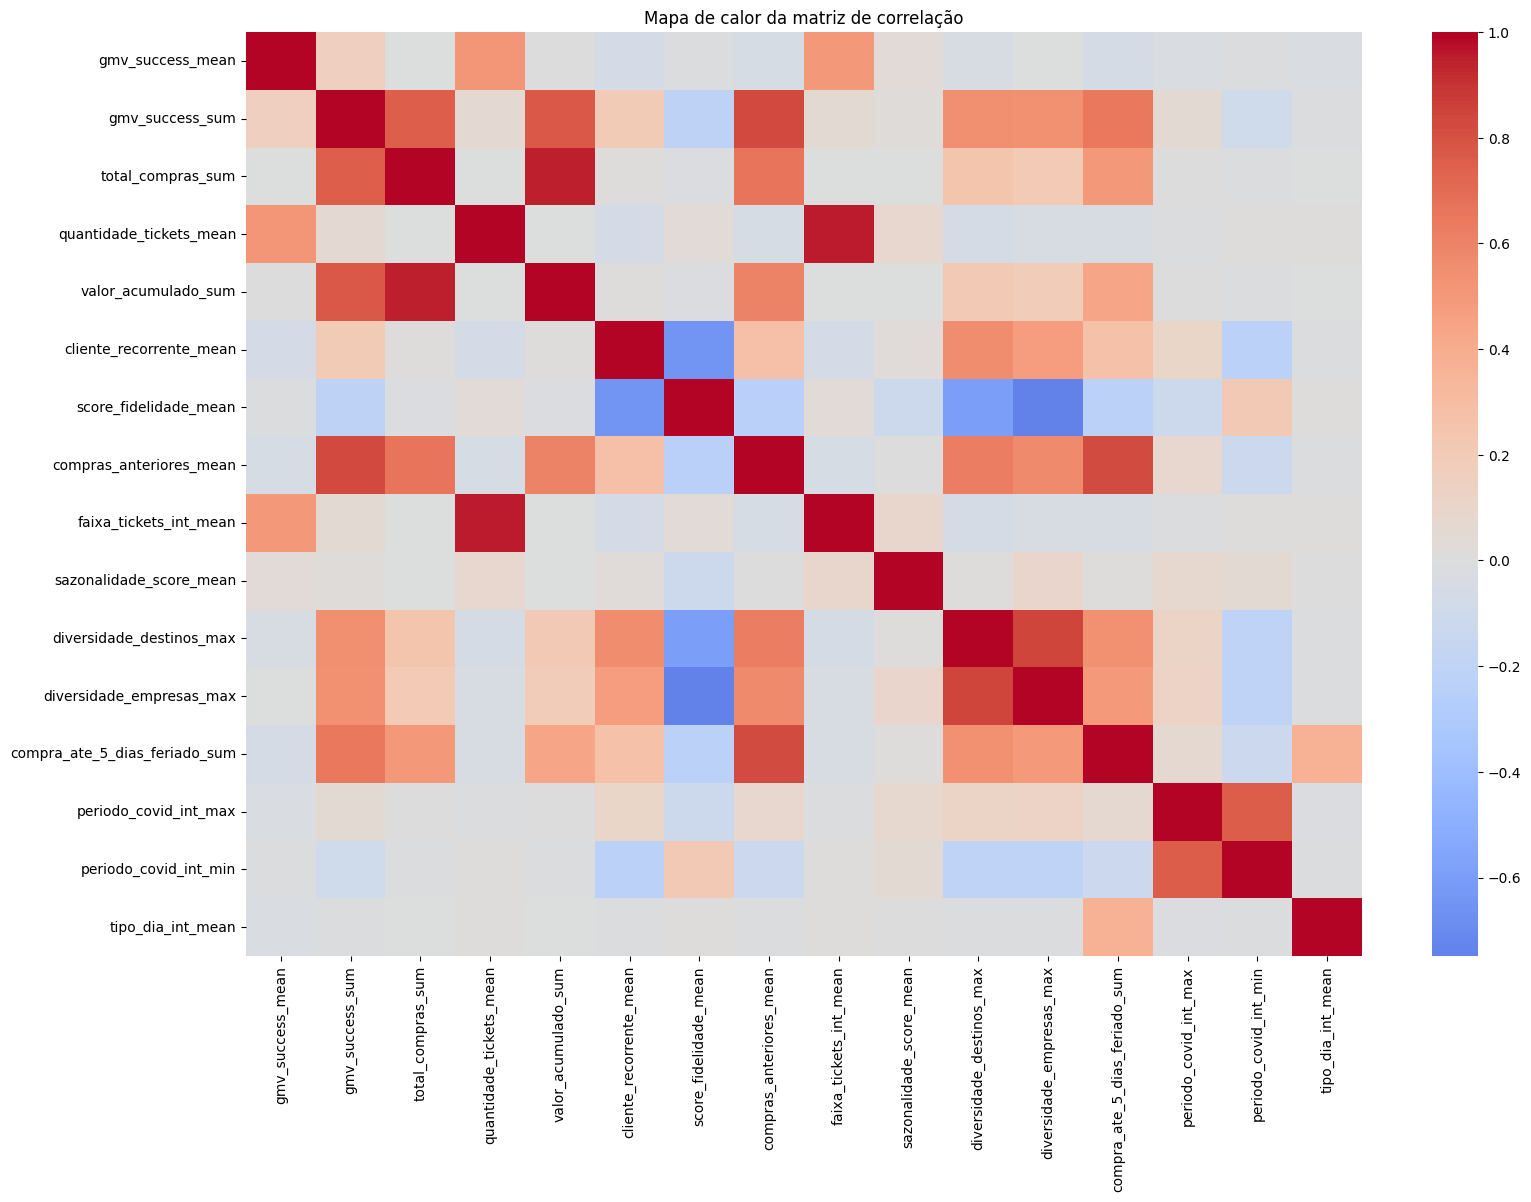

In [ ]:
df_numeric = df_clientes.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Mapa de calor da matriz de correlação')
plt.show()

Calcular a matriz de correlação para identificar variáveis que possuem correlação positiva, negativa ou nula entre elas

## Transformação dos dados

In [ ]:
features_numericas = df_clientes.select_dtypes(include=np.number).columns.tolist()
features_categoricas = df_clientes.select_dtypes(include=['object', 'category']).columns.tolist()

if 'id_cliente' in features_numericas: features_numericas.remove('id_cliente')
if 'id_cliente' in features_categoricas: features_categoricas.remove('id_cliente')

print(f"Identificadas {len(features_numericas)} features numéricas e {len(features_categoricas)} categóricas.")

# Pipelines de transformação
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_numericas),
        ('cat', categorical_transformer, features_categoricas)
    ]
)

X_clientes = df_clientes.drop('id_cliente', axis=1)

# Pré-processamento
X_prepared = preprocessor.fit_transform(X_clientes)

print("\nPré-processamento concluído.")
print(f"Formato final dos dados preparados para clusterização: {X_prepared.shape}")

Identificadas 16 features numéricas e 3 categóricas.

Pré-processamento concluído.
Formato final dos dados preparados para clusterização: (575385, 5364)


In [ ]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575385 entries, 0 to 575384
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id_cliente                     575385 non-null  object 
 1   gmv_success_mean               575385 non-null  float64
 2   gmv_success_sum                575385 non-null  float64
 3   total_compras_sum              575385 non-null  int64  
 4   quantidade_tickets_mean        575385 non-null  float64
 5   valor_acumulado_sum            575385 non-null  float64
 6   cliente_recorrente_mean        575385 non-null  float64
 7   score_fidelidade_mean          575385 non-null  float64
 8   compras_anteriores_mean        575385 non-null  float64
 9   faixa_tickets_int_mean         575385 non-null  float64
 10  sazonalidade_score_mean        575385 non-null  float64
 11  diversidade_destinos_max       575385 non-null  int64  
 12  diversidade_empresas_max      

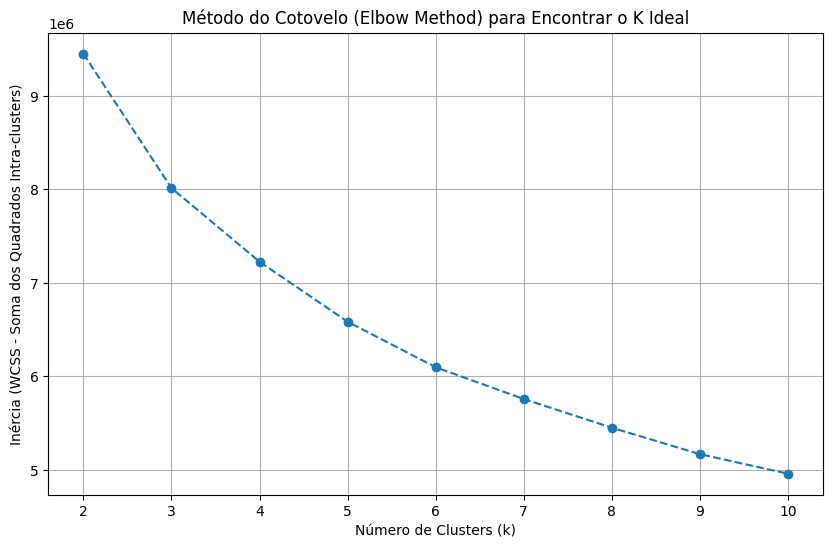

Análise o gráfico acima. O 'cotovelo' (ponto onde a linha começa a achatar) é um bom indicador do número ideal de clusters.


In [ ]:
inercias = []
k_range = range(2, 11) # teste de 2 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_prepared)
    inercias.append(kmeans.inertia_)

# gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inercias, marker='o', linestyle='--')
plt.title('Método do Cotovelo (Elbow Method) para Encontrar o K Ideal')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (WCSS - Soma dos Quadrados Intra-clusters)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("Análise o gráfico acima. O 'cotovelo' (ponto onde a linha começa a achatar) é um bom indicador do número ideal de clusters.")

In [ ]:
# Limites para filtrar outliers
limite_gmv = df_clientes['gmv_success_sum'].quantile(0.998)
limite_compras = df_clientes['total_compras_sum'].quantile(0.998)

df_filt_clusterization = df_clientes[
    (df_clientes['gmv_success_sum'] <= limite_gmv) &
    (df_clientes['total_compras_sum'] <= limite_compras)
]

In [ ]:
df_filt_clusterization.head()

id_cliente  gmv_success_mean  gmv_success_sum  total_compras_sum  \
0     Cliente_0            91.020            91.02                  1   
1     Cliente_1            81.000           162.00                  4   
2    Cliente_10           189.640           379.28                  4   
3   Cliente_100           282.845           565.69                  4   
4  Cliente_1000           235.480           235.48                  1   

   quantidade_tickets_mean  valor_acumulado_sum  cliente_recorrente_mean  \
0                      1.0                91.02                      0.0   
1                      1.0               241.52                      1.0   
2                      1.0               564.95                      1.0   
3                      1.0               842.13                      1.0   
4                      1.0               235.48                      0.0   

   score_fidelidade_mean  compras_anteriores_mean  faixa_tickets_int_mean  \
0                    1.0                      0.0                     1.0   
1                    0.5                      0.5                     1.0   
2                    1.0                      0.5                     1.0   
3                    0.5                      0.5                     1.0   
4                    1.0                      0.0                     1.0   

   sazonalidade_score_mean  diversidade_destinos_max  \
0                   1840.0                         1   
1                    350.5                         2   
2                      1.0                         2   
3                     10.5                         2   
4                      9.0                         1   

   diversidade_empresas_max  compra_ate_5_dias_feriado_sum  \
0                         1                              0   
1                         2                              0   
2                         1                              0   
3                         2                              1   
4                         1                              0   

   periodo_covid_int_max  periodo_covid_int_min  tipo_dia_int_mean  \
0                      0                      0                0.0   
1                      0                      0                0.0   
2                      1                      1                0.0   
3                      1                      1                1.0   
4                      0                      0                0.0   

  empresa_ida_<lambda> origem_ida_<lambda> destino_ida_<lambda>  
0           Empresa_16            Cidade_5             Cidade_0  
1           Empresa_32           Cidade_29           Cidade_130  
2           Empresa_65          Cidade_116           Cidade_116  
3           Empresa_22          Cidade_125           Cidade_125  
4          Empresa_203          Cidade_254             Cidade_0

In [ ]:
df_filt_clusterization.nunique()

id_cliente                       573614
gmv_success_mean                 206856
gmv_success_sum                  158770
total_compras_sum                    55
quantidade_tickets_mean             883
valor_acumulado_sum              225468
cliente_recorrente_mean               2
score_fidelidade_mean               670
compras_anteriores_mean              55
faixa_tickets_int_mean              798
sazonalidade_score_mean           41592
diversidade_destinos_max             28
diversidade_empresas_max             24
compra_ate_5_dias_feriado_sum        20
periodo_covid_int_max                 3
periodo_covid_int_min                 3
tipo_dia_int_mean                   636
empresa_ida_<lambda>                292
origem_ida_<lambda>                2339
destino_ida_<lambda>               2717
dtype: int64

In [ ]:
coluna_analise = ['empresa_ida_<lambda>', 'origem_ida_<lambda>', 'destino_ida_<lambda>']
meta_cobertura = 0.98
limite_ideal = {}

for coluna in coluna_analise:
  freq = df_filt_clusterization[coluna].value_counts()
  perc_cum = freq / freq.sum()
  perc_cum_cumsum = perc_cum.cumsum()

  cutoff_index = perc_cum_cumsum.searchsorted(meta_cobertura, side='right') + 1

  limite_sugerido = freq.iloc[cutoff_index - 1] if cutoff_index <= len(freq) else freq.iloc[-1]

  limite_ideal[coluna] = limite_sugerido

  print(f"Análise para '{coluna}':")
  print(f" - Categorias necessárias para {meta_cobertura:.0%} cobertura : {cutoff_index}")
  print(f" - Frequência limite sugerida: {limite_sugerido}\n")

print("Limites ideais definidos:", limite_ideal)

Análise para 'empresa_ida_<lambda>':
 - Categorias necessárias para 98% cobertura : 142
 - Frequência limite sugerida: 283

Análise para 'origem_ida_<lambda>':
 - Categorias necessárias para 98% cobertura : 770
 - Frequência limite sugerida: 25

Análise para 'destino_ida_<lambda>':
 - Categorias necessárias para 98% cobertura : 1092
 - Frequência limite sugerida: 24

Limites ideais definidos: {'empresa_ida_<lambda>': np.int64(283), 'origem_ida_<lambda>': np.int64(25), 'destino_ida_<lambda>': np.int64(24)}


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Usar os limites encontrados para agrupar categorias raras como 'OUTROS'
df_tratado_cluster = df_filt_clusterization.copy()
colunas = ['empresa_ida_<lambda>', 'origem_ida_<lambda>', 'destino_ida_<lambda>']

for coluna in colunas:
    frequencias = df_tratado_cluster[coluna].value_counts()
    categorias_validas = frequencias[frequencias >= limite_ideal[coluna]].index
    df_tratado_cluster[coluna] = df_tratado_cluster[coluna].apply(lambda x: x if x in categorias_validas else 'OUTROS')

# Converter as colunas categóricas para numéricas com Label Encoder
for coluna in colunas:
    le = LabelEncoder()
    df_tratado_cluster[coluna + '_enc'] = le.fit_transform(df_tratado_cluster[coluna])

df_tratado_cluster = df_tratado_cluster.drop(columns=colunas)

print(df_tratado_cluster[[c + '_enc' for c in colunas]].head())

   empresa_ida_<lambda>_enc  origem_ida_<lambda>_enc  destino_ida_<lambda>_enc
0                        48                      494                         0
1                        74                      307                       192
2                       108                       69                       110
3                        64                      102                       162
4                       142                      275                         0


In [ ]:
df_tratado_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573614 entries, 0 to 575384
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id_cliente                     573614 non-null  object 
 1   gmv_success_mean               573614 non-null  float64
 2   gmv_success_sum                573614 non-null  float64
 3   total_compras_sum              573614 non-null  int64  
 4   quantidade_tickets_mean        573614 non-null  float64
 5   valor_acumulado_sum            573614 non-null  float64
 6   cliente_recorrente_mean        573614 non-null  float64
 7   score_fidelidade_mean          573614 non-null  float64
 8   compras_anteriores_mean        573614 non-null  float64
 9   faixa_tickets_int_mean         573614 non-null  float64
 10  sazonalidade_score_mean        573614 non-null  float64
 11  diversidade_destinos_max       573614 non-null  int64  
 12  diversidade_empresas_max       5736

## Clusterização

In [ ]:
numeric_cols = [
    'gmv_success_mean',
    'gmv_success_sum',
    'total_compras_sum',
    'quantidade_tickets_mean',
    'valor_acumulado_sum',
    'cliente_recorrente_mean',
    'score_fidelidade_mean',
    'compras_anteriores_mean',
    'faixa_tickets_int_mean',
    'sazonalidade_score_mean',
    'diversidade_destinos_max',
    'diversidade_empresas_max',
    'compra_ate_5_dias_feriado_sum',
    'periodo_covid_int_max',
    'periodo_covid_int_min',
    'tipo_dia_int_mean',
    'empresa_ida_<lambda>_enc',
    'origem_ida_<lambda>_enc',
    'destino_ida_<lambda>_enc'
]

X_prepared = df_tratado_cluster[numeric_cols]

k_ideal = 4
print(f"\nDefinido k = {k_ideal} como o número ideal de clusters.")

X_prepared = np.array(X_prepared).astype('float32')

kmeans_final = KMeans(n_clusters=k_ideal, random_state=42, n_init=10)
df_tratado_cluster['segmento'] = kmeans_final.fit_predict(X_prepared)

print("\nClusterização finalizada! A coluna 'segmento' foi adicionada ao DataFrame.")


Definido k = 4 como o número ideal de clusters.

Clusterização finalizada! A coluna 'segmento' foi adicionada ao DataFrame.



--- Perfil Detalhado dos Segmentos ---
          Qtd_Clientes  gmv_success_mean  gmv_success_sum  total_compras_sum  \
segmento                                                                       
0               549560            179.83     1.890346e+08            4634469   
1                 4190            173.49     1.645092e+07            3424787   
2                18869            197.42     4.154189e+07            4407277   
3                  995            160.86     5.772660e+06            1583745   

          quantidade_tickets_mean  valor_acumulado_sum  \
segmento                                                 
0                            1.49               717.27   
1                            1.33             49604.02   
2                            1.42             15189.30   
3                            1.29            111178.40   

          cliente_recorrente_mean  score_fidelidade_mean  \
segmento                                                   
0         

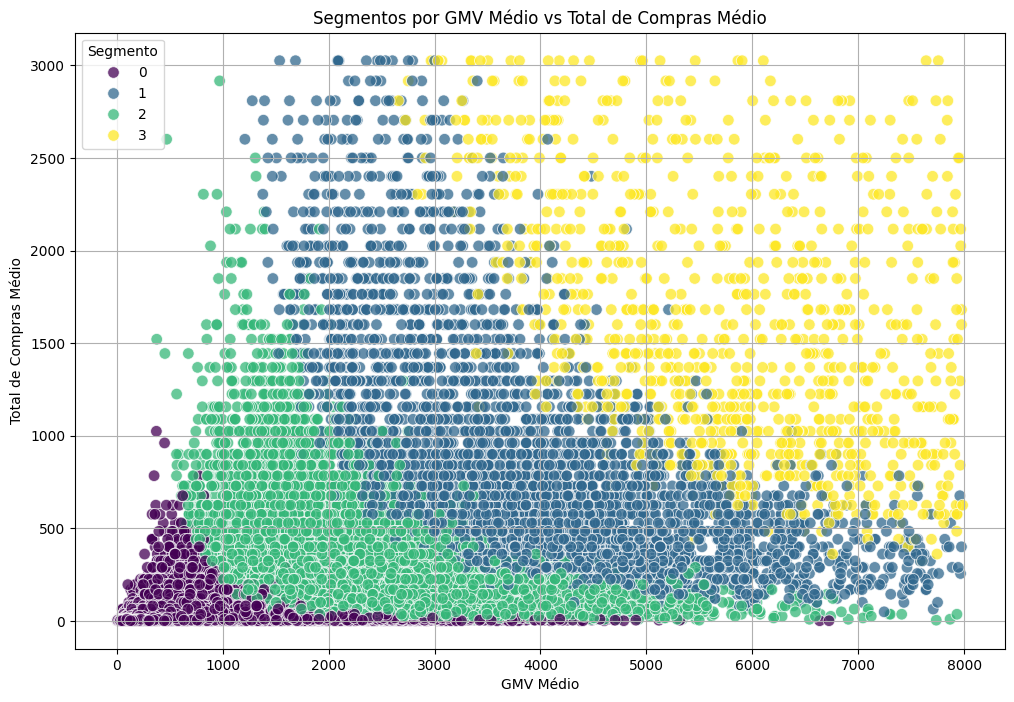

In [ ]:
perfil_segmentos = df_tratado_cluster.groupby('segmento').agg({
    'id_cliente': 'count',
    'gmv_success_mean': 'mean',
    'gmv_success_sum': 'sum',
    'total_compras_sum': 'sum',
    'quantidade_tickets_mean': 'mean',
    'valor_acumulado_sum': 'mean',
    'cliente_recorrente_mean': 'mean',
    'score_fidelidade_mean': 'mean',
    'compras_anteriores_mean': 'mean',
    'faixa_tickets_int_mean': 'mean',
    'sazonalidade_score_mean': 'mean',
    'diversidade_destinos_max': 'mean',
    'diversidade_empresas_max': 'mean',
    'compra_ate_5_dias_feriado_sum': 'mean',
    'periodo_covid_int_max': 'mean',
    'periodo_covid_int_min': 'mean',
    'tipo_dia_int_mean': 'mean',
    'empresa_ida_<lambda>_enc': 'mean',
    'origem_ida_<lambda>_enc': 'mean',
    'destino_ida_<lambda>_enc': 'mean'
}).rename(columns={'id_cliente': 'Qtd_Clientes'}).round(2)

print("\n--- Perfil Detalhado dos Segmentos ---")
print(perfil_segmentos)

# Visualização dos clusters pelos principais eixos
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_tratado_cluster,
    x='gmv_success_sum',
    y='total_compras_sum',
    hue='segmento',
    palette='viridis',
    s=70,
    alpha=0.75
)
plt.title('Segmentos por GMV Médio vs Total de Compras Médio')
plt.xlabel('GMV Médio')
plt.ylabel('Total de Compras Médio')
plt.legend(title='Segmento')
plt.grid(True)
plt.show()

In [ ]:
print("\n--- ANÁLISE AVANÇADA DOS CLUSTERS ---")

centroides = kmeans_final.cluster_centers_
feature_names_out = numeric_cols
assert centroides.shape[1] == len(feature_names_out), "Número de features e colunas não batem!"

df_centroides = pd.DataFrame(centroides, columns=feature_names_out)
df_centroides = df_centroides.rename_axis('segmento').reset_index()

print("\nValores dos Centróides (no espaço de dados padronizado):")
print("Valores positivos indicam acima da média da população, negativos abaixo.")
display(df_centroides.round(2).set_index('segmento').T)


--- ANÁLISE AVANÇADA DOS CLUSTERS ---

Valores dos Centróides (no espaço de dados padronizado):
Valores positivos indicam acima da média da população, negativos abaixo.


segmento                                0             1             2  \
gmv_success_mean               179.839996    173.490005    197.339996   
gmv_success_sum                344.010010   3926.229980   2201.919922   
total_compras_sum                8.430000    817.369995    233.679993   
quantidade_tickets_mean          1.490000      1.330000      1.410000   
valor_acumulado_sum            717.460022  49604.031250  15195.099609   
cliente_recorrente_mean          0.440000      1.000000      1.000000   
score_fidelidade_mean            0.870000      0.600000      0.600000   
compras_anteriores_mean          0.560000     13.020000      6.530000   
faixa_tickets_int_mean           1.470000      1.310000      1.390000   
sazonalidade_score_mean        316.309998    393.070007    372.709991   
diversidade_destinos_max         1.560000      5.360000      4.250000   
diversidade_empresas_max         1.410000      5.060000      3.890000   
compra_ate_5_dias_feriado_sum    0.390000      4.350000      2.380000   
periodo_covid_int_max            1.000000      1.480000      1.380000   
periodo_covid_int_min            0.770000      0.160000      0.210000   
tipo_dia_int_mean                0.350000      0.300000      0.310000   
empresa_ida_<lambda>_enc        73.160004     74.620003     73.300003   
origem_ida_<lambda>_enc        302.989990    286.790009    283.570007   
destino_ida_<lambda>_enc       481.640015    456.720001    450.890015   

segmento                                   3  
gmv_success_mean                  160.860001  
gmv_success_sum                  5801.669922  
total_compras_sum                1591.699951  
quantidade_tickets_mean             1.290000  
valor_acumulado_sum            111178.406250  
cliente_recorrente_mean             1.000000  
score_fidelidade_mean               0.560000  
compras_anteriores_mean            18.959999  
faixa_tickets_int_mean              1.280000  
sazonalidade_score_mean           448.100006  
diversidade_destinos_max            6.630000  
diversidade_empresas_max            6.430000  
compra_ate_5_dias_feriado_sum       6.100000  
periodo_covid_int_max               1.540000  
periodo_covid_int_min               0.120000  
tipo_dia_int_mean                   0.290000  
empresa_ida_<lambda>_enc           73.250000  
origem_ida_<lambda>_enc           276.149994  
destino_ida_<lambda>_enc          449.630005

In [ ]:
colunas_numericas_para_analise = df_tratado_cluster.select_dtypes(include=np.number).columns.tolist()
perfil_segmentos = df_tratado_cluster.groupby('segmento')[colunas_numericas_para_analise].mean().round(2)

print("Perfil Médio de Cada Segmento de Cliente")
# Usamos .T (transpor) para facilitar a comparação entre os segmentos
display(perfil_segmentos.T)

Perfil Médio de Cada Segmento de Cliente


segmento                            0         1         2          3
gmv_success_mean               179.83    173.49    197.42     160.86
gmv_success_sum                343.97   3926.23   2201.59    5801.67
total_compras_sum                8.43    817.37    233.57    1591.70
quantidade_tickets_mean          1.49      1.33      1.42       1.29
valor_acumulado_sum            717.27  49604.02  15189.30  111178.40
cliente_recorrente_mean          0.44      1.00      1.00       1.00
score_fidelidade_mean            0.87      0.60      0.60       0.56
compras_anteriores_mean          0.56     13.02      6.53      18.96
faixa_tickets_int_mean           1.47      1.31      1.39       1.28
sazonalidade_score_mean        316.30    393.07    372.74     448.10
diversidade_destinos_max         1.56      5.36      4.25       6.63
diversidade_empresas_max         1.41      5.06      3.89       6.43
compra_ate_5_dias_feriado_sum    0.39      4.35      2.38       6.10
periodo_covid_int_max            1.00      1.48      1.38       1.54
periodo_covid_int_min            0.77      0.16      0.21       0.12
tipo_dia_int_mean                0.35      0.30      0.31       0.29
empresa_ida_<lambda>_enc        73.16     74.62     73.29      73.25
origem_ida_<lambda>_enc        303.00    286.79    283.54     276.15
destino_ida_<lambda>_enc       481.64    456.72    450.90     449.63
segmento                         0.00      1.00      2.00       3.00

In [ ]:
perfil_segmentos.T.to_csv('perfil_medio_segmentos.csv', sep=';', decimal=',', index=True)
print("Arquivo 'perfil_medio_segmentos.csv' gerado com sucesso!")

Arquivo 'perfil_medio_segmentos.csv' gerado com sucesso!


In [ ]:
df_label = df_tratado_cluster[['id_cliente', 'segmento']]
df_completo = df_completo.merge(df_label, on='id_cliente', how='left')

In [ ]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724036 entries, 0 to 1724035
Data columns (total 45 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   data_compra                datetime64[ns]
 1   time_purchase              datetime64[ns]
 2   gmv_success                float64       
 3   quantidade_tickets         int64         
 4   origem_ida                 object        
 5   destino_ida                object        
 6   origem_volta               object        
 7   destino_volta              object        
 8   empresa_ida                object        
 9   empresa_volta              object        
 10  id_cliente                 object        
 11  periodo_covid              object        
 12  split                      object        
 13  faixa_tickets              object        
 14  ano                        int16         
 15  mes                        int8          
 16  dia                        int8     

In [ ]:
df_completo.to_csv('df_completo_com_clusters.csv', sep=';', decimal=',', index=False)
print("Arquivo 'df_completo_com_clusters.csv' gerado com sucesso!")

Arquivo 'df_completo_com_clusters.csv' gerado com sucesso!


## Analise aprofundada da clusterização

100%|██████████| 2/2 [2:06:59<00:00, 3809.72s/it]


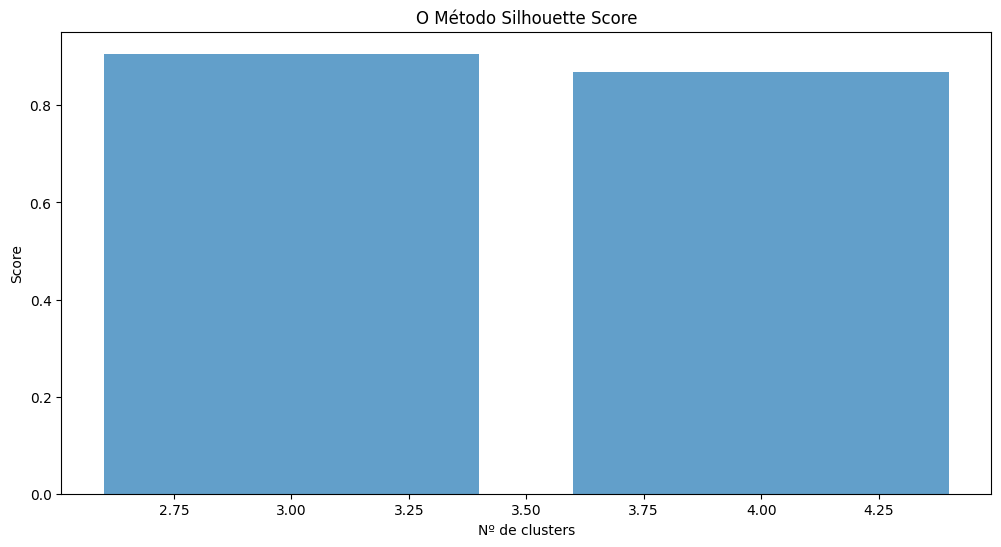

In [ ]:
# Análise aprofundada com Silhouette Score e Visualizações Avançadas
scores = []
inertias = []
for i in tqdm(range(3, 5)):
    kmeans = KMeans(n_clusters=i, max_iter=100, random_state=42, n_init=10).fit(X_prepared)
    inertias.append(kmeans.inertia_)
    scores.append(silhouette_score(X_prepared, kmeans.labels_))

plt.figure(figsize=(12, 6))
plt.bar(range(3, 5), scores, align='center', alpha=0.7)
plt.title('O Método Silhouette Score')
plt.xlabel('Nº de clusters')
plt.ylabel('Score')
plt.show()


--- Média das Features (Normalizadas por MinMax) por Cluster ---


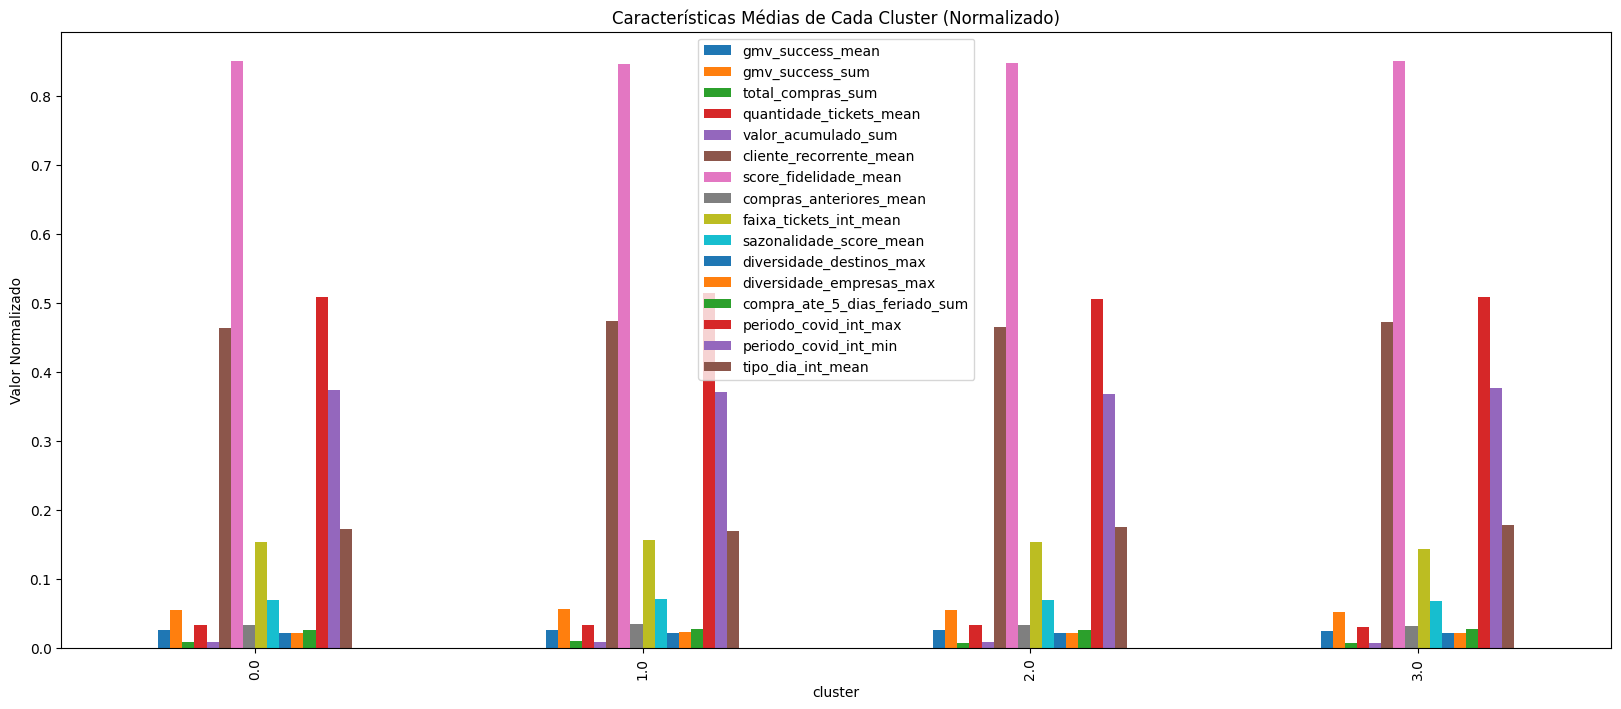

In [ ]:
dataset_to_scale = df_tratado_cluster[features_numericas]
X_minmax = MinMaxScaler().fit_transform(dataset_to_scale)
df_norm = pd.DataFrame(X_minmax)
df_norm.columns = dataset_to_scale.columns

df_norm['cluster'] = df_tratado_cluster['segmento'] # Usando o segmento já calculado

print("\n--- Média das Features (Normalizadas por MinMax) por Cluster ---")
df_res = df_norm.groupby('cluster').mean()
df_res.plot(kind='bar', figsize=(20,8), title="Características Médias de Cada Cluster (Normalizado)")
plt.ylabel("Valor Normalizado")
plt.show()

Ele executa o algoritmo K-Means várias vezes, uma para cada número de clusters que você quer testar (de 2 a 6). Para cada execução, ele calcula duas métricas:

**Score de Silhueta:** é como um "índice de qualidade" para a sua segmentação. Ele mede, para cada cliente, o quão parecido ele é com os membros do seu próprio cluster em comparação com os membros dos outros clusters.

**Score próximo de +1:** Os clusters são densos e bem separados. Uma ótima segmentação.

**Score próximo de 0:** Os clusters se sobrepõem.

**Score negativo:** Os clientes podem ter sido colocados no cluster errado.
Regra geral: O k que te der o maior Score de Silhueta é, muitas vezes, a melhor escolha.


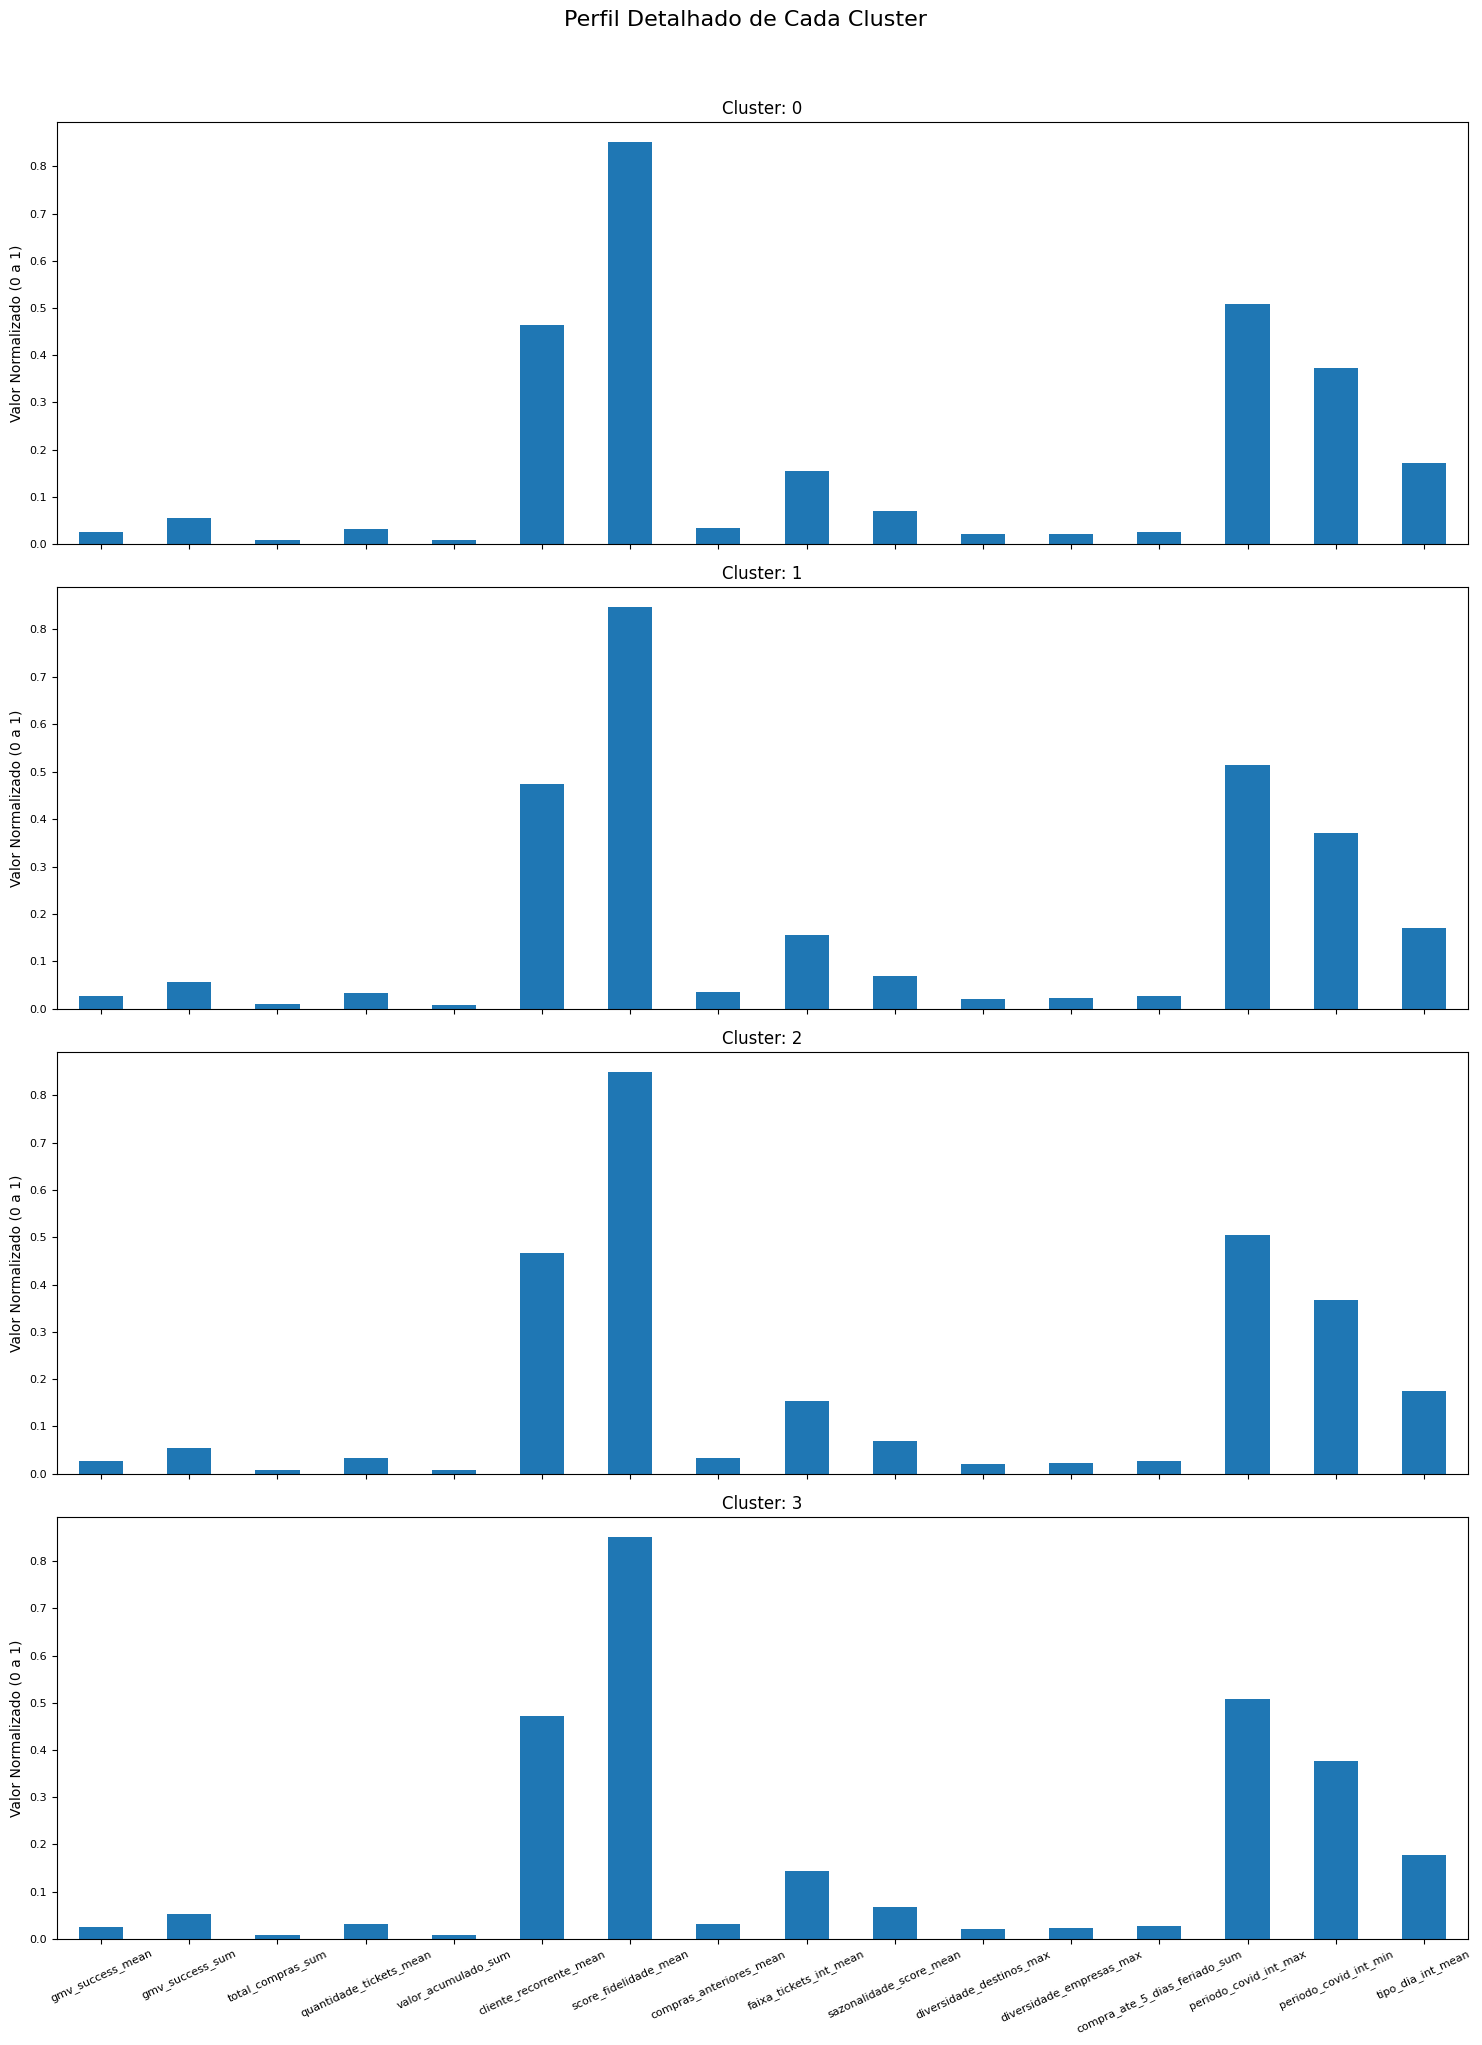

In [ ]:
# Gráficos de barras individuais para cada cluster
labels = df_tratado_cluster['segmento'].unique()
qtdClusters = len(set(labels))

fig, axes = plt.subplots(nrows=qtdClusters, ncols=1, figsize=(15, 5 * qtdClusters), sharex=True)
fig.suptitle("Perfil Detalhado de Cada Cluster", fontsize=16, y=1.02)

for c in sorted(set(labels)):
    medias = df_norm[df_norm.cluster == c].mean()
    medias.drop(['cluster'], inplace = True)
    ax = axes[c] if qtdClusters > 1 else axes
    medias.plot(ax=ax, kind='bar', fontsize=8, rot=25)
    ax.set_title(f'Cluster: {c}')
    ax.set_ylabel("Valor Normalizado (0 a 1)")

fig.tight_layout()
plt.show()

In [ ]:
fig = go.Figure()

colnames = df_norm.drop(['cluster'], axis = 1).columns

for c in set(labels):
    medias =  df_norm[ df_norm.cluster== c].mean()
    medias.drop(['cluster'], inplace = True)

    # adiciona um novo plot
    fig.add_trace(go.Scatterpolar(
          r=medias.values,
          theta=colnames,
          fill='toself',
          name='Cluster ' + str(c)
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()

## Analise via PCA


[ANÁLISE 4/4] Visualização dos clusters em 2D com PCA...


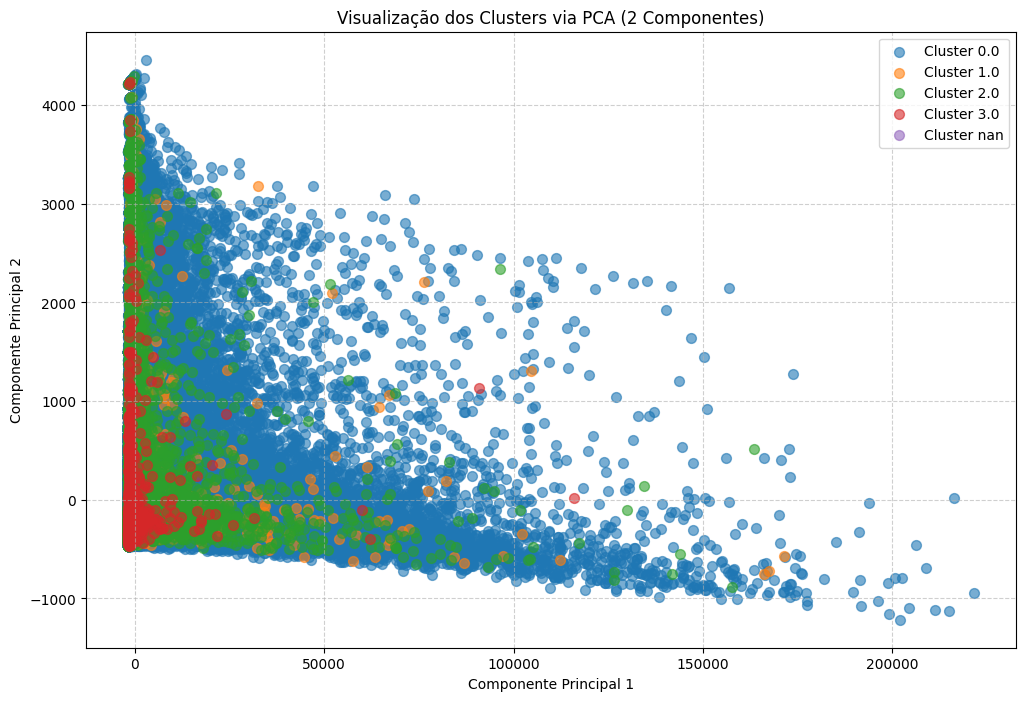

In [ ]:
print("\n[ANÁLISE 4/4] Visualização dos clusters em 2D com PCA...")

pca_visualizacao = PCA(n_components=2, random_state=42)
X_pca_visualizacao = pca_visualizacao.fit_transform(X_prepared)

df_pca = pd.DataFrame(X_pca_visualizacao, columns=['PC1', 'PC2'])


df_pca['cluster'] = df_tratado_cluster['segmento']

plt.figure(figsize=(12, 8))

for cluster_id in sorted(df_pca['cluster'].unique()):
    cluster_data = df_pca[df_pca['cluster'] == cluster_id]
    plt.scatter(
        cluster_data['PC1'],
        cluster_data['PC2'],
        s=50,
        alpha=0.6,
        label=f'Cluster {cluster_id}'
    )

plt.title('Visualização dos Clusters via PCA (2 Componentes)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
df_export = df_tratado_cluster.copy()
df_export['PC1'] = df_pca['PC1']
df_export['PC2'] = df_pca['PC2']

In [ ]:
df_export.to_csv('cluster_analise_final.csv', sep=';', decimal=',' ,index=False)
print("Arquivo 'cluster_analise_final.csv' gerado com sucesso!")

Arquivo 'cluster_analise_final.csv' gerado com sucesso!


In [ ]:
df_res.to_csv('cluster_medias.csv', sep=';', decimal=',', index=False)
print("Arquivo 'cluster_medias.csv' gerado com sucesso!")

Arquivo 'cluster_medias.csv' gerado com sucesso!


`cluster_analise_final.csv`
Contém o DataFrame principal utilizado na análise de clustering, incluindo as colunas originais dos clientes e variáveis preparadas para os modelos. Possui os resultados dos clusters atribuídos, permitindo segmentações detalhadas, cruzamento com outras bases ou construção de visualizações personalizadas.

`cluster_medias.csv`
Apresenta as médias das variáveis principais (features) para cada cluster. Esse arquivo permite identificar rapidamente o perfil médio de cada grupo, tornando fácil criar gráficos comparativos entre clusters e entender quais características são mais marcantes em cada segmento.

`centroides_clusters.csv`
Contém os valores dos centróides de cada cluster no mesmo espaço dos dados padronizados (features utilizadas no modelo). É útil para análises avançadas e técnicas, mostrando onde cada cluster está localizado em relação às variáveis originais. Bons para relatórios explicativos, material técnico e compreensão da segmentação matemática.

`perfil_medio_segmentos.csv`
Fornece o perfil médio dos segmentos (clusters), com as médias das variáveis para cada grupo após clusterização. Serve para apoiar dashboards, relatórios gerenciais e análises de desempenho entre grupos de clientes, destacando padrões e diferenciais dos segmentos.

`df_completo_com_clusters.csv`
É o arquivo mais abrangente. Contém todos os dados de clientes e transações (base original completa), com a coluna “segmento” dos clusters adicionada. Esse CSV é o ideal para criar visualizações, análises detalhadas, filtros, cruzamentos com outras fontes e relatórios dinâmicos no Power BI, pois possui tanto os dados do cliente quanto a segmentação feita por cluster.

# Timing é tudo

In [ ]:
# ==============================================================================
# BIBLIOTECAS PADRÃO E MANIPULAÇÃO DE DADOS
# ==============================================================================
import pandas as pd
import numpy as np
import numbers
import gdown

# ==============================================================================
# VISUALIZAÇÃO DE DADOS
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# ==============================================================================
# MACHINE LEARNING - PRÉ-PROCESSAMENTO E PIPELINES
# ==============================================================================
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ==============================================================================
# MACHINE LEARNING - MODELAGEM E OTIMIZAÇÃO
# ==============================================================================
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
import xgboost as xgb
import lightgbm as lgb

# ==============================================================================
# MACHINE LEARNING - MÉTRICAS DE AVALIAÇÃO
# ==============================================================================
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,
                             roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
                             classification_report, silhouette_score)

# ==============================================================================
# BIBLIOTECAS PARA DADOS DESBALANCEADOS (IMBLEARN)
# ==============================================================================
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# ==============================================================================
# UTILITÁRIOS
# ==============================================================================
from tqdm import tqdm

## Janela de previsão

In [ ]:
df_completo_com_segmento = df_completo.copy()

In [ ]:
print(df_completo_com_segmento['segmento'].unique())

[ 0.  1.  2. nan  3.]


In [ ]:
df_completo_com_segmento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724036 entries, 0 to 1724035
Data columns (total 45 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   data_compra                datetime64[ns]
 1   time_purchase              datetime64[ns]
 2   gmv_success                float64       
 3   quantidade_tickets         int64         
 4   origem_ida                 object        
 5   destino_ida                object        
 6   origem_volta               object        
 7   destino_volta              object        
 8   empresa_ida                object        
 9   empresa_volta              object        
 10  id_cliente                 object        
 11  periodo_covid              object        
 12  split                      object        
 13  faixa_tickets              object        
 14  ano                        int16         
 15  mes                        int8          
 16  dia                        int8     

In [ ]:
print(df_completo_com_segmento['segmento'].isna().sum())


137258


In [ ]:
df_completo_com_segmento.dropna(subset=['segmento'], inplace=True)

In [ ]:
def split_by_size(df, test_size, val_size):
    assert len(df) > test_size + val_size, "Tamanhos de teste/validação excedem o DataFrame total."

    df_test = df.tail(test_size).copy()
    df_train = df.iloc[:-test_size].copy()
    df_val = df_train.tail(val_size).copy()
    df_train_final = df_train.iloc[:-val_size].copy()

    print("--- Divisão Concluída ---\n")
    print(f"Treino: {df_train_final.shape} | Validação: {df_val.shape} | Teste: {df_test.shape}\n")

    print(f"Período do treino: {df_train_final['data_compra'].min().date()} até {df_train_final['data_compra'].max().date()}")
    print(f"Período da validação: {df_val['data_compra'].min().date()} até {df_val['data_compra'].max().date()}")
    print(f"Período do teste: {df_test['data_compra'].min().date()} até {df_test['data_compra'].max().date()}\n")

    return df_train_final, df_val, df_test

In [ ]:
def criar_conjuntos_de_modelagem(df_historico, df_futuro, window_days, features_list):
    """
    Cria os conjuntos X (features) e y (alvo) para um determinado período.
    X é o último estado conhecido de cada cliente no df_historico.
    y é 1 se o cliente comprou no df_futuro dentro da janela, e 0 caso contrário.
    """
    print(f"Processando período de {df_historico['data_compra'].min().date()} a {df_historico['data_compra'].max().date()}")

    X = df_historico.sort_values('data_compra').groupby('id_cliente').tail(1)

    data_inicio_janela = df_historico['data_compra'].max()
    data_fim_janela = data_inicio_janela + pd.Timedelta(days=window_days)
    print(f"Janela de previsão para este conjunto: de {data_inicio_janela.date()} a {data_fim_janela.date()}")

    clientes_compradores = df_futuro[
        (df_futuro['data_compra'] > data_inicio_janela) &
        (df_futuro['data_compra'] <= data_fim_janela)
    ]['id_cliente'].unique()

    y = X['id_cliente'].isin(clientes_compradores).astype(int)

    print(f"Total de clientes no conjunto: {len(X)}")
    print(f"Total de clientes que compraram na janela ({y.sum()} de {len(y)}): {y.mean():.2%}\n")

    return X[features_list], y

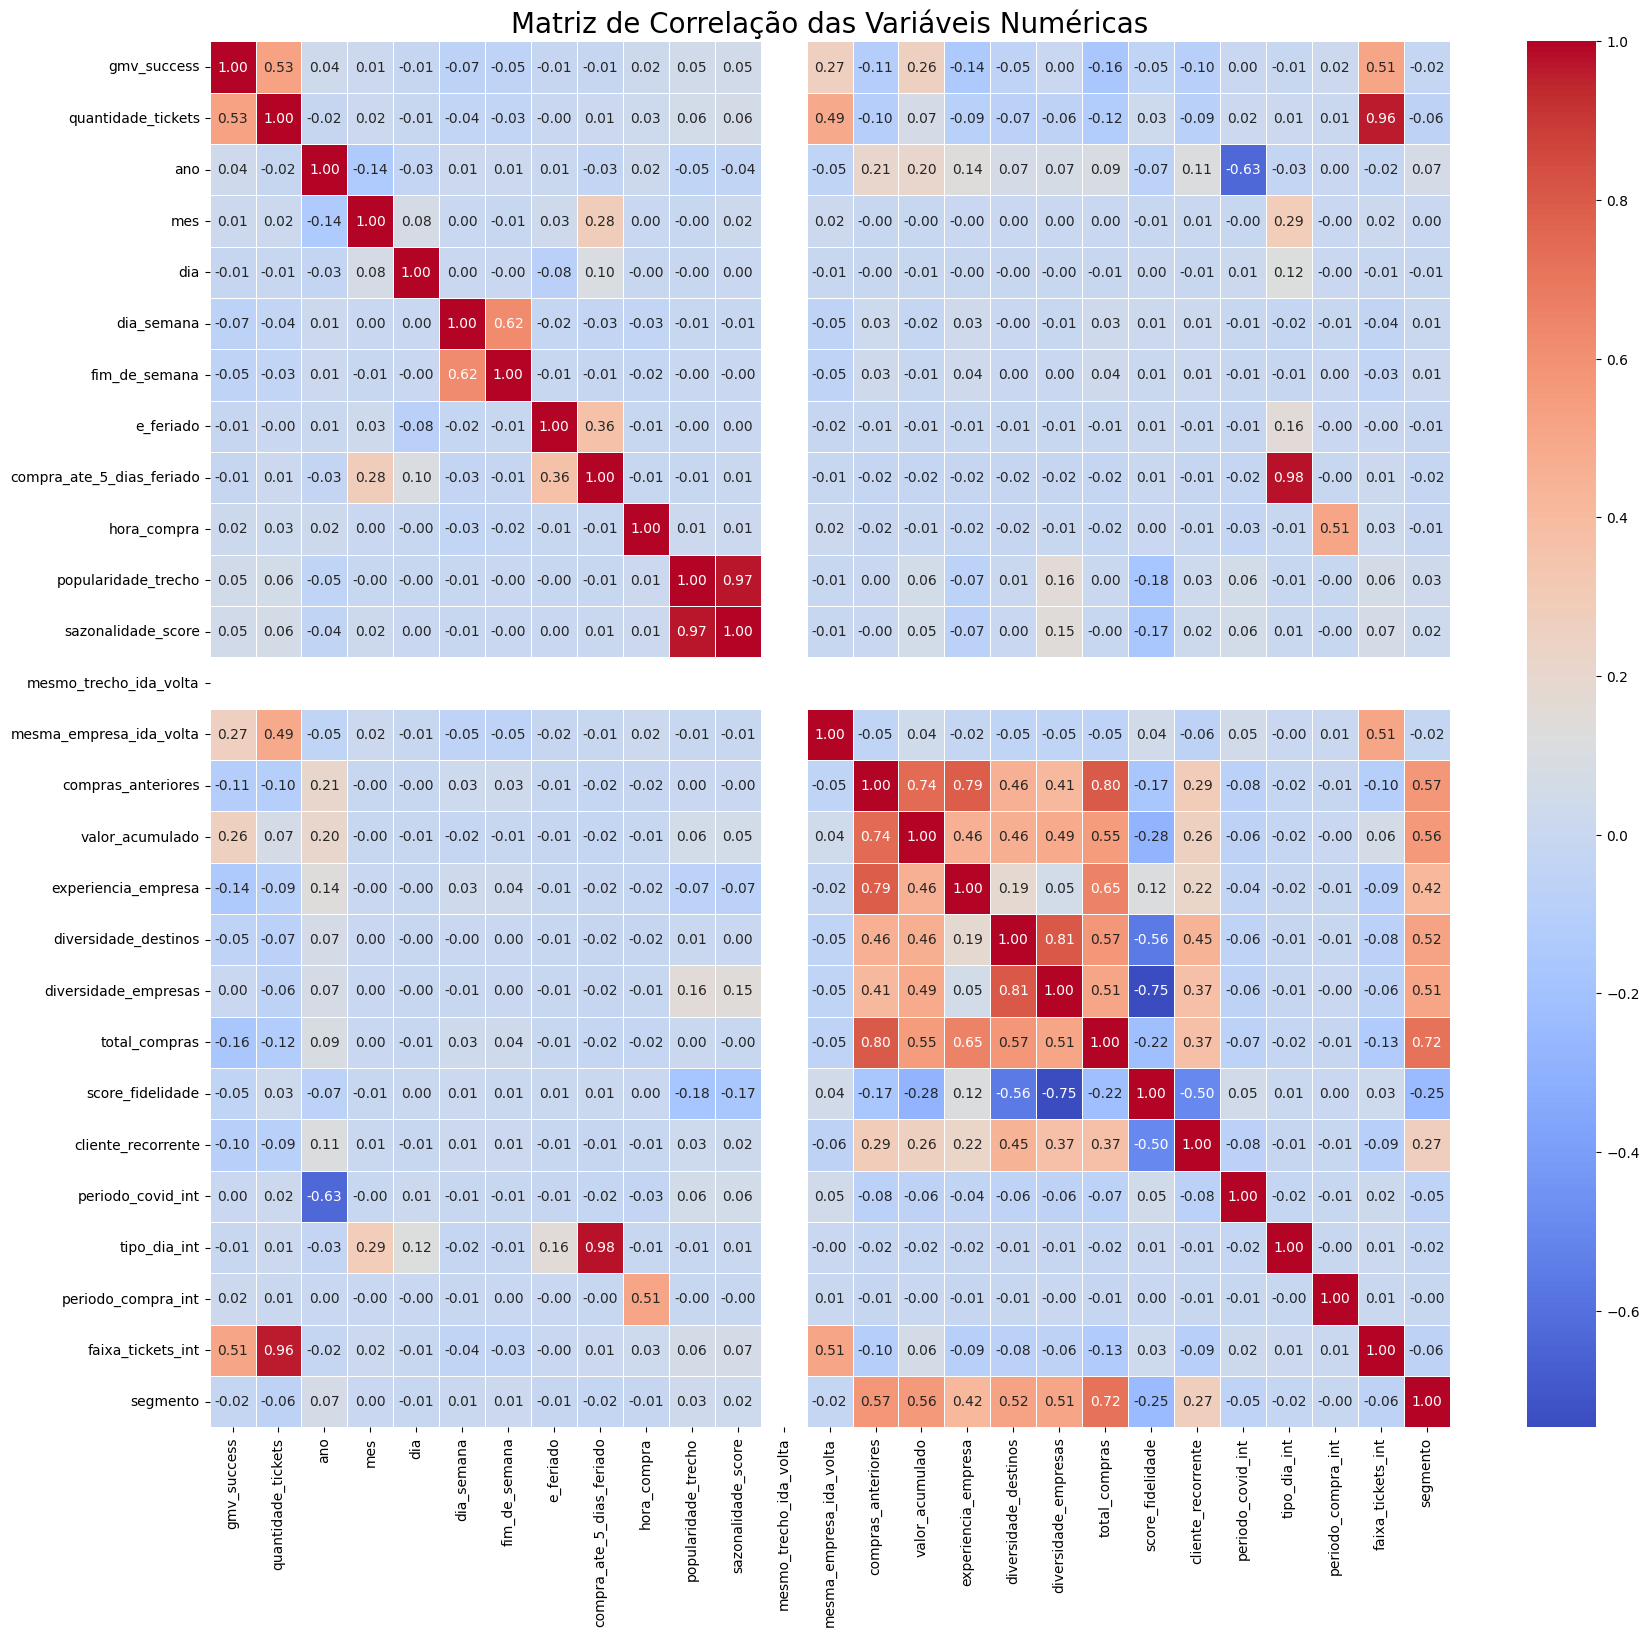

Matriz de correlação criada com sucesso. Procure por valores próximos a 1 ou -1 para identificar variáveis altamente correlacionadas.


In [ ]:
df_numerico = df_completo_com_segmento.select_dtypes(include=np.number)
correlacao = df_numerico.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=20)
plt.show()

print("Matriz de correlação criada com sucesso. Procure por valores próximos a 1 ou -1 para identificar variáveis altamente correlacionadas.")

In [ ]:
features_para_modelagem = [
    # Variáveis de Valor e Frequência (Números inteiros e de ponto flutuante)
    'gmv_success',
    'total_compras',
    'quantidade_tickets',
    'faixa_tickets_int',
    'periodo_compra_int',
    'compras_anteriores',
    'valor_acumulado',

    # Variáveis de Fidelidade e Recorrência (Números de ponto flutuante e inteiros)
    'cliente_recorrente',
    'score_fidelidade',

    # Variáveis de Comportamento e Contexto (Números inteiros e de ponto flutuante)
    'sazonalidade_score',
    'diversidade_destinos',
    'diversidade_empresas',
    'compra_ate_5_dias_feriado',
    'periodo_covid_int',
    'tipo_dia_int',

    # A Variável Chave (Categórica/Numérica)
    'segmento',
    'origem_ida',
    'destino_ida',
    'empresa_ida',
]


# Definir a janela de tempo para a previsão
PREDICTION_WINDOW_DAYS = 30

# Executar a divisão temporal
df_train_final, df_val, df_test = split_by_size(
    df_completo_com_segmento,
    test_size=340000,
    val_size=170000
)

X_train, y_train = criar_conjuntos_de_modelagem(df_train_final, df_val, PREDICTION_WINDOW_DAYS, features_para_modelagem)
X_val, y_val = criar_conjuntos_de_modelagem(df_val, df_test, PREDICTION_WINDOW_DAYS, features_para_modelagem)
print("Conjuntos de treino, validação e teste criados com sucesso!")

--- Divisão Concluída ---

Treino: (1076778, 45) | Validação: (170000, 45) | Teste: (340000, 45)

Período do treino: 2013-09-12 até 2022-11-04
Período da validação: 2022-11-04 até 2023-04-22
Período do teste: 2023-04-22 até 2024-04-01

Processando período de 2013-09-12 a 2022-11-04
Janela de previsão para este conjunto: de 2022-11-04 a 2022-12-04
Total de clientes no conjunto: 448475
Total de clientes que compraram na janela (12253 de 448475): 2.73%

Processando período de 2022-11-04 a 2023-04-22
Janela de previsão para este conjunto: de 2023-04-22 a 2023-05-22
Total de clientes no conjunto: 92081
Total de clientes que compraram na janela (9185 de 92081): 9.97%

Conjuntos de treino, validação e teste criados com sucesso!


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

if 'id_cliente' in features_categoricas:
    features_categoricas.remove('id_cliente')

features_numericas = X_train.select_dtypes(include=np.number).columns.tolist()
features_categoricas = [
    item for item in X_train.select_dtypes(include=['object', 'category']).columns.tolist()
    if item not in ['id_cliente', 'periodo_covid']
]

# Pré-processador
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_numericas),
        ('cat', categorical_transformer, features_categoricas)
    ],
    remainder='drop'
)


full_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb.XGBClassifier(random_state=42, eval_metric='logloss'))
])


print("Pipeline com SMOTE definido com sucesso.")

Pipeline com SMOTE definido com sucesso.



Iniciando o treinamento do modelo...
Modelo treinado com sucesso!

Avaliando a performance do modelo nos dados de validação...

--- Métricas de Performance (Validação) ---
Acurácia: 0.8949
Precisão (para classe 1): 0.4608
Recall (para classe 1): 0.3161
F1-Score (para classe 1): 0.3749
ROC AUC Score: 0.8848

--- Matriz de Confusão (Validação) ---


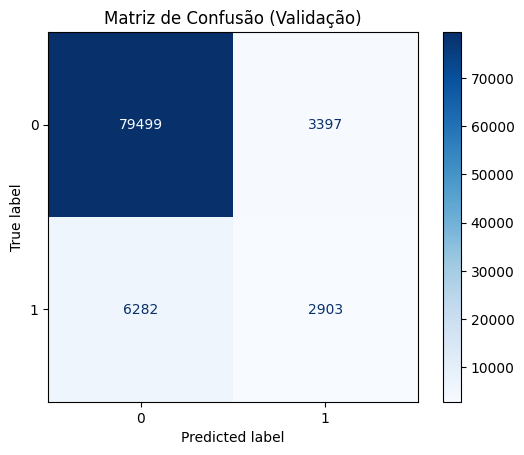

In [ ]:
# ==============================================================================
# PASSO 1: TREINAMENTO DO MODELO
# ==============================================================================
print("\nIniciando o treinamento do modelo...")

full_pipeline.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

# ==============================================================================
# AVALIAÇÃO DO MODELO (CLASSIFICAÇÃO BINÁRIA)
# ==============================================================================
print("\nAvaliando a performance do modelo nos dados de validação...")

# Fazer previsões no conjunto de validação
y_pred = full_pipeline.predict(X_val)
# predict_proba para um problema binário retorna a probabilidade da classe 0 e da classe 1
y_pred_proba = full_pipeline.predict_proba(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, zero_division=0)
recall = recall_score(y_val, y_pred, zero_division=0)
f1 = f1_score(y_val, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_val, y_pred_proba[:, 1])

print("\n--- Métricas de Performance (Validação) ---")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão (para classe 1): {precision:.4f}")
print(f"Recall (para classe 1): {recall:.4f}")
print(f"F1-Score (para classe 1): {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# --- Plotar a Matriz de Confusão ---
print("\n--- Matriz de Confusão (Validação) ---")
cm = confusion_matrix(y_val, y_pred)
# Para um caso binário, as classes são [0, 1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão (Validação)")
plt.show()

nosso modelo tem um poder de separação excelente, com um ROC AUC de 0.8848, o que é uma base sólida para qualquer estratégia.

A métrica mais importante para o negócio aqui é a Precisão, que está em 0.4608. Isso significa que, de todas as vezes que o modelo previu que um cliente iria comprar, ele estava correto em quase 47% delas. Isso representa um ganho de eficiência enorme para o nosso marketing.

Falsos Positivos (FP): 3.397 - Estes são os clientes que o modelo previu que comprariam, mas não o fizeram. Este é o nosso "custo" de erro, pois poderíamos ter gasto recursos com eles.

Falsos Negativos (FN): 6.282 - Estes são os clientes que o modelo não previu, mas que realmente compraram. Estas são as nossas "oportunidades perdidas".

## Melhorando os parametros


[PASSO 5/4] Ajustando hiperparâmetros do modelo...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Busca de hiperparâmetros concluída!
Melhores parâmetros encontrados: {'classifier__subsample': 1.0, 'classifier__n_estimators': 300, 'classifier__max_depth': 9, 'classifier__learning_rate': 0.2, 'classifier__colsample_bytree': 0.8}
Melhor ROC AUC score: 0.9448

[PASSO 6/4] Ajustando o ponto de corte da previsão...


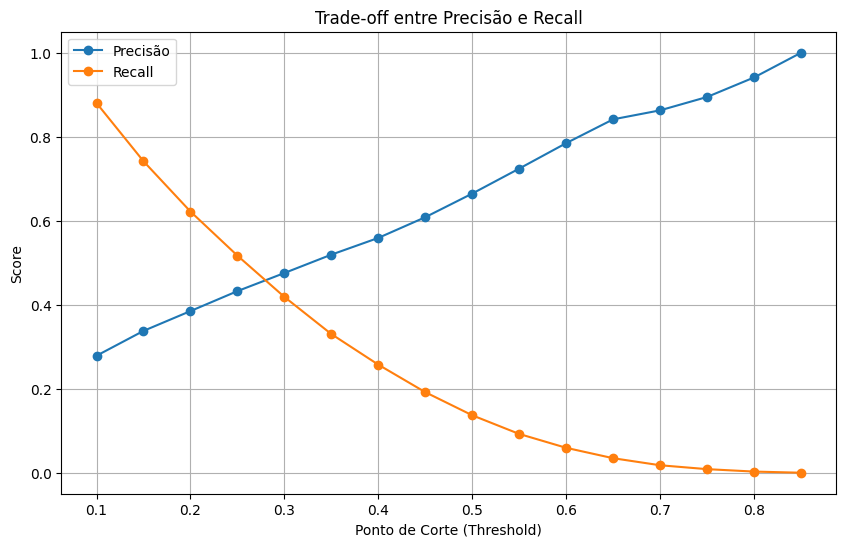


Análise de trade-off concluída. O melhor ponto de corte dependerá do custo de erro do negócio.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

# ==============================================================================
# 1. AJUSTE DE HIPERPARÂMETROS COM RANDOMIZEDSEARCHCV
# ==============================================================================
print("\n[PASSO 5/4] Ajustando hiperparâmetros do modelo...")

param_dist = {
    'classifier__n_estimators': [100, 200, 300, 500],
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=full_pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=skf,
    scoring='roc_auc',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("\nBusca de hiperparâmetros concluída!")
print(f"Melhores parâmetros encontrados: {random_search.best_params_}")
print(f"Melhor ROC AUC score: {random_search.best_score_:.4f}")

best_model = random_search.best_estimator_


# ==============================================================================
# 2. AJUSTE DO PONTO DE CORTE (THRESHOLD)
# ==============================================================================
print("\n[PASSO 6/4] Ajustando o ponto de corte da previsão...")

y_pred_proba = best_model.predict_proba(X_val)[:, 1]

# Testar diferentes thresholds para encontrar o melhor balanço
thresholds = np.arange(0.1, 0.9, 0.05)
precision_scores = []
recall_scores = []

for t in thresholds:
    y_pred_threshold = (y_pred_proba >= t).astype(int)
    precision_scores.append(precision_score(y_val, y_pred_threshold, zero_division=0))
    recall_scores.append(recall_score(y_val, y_pred_threshold, zero_division=0))

# Plotar a curva de Precision vs Recall para ajudar na decisão
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precisão', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.xlabel("Ponto de Corte (Threshold)")
plt.ylabel("Score")
plt.title("Trade-off entre Precisão e Recall")
plt.legend()
plt.grid(True)
plt.show()

print("\nAnálise de trade-off concluída. O melhor ponto de corte dependerá do custo de erro do negócio.")

--- Métricas do Modelo Final com Threshold = 0.67 ---
Precisão: 0.8618
Recall: 0.0285
F1-Score: 0.0552
ROC AUC Score: 0.8962


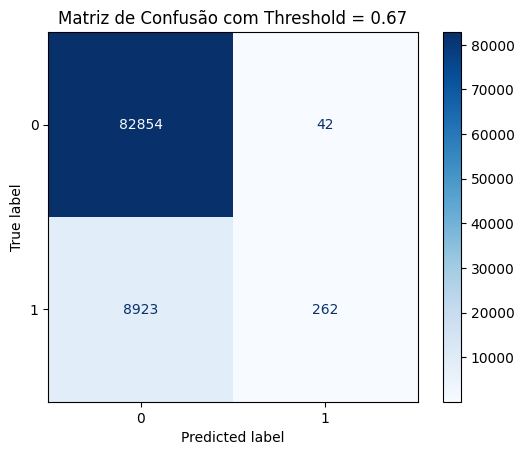

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

y_pred_proba = best_model.predict_proba(X_val)[:, 1]


business_threshold = 0.67

y_pred_final = (y_pred_proba >= business_threshold).astype(int)

final_precision = precision_score(y_val, y_pred_final)
final_recall = recall_score(y_val, y_pred_final)
final_f1 = f1_score(y_val, y_pred_final)
final_roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f"--- Métricas do Modelo Final com Threshold = {business_threshold} ---")
print(f"Precisão: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")
print(f"ROC AUC Score: {final_roc_auc:.4f}")

# Plotar a Matriz de Confusão Final
cm = confusion_matrix(y_val, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matriz de Confusão com Threshold = {business_threshold}")
plt.show()

## Utilizando Scale_pos_Wight

In [ ]:
# Calcular a proporção de desbalanceamento entre as classes
neg_class_count = len(y_train[y_train == 0])
pos_class_count = len(y_train[y_train == 1])

# A fórmula para o peso é (número de negativos) / (número de positivos)
scale_pos_weight_value = neg_class_count / pos_class_count

print(f"Classe negativa (0): {neg_class_count} amostras")
print(f"Classe positiva (1): {pos_class_count} amostras")
print(f"O valor de 'scale_pos_weight' a ser usado é: {scale_pos_weight_value:.2f}")

Classe negativa (0): 436222 amostras
Classe positiva (1): 12253 amostras
O valor de 'scale_pos_weight' a ser usado é: 35.60


In [ ]:
# A sua lista mestra de features
features_para_modelagem = [
    # Variáveis de Valor e Frequência
    'gmv_success',
    'total_compras',
    'quantidade_tickets',
    'faixa_tickets_int',
    'periodo_compra_int',
    'compras_anteriores',
    'valor_acumulado',

    # Variáveis de Fidelidade e Recorrência
    'cliente_recorrente',
    'score_fidelidade',

    # Variáveis de Comportamento e Contexto
    'sazonalidade_score',
    'diversidade_destinos',
    'diversidade_empresas',
    'compra_ate_5_dias_feriado',
    'periodo_covid_int',
    'tipo_dia_int',

    # A Variável Chave
    'segmento',
    'origem_ida',
    'destino_ida',
    'empresa_ida',
]

features_numericas = [
    'gmv_success', 'total_compras', 'quantidade_tickets', 'faixa_tickets_int',
    'periodo_compra_int', 'compras_anteriores', 'valor_acumulado', 'cliente_recorrente',
    'score_fidelidade', 'sazonalidade_score', 'diversidade_destinos',
    'diversidade_empresas', 'compra_ate_5_dias_feriado', 'periodo_covid_int',
    'tipo_dia_int', 'segmento'
]

features_categoricas = [
    'origem_ida', 'destino_ida', 'empresa_ida'
]

print("As features foram separadas em numéricas e categóricas com sucesso!")
print(f"Features Numéricas: {features_numericas}")
print(f"Features Categóricas: {features_categoricas}")


As features foram separadas em numéricas e categóricas com sucesso!
Features Numéricas: ['gmv_success', 'total_compras', 'quantidade_tickets', 'faixa_tickets_int', 'periodo_compra_int', 'compras_anteriores', 'valor_acumulado', 'cliente_recorrente', 'score_fidelidade', 'sazonalidade_score', 'diversidade_destinos', 'diversidade_empresas', 'compra_ate_5_dias_feriado', 'periodo_covid_int', 'tipo_dia_int', 'segmento']
Features Categóricas: ['origem_ida', 'destino_ida', 'empresa_ida']


In [ ]:
print("Colunas do DataFrame X_train:")
print(X_train.columns)

Colunas do DataFrame X_train:
Index(['gmv_success', 'total_compras', 'quantidade_tickets',
       'faixa_tickets_int', 'periodo_compra_int', 'compras_anteriores',
       'valor_acumulado', 'cliente_recorrente', 'score_fidelidade',
       'sazonalidade_score', 'diversidade_destinos', 'diversidade_empresas',
       'compra_ate_5_dias_feriado', 'periodo_covid_int', 'tipo_dia_int',
       'segmento', 'origem_ida', 'destino_ida', 'empresa_ida'],
      dtype='object')


In [ ]:
if 'id_cliente' in features_numericas:
    features_numericas.remove('id_cliente')
if 'id_cliente' in features_categoricas:
    features_categoricas.remove('id_cliente')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_numericas),
        ('cat', categorical_transformer, features_categoricas)
    ],
    remainder='drop'
)

pipeline_com_scale = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight_value
    ))
])

print("Pipeline com 'scale_pos_weight' definida com sucesso!")

Pipeline com 'scale_pos_weight' definida com sucesso!



Treinando o modelo com scale_pos_weight...
Modelo treinado com sucesso!

Avaliando a performance do modelo com scale_pos_weight...

--- Métricas de Performance (Validação com scale_pos_weight) ---
Acurácia (SPW): 0.7074
Precisão (SPW): 0.2513
Recall (SPW): 0.9768
F1-Score (SPW): 0.3998
ROC AUC Score (SPW): 0.8973

--- Matriz de Confusão (Modelo com scale_pos_weight) ---


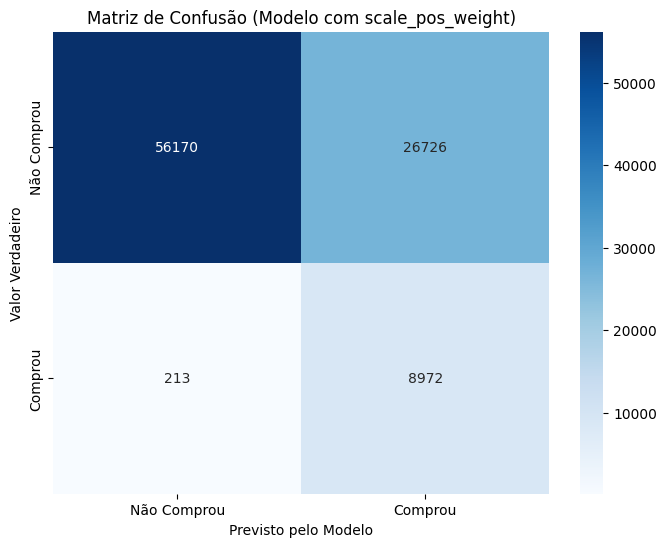

In [ ]:
# --- TREINAMENTO DO MODELO COM SCALE_POS_WEIGHT ---
print("\nTreinando o modelo com scale_pos_weight...")
pipeline_com_scale.fit(X_train, y_train)
print("Modelo treinado com sucesso!")


# --- AVALIAÇÃO DO MODELO COM SCALE_POS_WEIGHT ---
print("\nAvaliando a performance do modelo com scale_pos_weight...")

# Renomeando as variáveis de predição
y_pred_spw = pipeline_com_scale.predict(X_val)
y_pred_proba_spw = pipeline_com_scale.predict_proba(X_val)[:, 1]

# Renomeando as variáveis de métricas
accuracy_spw = accuracy_score(y_val, y_pred_spw)
precision_spw = precision_score(y_val, y_pred_spw, zero_division=0)
recall_spw = recall_score(y_val, y_pred_spw, zero_division=0)
f1_spw = f1_score(y_val, y_pred_spw, zero_division=0)
roc_auc_spw = roc_auc_score(y_val, y_pred_proba_spw)

# Atualizando os prints para clareza
print("\n--- Métricas de Performance (Validação com scale_pos_weight) ---")
print(f"Acurácia (SPW): {accuracy_spw:.4f}")
print(f"Precisão (SPW): {precision_spw:.4f}")
print(f"Recall (SPW): {recall_spw:.4f}")
print(f"F1-Score (SPW): {f1_spw:.4f}")
print(f"ROC AUC Score (SPW): {roc_auc_spw:.4f}")


# --- MATRIZ DE CONFUSÃO PARA O MODELO COM SCALE_POS_WEIGHT ---
print("\n--- Matriz de Confusão (Modelo com scale_pos_weight) ---")

# Renomeando a variável da matriz
cm_spw = confusion_matrix(y_val, y_pred_spw)

# Plotando com Seaborn
labels = ['Não Comprou', 'Comprou']
plt.figure(figsize=(8, 6))
sns.heatmap(cm_spw, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Previsto pelo Modelo')
plt.ylabel('Valor Verdadeiro')
plt.title('Matriz de Confusão (Modelo com scale_pos_weight)')
plt.show()

In [ ]:
import pandas as pd

data = {
    "Métrica": ["Acurácia", "Precisão", "Recall", "F1-Score", "ROC AUC"],
    "Modelo com SMOTE": [accuracy, precision, recall, f1, roc_auc],
    "Modelo com Scale_Pos_Weight": [accuracy_spw, precision_spw, recall_spw, f1_spw, roc_auc_spw]
}

df_comparacao = pd.DataFrame(data)
df_comparacao.set_index('Métrica', inplace=True)

print("\n=======================================================")
print("        TABELA DE COMPARAÇÃO DOS MODELOS")
print("=======================================================")
print(df_comparacao.round(4))


        TABELA DE COMPARAÇÃO DOS MODELOS
          Modelo com SMOTE  Modelo com Scale_Pos_Weight
Métrica                                                
Acurácia            0.8949                       0.7074
Precisão            0.4608                       0.2513
Recall              0.3161                       0.9768
F1-Score            0.3749                       0.3998
ROC AUC             0.8848                       0.8973


## Ajustes adicionais buscando novos resultados

In [ ]:
df_agregado_para_merge = df_clientes[['id_cliente', 'gmv_success_sum', 'total_compras_sum']].copy()

df_completo = pd.merge(df_completo, df_agregado_para_merge, on='id_cliente', how='left')

df_completo['ticket_medio_cliente'] = df_completo['gmv_success_sum'] / df_completo['total_compras_sum']
df_completo['ticket_medio_cliente'] = df_completo['ticket_medio_cliente'].fillna(0)

df_completo['proporcao_feriado'] = df_completo['compra_ate_5_dias_feriado'] / df_completo['total_compras']
df_completo['proporcao_feriado'] = df_completo['proporcao_feriado'].fillna(0)

print("Merge e engenharia de features concluídos. As variáveis 'gmv_success_sum' e 'total_compras_sum' foram adicionadas e as novas features foram criadas.")

Merge e engenharia de features concluídos. As variáveis 'gmv_success_sum' e 'total_compras_sum' foram adicionadas e as novas features foram criadas.


In [ ]:
features_para_modelagem = [
    'gmv_success', 'total_compras', 'quantidade_tickets', 'faixa_tickets_int',
    'periodo_compra_int', 'compras_anteriores', 'valor_acumulado',
    'cliente_recorrente', 'score_fidelidade', 'sazonalidade_score',
    'diversidade_destinos', 'diversidade_empresas', 'compra_ate_5_dias_feriado',
    'periodo_covid_int', 'tipo_dia_int', 'segmento',
    'origem_ida', 'destino_ida', 'empresa_ida'
]

features_numericas = [
    'gmv_success', 'total_compras', 'quantidade_tickets', 'faixa_tickets_int',
    'periodo_compra_int', 'compras_anteriores', 'valor_acumulado',
    'cliente_recorrente', 'score_fidelidade', 'sazonalidade_score',
    'diversidade_destinos', 'diversidade_empresas', 'compra_ate_5_dias_feriado',
    'periodo_covid_int', 'tipo_dia_int', 'segmento'
]

features_categoricas = [
    'origem_ida', 'destino_ida', 'empresa_ida'
]

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_numericas),
        ('cat', categorical_transformer, features_categoricas)
    ],
    remainder='drop'
)

full_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb.XGBClassifier(random_state=42, eval_metric='logloss'))
])

print("Pipeline com SMOTE (ImbPipeline) definido com sucesso.")


Pipeline com SMOTE (ImbPipeline) definido com sucesso.


In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

param_dist = {
    'classifier__n_estimators': [100, 200, 300, 500],
    'classifier__max_depth': [3, 5, 7, 9, 11],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
    'classifier__reg_alpha': [0, 0.1, 0.5],
    'classifier__reg_lambda': [1, 1.5, 2],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__scale_pos_weight': [1]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=full_pipeline,
    param_distributions=param_dist,
    n_iter=10,
    cv=skf,
    scoring='roc_auc',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [ ]:
best_params = {
    'subsample': 1.0,
    'scale_pos_weight': 10,
    'reg_lambda': 1,
    'reg_alpha': 0.1,
    'n_estimators': 300,
    'min_child_weight': 5,
    'max_depth': 11,
    'learning_rate': 0.1,
    'gamma': 0.1,
    'colsample_bytree': 0.6
}

# ----------------------------------------------------------------------------------
# RECRIAÇÃO DO PIPELINE FINAL COM OS MELHORES PARÂMETROS
# ----------------------------------------------------------------------------------
print("\n[PASSO 1/3] Criando o pipeline final com os melhores parâmetros...")

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_numericas),
        ('cat', categorical_transformer, features_categoricas)
    ],
    remainder='drop'
)

final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        learning_rate=best_params['learning_rate'],
        subsample=best_params['subsample'],
        colsample_bytree=best_params['colsample_bytree'],
        reg_alpha=best_params['reg_alpha'],
        reg_lambda=best_params['reg_lambda'],
        min_child_weight=best_params['min_child_weight'],
        gamma=best_params['gamma'],
        scale_pos_weight=best_params['scale_pos_weight']
    ))
])

print("Pipeline final com os melhores parâmetros criado com sucesso!")


[PASSO 1/3] Criando o pipeline final com os melhores parâmetros...
Pipeline final com os melhores parâmetros criado com sucesso!


Pipeline final com SMOTE criado com sucesso!

[PASSO 2/3] Treinando o modelo final...
Modelo final treinado com sucesso!

[PASSO 3/3] Avaliando o modelo nos dados de validação...

--- Métricas de Performance (Validação) ---
Acurácia: 0.8949
Precisão: 0.4608
Recall: 0.3161
F1-Score: 0.3749
ROC AUC Score: 0.8848

--- Matriz de Confusão (Validação) ---


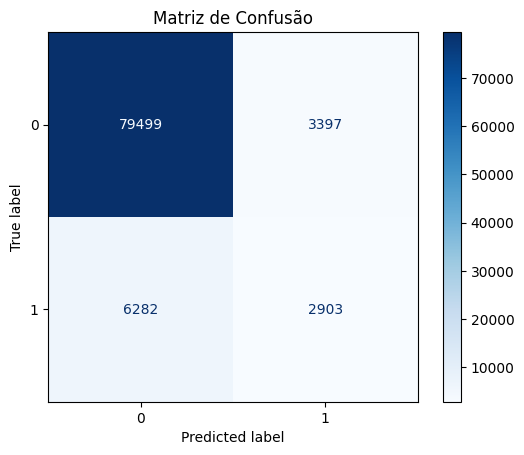

In [162]:
final_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss'
    ))
])

print("Pipeline final com SMOTE criado com sucesso!")


# --- PASSO 3: TREINAMENTO E AVALIAÇÃO DO MODELO FINAL ---
print("\n[PASSO 2/3] Treinando o modelo final...")

final_pipeline.fit(X_train, y_train)
print("Modelo final treinado com sucesso!")

print("\n[PASSO 3/3] Avaliando o modelo nos dados de validação...")
y_pred = final_pipeline.predict(X_val)
y_pred_proba = final_pipeline.predict_proba(X_val)[:, 1]
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print("\n--- Métricas de Performance (Validação) ---")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\n--- Matriz de Confusão (Validação) ---")
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

In [163]:
random_search_f1 = RandomizedSearchCV(
    estimator=full_pipeline,
    param_distributions=param_dist,
    n_iter=10,
    cv=skf,
    scoring='f1',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_f1.fit(X_train, y_train)

print("\nBusca de hiperparâmetros para F1-Score concluída!")
print(f"Melhores parâmetros encontrados: {random_search_f1.best_params_}")
print(f"Melhor F1 score: {random_search_f1.best_score_:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Busca de hiperparâmetros para F1-Score concluída!
Melhores parâmetros encontrados: {'classifier__subsample': 1.0, 'classifier__scale_pos_weight': 1, 'classifier__reg_lambda': 1, 'classifier__reg_alpha': 0, 'classifier__n_estimators': 100, 'classifier__min_child_weight': 1, 'classifier__max_depth': 11, 'classifier__learning_rate': 0.05, 'classifier__gamma': 0.1, 'classifier__colsample_bytree': 0.8}
Melhor F1 score: 0.3534


In [164]:
scoring_metrics = {
    'f1_score': 'f1',
    'precision_score': 'precision',
    'recall_score': 'recall'
}

random_search = RandomizedSearchCV(
    estimator=full_pipeline,
    param_distributions=param_dist,
    n_iter=5,
    cv=skf,
    scoring=scoring_metrics,
    refit='f1_score',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("\nBusca de hiperparâmetros com múltiplas métricas concluída!")
print(f"Melhores parâmetros encontrados (otimizado para F1): {random_search.best_params_}")
print("Melhores scores de validação cruzada:")
print(random_search.cv_results_['mean_test_f1_score'].max())
print(random_search.cv_results_['mean_test_precision_score'].max())
print(random_search.cv_results_['mean_test_recall_score'].max())

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Busca de hiperparâmetros com múltiplas métricas concluída!
Melhores parâmetros encontrados (otimizado para F1): {'classifier__subsample': 0.8, 'classifier__scale_pos_weight': 1, 'classifier__reg_lambda': 1.5, 'classifier__reg_alpha': 0.1, 'classifier__n_estimators': 500, 'classifier__min_child_weight': 5, 'classifier__max_depth': 11, 'classifier__learning_rate': 0.01, 'classifier__gamma': 0.1, 'classifier__colsample_bytree': 0.8}
Melhores scores de validação cruzada:
0.35242748843508964
0.5043354664657217
0.5993636916210793



[PASSO 0/4] Preparando os conjuntos de dados finais para treino e teste...
Tamanho do conjunto de treino final (X): (540556, 19)
Tamanho do conjunto de teste final (X): (92081, 19)

[PASSO 1/4] Treinando o modelo final com os melhores parâmetros em TODOS os dados (treino + validação)...
Modelo final treinado com sucesso!

[PASSO 2/4] Avaliando a performance do modelo nos dados de teste...

[PASSO 3/4] --- Métricas de Performance (Teste Final) ---
Acurácia: 0.8561
Precisão: 0.3705
Recall: 0.6333
F1-Score: 0.4675
ROC AUC Score: 0.8903

[PASSO 4/4] Plotando a Matriz de Confusão do Teste Final...


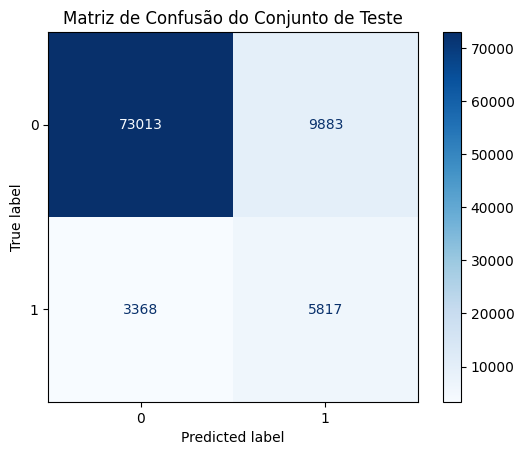


--- FIM DO PROJETO ---


In [165]:
# ==============================================================================
# AJUSTE: PREPARAÇÃO DOS DADOS FINAIS
# ==============================================================================
print("\n[PASSO 0/4] Preparando os conjuntos de dados finais para treino e teste...")

# A melhor prática é treinar o modelo final com todos os dados disponíveis (treino + validação)
# Vamos concatenar os DataFrames X e as Series y
X_treino_final = pd.concat([X_train, X_val], ignore_index=True)
y_treino_final = pd.concat([y_train, y_val], ignore_index=True)

# O conjunto de teste já está pronto, vamos apenas renomear para clareza
X_teste_final = X_val
y_teste_final = y_val

print(f"Tamanho do conjunto de treino final (X): {X_treino_final.shape}")
print(f"Tamanho do conjunto de teste final (X): {X_teste_final.shape}")

best_params = {
    'classifier__subsample': 1.0,
    'classifier__scale_pos_weight': 1,
    'classifier__reg_lambda': 2,
    'classifier__reg_alpha': 1,
    'classifier__n_estimators': 200,
    'classifier__min_child_weight': 3,
    'classifier__max_depth': 7,
    'classifier__learning_rate': 0.05,
    'classifier__gamma': 0,
    'classifier__colsample_bytree': 0.8
}


final_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb.XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        **{k.replace('classifier__', ''): v for k, v in best_params.items()}
    ))
])

print("\n[PASSO 1/4] Treinando o modelo final com os melhores parâmetros em TODOS os dados (treino + validação)...")
# TREINAR COM OS DADOS COMBINADOS
final_pipeline.fit(X_treino_final, y_treino_final)
print("Modelo final treinado com sucesso!")

print("\n[PASSO 2/4] Avaliando a performance do modelo nos dados de teste...")
# AVALIAR NO CONJUNTO DE TESTE QUE NUNCA FOI USADO PARA TREINO
y_pred_test = final_pipeline.predict(X_teste_final)
y_pred_proba_test = final_pipeline.predict_proba(X_teste_final)[:, 1]

accuracy_test = accuracy_score(y_teste_final, y_pred_test)
precision_test = precision_score(y_teste_final, y_pred_test, zero_division=0)
recall_test = recall_score(y_teste_final, y_pred_test, zero_division=0)
f1_test = f1_score(y_teste_final, y_pred_test, zero_division=0)
roc_auc_test = roc_auc_score(y_teste_final, y_pred_proba_test)

print("\n[PASSO 3/4] --- Métricas de Performance (Teste Final) ---")
print(f"Acurácia: {accuracy_test:.4f}")
print(f"Precisão: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"ROC AUC Score: {roc_auc_test:.4f}")

print("\n[PASSO 4/4] Plotando a Matriz de Confusão do Teste Final...")
cm_test = confusion_matrix(y_teste_final, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão do Conjunto de Teste")
plt.show()

print("\n--- FIM DO PROJETO ---")

In [171]:
df_completo.nunique()

data_compra                    3765
time_purchase                 83914
gmv_success                   82363
quantidade_tickets               12
origem_ida                     2550
destino_ida                    2898
origem_volta                   1858
destino_volta                  1409
empresa_ida                     298
empresa_volta                   275
id_cliente                   575385
periodo_covid                     3
split                             3
faixa_tickets                     4
ano                              12
mes                              12
dia                              31
dia_semana                        7
fim_de_semana                     2
e_feriado                         2
data_feriado                      2
compra_ate_5_dias_feriado         2
tipo_dia                          3
hora_compra                      24
periodo_compra                    4
trecho_ida                    33909
trecho_volta_valido           10976
popularidade_trecho             939
sazonalidade_score              658
combinacao_empresa             2304
mesmo_trecho_ida_volta            1
mesma_empresa_ida_volta           2
compras_anteriores             1271
valor_acumulado              423210
experiencia_empresa             486
diversidade_destinos             64
diversidade_empresas             53
total_compras                   233
score_fidelidade               1284
cliente_recorrente                2
periodo_covid_int                 3
tipo_dia_int                      3
periodo_compra_int                4
faixa_tickets_int                 4
segmento                          4
gmv_success_sum              160521
total_compras_sum               233
ticket_medio_cliente         240275
proporcao_feriado               234
dtype: int64

# Previsão de trechos

## Modelo nicial

In [172]:
# ==============================================================================
# PASSO 1: REDUÇÃO DE CARDINALIDADE DAS FEATURES
# ==============================================================================
print("PASSO 1/5] Reduzindo cardinalidade das features...")

# As colunas a serem tratadas
colunas_categoricas_para_tratar = ['origem_ida', 'destino_ida', 'empresa_ida']

limites_ideais = {}
meta_cobertura = 0.97

for coluna in colunas_categoricas_para_tratar:
    frequencias = df_train_final[coluna].value_counts()
    percentual_cumulativo = frequencias.cumsum() / frequencias.sum()
    categorias_necessarias = (percentual_cumulativo < meta_cobertura).sum() + 1
    limite_sugerido = frequencias.iloc[categorias_necessarias - 1] if categorias_necessarias <= len(frequencias) else frequencias.iloc[-1]
    limites_ideais[coluna] = limite_sugerido

print("Dicionário de limites de frequência aprendido do treino:", limites_ideais)

def reduzir_cardinalidade_com_dicionario(df_original, limites_por_coluna):
    df_filtrado = df_original.copy()
    for coluna, limite in limites_por_coluna.items():
        frequencias = df_filtrado[coluna].value_counts()
        categorias_raras = frequencias[frequencias < limite].index
        novo_nome_coluna = f'{coluna}_agrupada'
        df_filtrado[novo_nome_coluna] = df_filtrado[coluna].replace(categorias_raras, 'OUTROS')
    return df_filtrado

df_train_final_tratado = reduzir_cardinalidade_com_dicionario(df_train_final, limites_ideais)
df_val_tratado = reduzir_cardinalidade_com_dicionario(df_val, limites_ideais)
df_test_tratado = reduzir_cardinalidade_com_dicionario(df_test, limites_ideais)

PASSO 1/5] Reduzindo cardinalidade das features...
Dicionário de limites de frequência aprendido do treino: {'origem_ida': np.int64(90), 'destino_ida': np.int64(74), 'empresa_ida': np.int64(873)}


In [173]:
# ==============================================================================
# PASSO 2: CRIAÇÃO DO ALVO E CONJUNTOS MULTI-CLASSE
# ==============================================================================
print("\n[PASSO 2/5] Criando o alvo e conjuntos multi-classe...")

features_para_modelagem = [
    'gmv_success', 'total_compras', 'quantidade_tickets', 'faixa_tickets_int',
    'periodo_compra_int', 'compras_anteriores', 'valor_acumulado',
    'cliente_recorrente', 'score_fidelidade', 'sazonalidade_score',
    'diversidade_destinos', 'diversidade_empresas', 'compra_ate_5_dias_feriado',
    'periodo_covid_int', 'tipo_dia_int', 'segmento',
    'origem_ida_agrupada', 'destino_ida_agrupada', 'empresa_ida_agrupada'
]

def criar_conjuntos_multiclasse(df_historico, df_futuro, features_list):
    df_futuro['trecho_ida'] = df_futuro['origem_ida_agrupada'].astype(str) + '-' + df_futuro['destino_ida_agrupada'].astype(str)

    # 1. Pegar o ÚLTIMO estado conhecido de CADA cliente no histórico
    X_base = df_historico.sort_values('data_compra').groupby('id_cliente').tail(1)

    # 2. Pegar a PRIMEIRA compra de CADA cliente no futuro
    y_base = df_futuro.sort_values('data_compra').groupby('id_cliente').first()[['trecho_ida']]
    y_base.rename(columns={'trecho_ida': 'proximo_trecho'}, inplace=True)

    # 3. Juntar X e y pelo id_cliente
    dados_modelo = pd.merge(X_base, y_base, on='id_cliente', how='inner')

    # 4. Separar X_final e y_final
    features_reais = [f for f in features_list if f in dados_modelo.columns]
    X_final = dados_modelo[features_reais]
    y_final = dados_modelo['proximo_trecho']

    return X_final, y_final

X_train, y_train = criar_conjuntos_multiclasse(df_train_final_tratado, df_val_tratado, features_para_modelagem)
X_val, y_val = criar_conjuntos_multiclasse(df_val_tratado, df_test_tratado, features_para_modelagem)


[PASSO 2/5] Criando o alvo e conjuntos multi-classe...


In [174]:
# ==============================================================================
# PASSOS 3: TRATAMENTO DA ALTA CARDINALIDADE DO ALVO
# ==============================================================================

print("\n[PASSO 3/5] Tratando a alta cardinalidade da variável alvo...")
top_trechos = y_train.value_counts().nlargest(50).index
y_train = y_train.apply(lambda x: x if x in top_trechos else 'Outro')
y_val = y_val.apply(lambda x: x if x in top_trechos else 'Outro')
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = y_val.apply(lambda x: x if x in le.classes_ else 'Outro')
y_val_encoded = le.transform(y_val_encoded)


[PASSO 3/5] Tratando a alta cardinalidade da variável alvo...


In [175]:
import lightgbm as lgb

# --- PASSO 4: DEFINIÇÃO DO PIPELINE E MODELAGEM COM LIGHTGBM ---
print("\n[PASSO 4/5] Definindo o pipeline de pré-processamento e o modelo LightGBM...")
features_numericas = X_train.select_dtypes(include=np.number).columns.tolist()
features_categoricas = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
if 'id_cliente' in features_categoricas:
    features_categoricas.remove('id_cliente')
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, features_numericas), ('cat', categorical_transformer, features_categoricas)], remainder='drop')
full_pipeline_lgbm = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', lgb.LGBMClassifier(random_state=42, class_weight='balanced'))])
print("Pipeline definido com sucesso.")

# --- PASSO 5: TREINAMENTO E AVALIAÇÃO DO MODELO ---
print("\n[PASSO 5/5] Treinando e avaliando o modelo LightGBM...")
full_pipeline_lgbm.fit(X_train, y_train_encoded)
y_pred = full_pipeline_lgbm.predict(X_val)
accuracy = accuracy_score(y_val_encoded, y_pred)
f1_weighted = f1_score(y_val_encoded, y_pred, average='weighted')
print("\n--- Métricas de Performance (Validação) ---")
print(f"Acurácia: {accuracy:.4f}")
print(f"F1-Score (Ponderado): {f1_weighted:.4f}")


[PASSO 4/5] Definindo o pipeline de pré-processamento e o modelo LightGBM...
Pipeline definido com sucesso.

[PASSO 5/5] Treinando e avaliando o modelo LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2462
[LightGBM] [Info] Number of data points in the train set: 45556, number of used features: 657
[LightGBM] [Info] Start training from score -3.931826
[LightGBM] [Info] Start training from score -3.931826
[LightGBM] [Info] Start training from score -3.931826
[LightGBM] [Info] Start training from score -3.931826
[LightGBM] [Info] Start training from score -3.931826
[LightGBM] [Info] Start training from score -3.931826
[LightGBM] [Info] Start training from score -3.931826
[LightGBM] [Info] Start training from score -3.931826
[LightGBM] [Info] Start training from score -3.93

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names




--- Métricas de Performance (Validação) ---
Acurácia: 0.4128
F1-Score (Ponderado): 0.4941


In [176]:
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, f1_score,
                             roc_auc_score, classification_report, ConfusionMatrixDisplay)

print("\n[AVALIAÇÃO COMPLETA] Realizando análise aprofundada do modelo geral...")

# --- CÁLCULO DAS MÉTRICAS GERAIS ---
print("\n--- Métricas de Performance Gerais (Validação) ---")

# 1. Acurácia e Acurácia Balanceada
# A Acurácia Balanceada é ótima para ter uma ideia da performance média entre as classes
accuracy = accuracy_score(y_val_encoded, y_pred)
balanced_acc = balanced_accuracy_score(y_val_encoded, y_pred)
print(f"Acurácia: {accuracy:.4f}")
print(f"Acurácia Balanceada: {balanced_acc:.4f}")

# 2. F1-Scores (Ponderado, Micro e Macro)
f1_weighted = f1_score(y_val_encoded, y_pred, average='weighted')
f1_micro = f1_score(y_val_encoded, y_pred, average='micro')
f1_macro = f1_score(y_val_encoded, y_pred, average='macro', zero_division=0)
print(f"F1-Score (Ponderado): {f1_weighted:.4f}")
print(f"F1-Score (Micro Avg): {f1_micro:.4f}")
print(f"F1-Score (Macro Avg): {f1_macro:.4f}")

# 3. ROC AUC Score
# Gera as probabilidades para o cálculo
y_pred_proba_all = full_pipeline_lgbm.predict_proba(X_val)
labels_para_auc = range(y_pred_proba_all.shape[1])
roc_auc = roc_auc_score(y_val_encoded, y_pred_proba_all, multi_class='ovr', average='weighted', labels=labels_para_auc)
print(f"ROC AUC Score (Ponderado): {roc_auc:.4f}")


[AVALIAÇÃO COMPLETA] Realizando análise aprofundada do modelo geral...

--- Métricas de Performance Gerais (Validação) ---
Acurácia: 0.4128
Acurácia Balanceada: 0.3583
F1-Score (Ponderado): 0.4941
F1-Score (Micro Avg): 0.4128
F1-Score (Macro Avg): 0.2181


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



ROC AUC Score (Ponderado): 0.8172



--- Relatório de Classificação Detalhado (por trecho) ---
                      precision    recall  f1-score   support

  Cidade_0-Cidade_15       0.18      0.30      0.23       123
  Cidade_0-Cidade_17       0.16      0.21      0.18       182
 Cidade_0-Cidade_178       0.42      0.65      0.51       119
   Cidade_0-Cidade_2       0.19      0.35      0.25       868
 Cidade_0-Cidade_290       0.31      0.37      0.34       175
   Cidade_0-Cidade_3       0.16      0.33      0.22       254
  Cidade_0-Cidade_31       0.08      0.19      0.11        75
   Cidade_0-Cidade_5       0.19      0.29      0.23       483
  Cidade_0-Cidade_80       0.13      0.28      0.18        83
     Cidade_0-OUTROS       0.11      0.36      0.17       308
Cidade_106-Cidade_28       0.18      0.44      0.25       212
  Cidade_15-Cidade_0       0.12      0.18      0.14       101
  Cidade_17-Cidade_0       0.15      0.27      0.19       132
  Cidade_17-Cidade_2       0.08      0.18      0.11       104
    Cidade

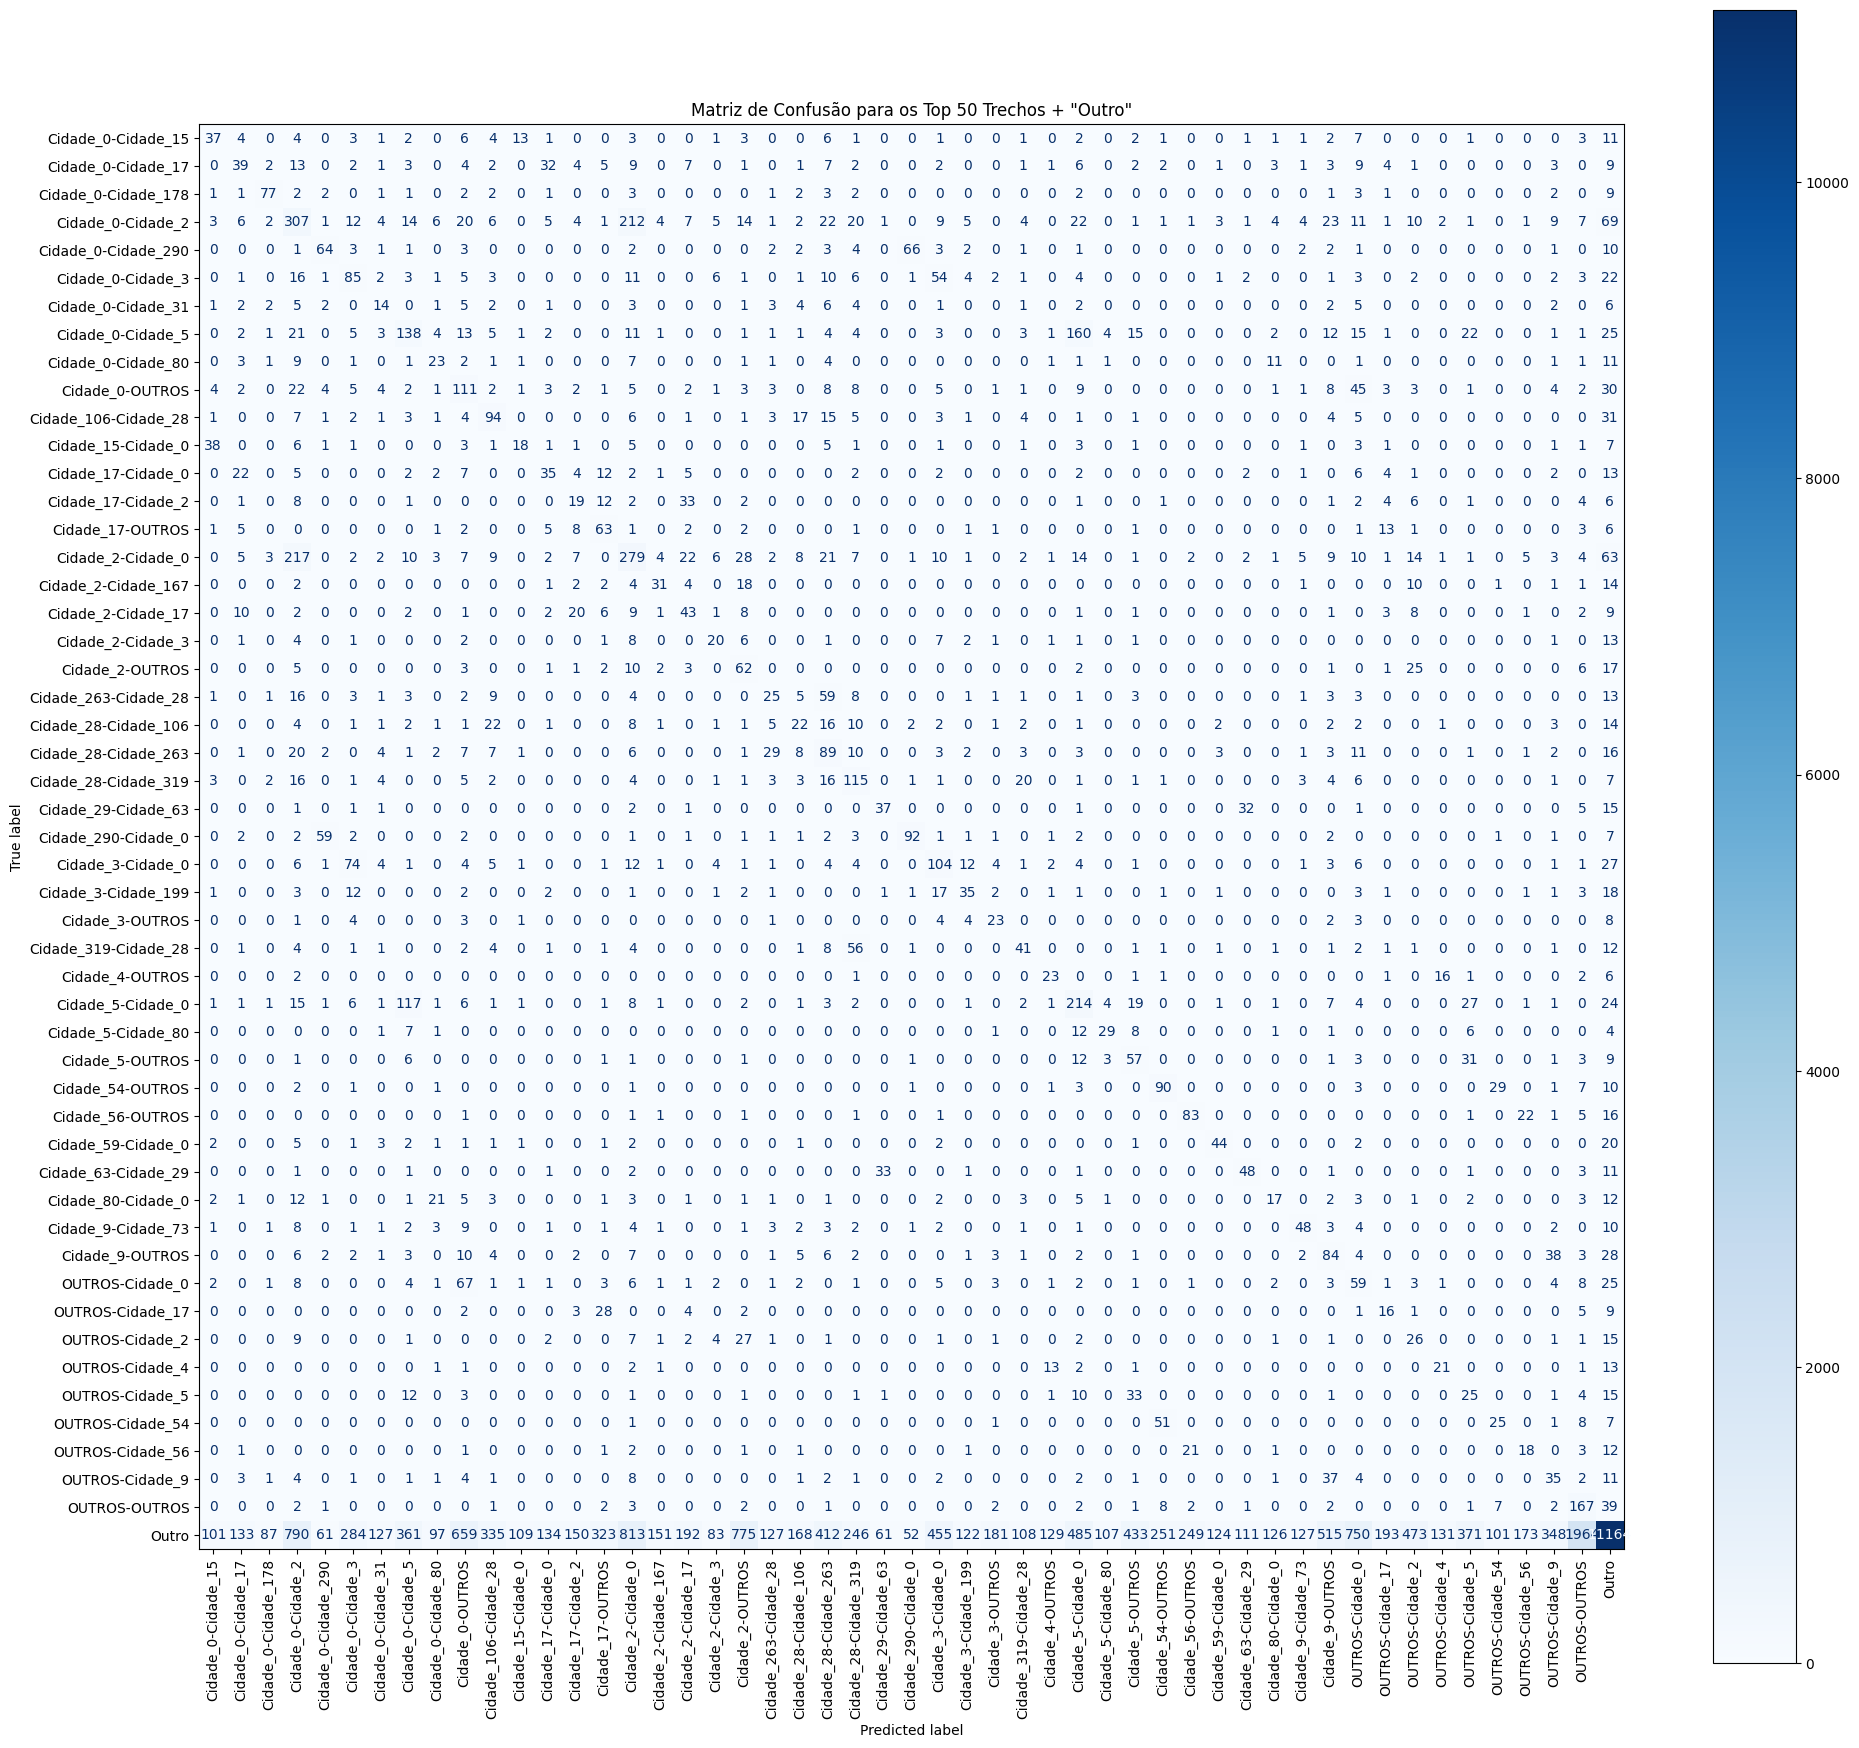

In [177]:
# 4. Relatório de Classificação Completo
# Mostra a performance para cada um dos 51 trechos
known_labels = le.transform(le.classes_)
known_target_names = le.classes_
print("\n--- Relatório de Classificação Detalhado (por trecho) ---")
print(classification_report(y_val_encoded, y_pred, labels=known_labels, target_names=known_target_names, zero_division=0))


# 5. Matriz de Confusão
print("\n--- Matriz de Confusão (Top 50 + Outro) ---")
# A matriz completa com 51x51 classes será muito densa para ler,
# mas é útil para ter uma visão geral dos padrões de erro.
fig, ax = plt.subplots(figsize=(20, 18))
ConfusionMatrixDisplay.from_predictions(y_val_encoded, y_pred, ax=ax,
                                        labels=known_labels,
                                        display_labels=known_target_names,
                                        cmap=plt.cm.Blues,
                                        xticks_rotation='vertical',
                                        values_format='d')
plt.title('Matriz de Confusão para os Top 50 Trechos + "Outro"')
plt.tight_layout()
plt.show()


## Nova rodada de testes

In [178]:
print("="*60)
print("  Iniciando Análise Exploratória e de Cardinalidade")
print("="*60)

print("\n--- Visão Geral do DataFrame de Treino (X_train) ---\n")

print("\n[1] Informações Gerais (Tipos de Dados e Contagem de Nulos):")
X_train.info()

print("\n\n[2] Estatísticas Descritivas para Features Numéricas:")
# O .describe().T transpõe a saída, tornando-a mais fácil de ler.
print(X_train.describe().T)


# --- PARTE 2: ANÁLISE DE CARDINALIDADE ---

print("\n\n--- Análise de Cardinalidade das Features Categóricas ---\n")

colunas_originais = ['origem_ida', 'destino_ida', 'empresa_ida', 'segmento']

print("\n[1] Cardinalidade ANTES do agrupamento (usando df_train_final):")
for coluna in colunas_originais:
    if coluna in df_train_final.columns:
        cardinalidade = df_train_final[coluna].nunique()
        print(f"- Coluna '{coluna}': {cardinalidade} valores únicos")

features_categoricas_modelo = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print("\n\n[2] Cardinalidade DEPOIS do agrupamento (features no X_train):")
for coluna in features_categoricas_modelo:
    cardinalidade = X_train[coluna].nunique()
    print(f"- Coluna '{coluna}': {cardinalidade} valores únicos")

    # mostrar os 5 valores mais frequentes para ter uma ideia da distribuição
    if cardinalidade > 1:
        print("  Top 5 mais frequentes:")
        print(X_train[coluna].value_counts(normalize=True).head().to_string())
        print("-" * 30)

print("\n--- Fim da Análise ---")


  Iniciando Análise Exploratória e de Cardinalidade

--- Visão Geral do DataFrame de Treino (X_train) ---


[1] Informações Gerais (Tipos de Dados e Contagem de Nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45556 entries, 0 to 45555
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gmv_success                45556 non-null  float64
 1   total_compras              45556 non-null  int64  
 2   quantidade_tickets         45556 non-null  int64  
 3   faixa_tickets_int          45556 non-null  int64  
 4   periodo_compra_int         45556 non-null  int8   
 5   compras_anteriores         45556 non-null  int64  
 6   valor_acumulado            45556 non-null  float64
 7   cliente_recorrente         45556 non-null  int64  
 8   score_fidelidade           45556 non-null  float64
 9   sazonalidade_score         45556 non-null  int64  
 10  diversidade_destinos       45556 non-null  in

In [179]:
# ==============================================================================
# NOVA ESTRATÉGIA: MODELAGEM FOCADA NOS TOP 10 TRECHOS MAIS POPULARES
# ==============================================================================
# Este script assume que X_train, y_train, X_val e y_val já foram criados.
# ==============================================================================

# --- PASSO 1 (NOVO): FILTRAR DADOS PARA OS TOP 10 TRECHOS ---
print("\n[PASSO 1/3] Identificando e filtrando para os 10 trechos mais populares...")

# 1.1 Identificar os 10 trechos mais populares APENAS no conjunto de treino
top_10_trechos = y_train.value_counts().nlargest(10).index
print("\nTop 10 trechos selecionados para o modelo:")
print(top_10_trechos.tolist())

# 1.2 Filtrar y_train e y_val para conter apenas esses trechos
y_train_top10 = y_train[y_train.isin(top_10_trechos)]
y_val_top10 = y_val[y_val.isin(top_10_trechos)]

# 1.3 Filtrar X_train e X_val para manter a consistência com y
X_train_top10 = X_train.loc[y_train_top10.index]
X_val_top10 = X_val.loc[y_val_top10.index]

print(f"\nDados de treino reduzidos para {len(X_train_top10)} amostras.")
print(f"Dados de validação reduzidos para {len(X_val_top10)} amostras.")

# 1.4 Criar um novo LabelEncoder e re-encodar o alvo (agora com apenas 10 classes)
le_top10 = LabelEncoder()
y_train_encoded = le_top10.fit_transform(y_train_top10)
y_val_encoded = le_top10.transform(y_val_top10)


# --- PASSO 2: REUTILIZAR O PIPELINE DE MODELAGEM ---
print("\n[PASSO 2/3] Reutilizando o pipeline de pré-processamento e o modelo LightGBM...")



[PASSO 1/3] Identificando e filtrando para os 10 trechos mais populares...

Top 10 trechos selecionados para o modelo:
['Outro', 'Cidade_0-Cidade_2', 'Cidade_2-Cidade_0', 'OUTROS-OUTROS', 'Cidade_0-OUTROS', 'Cidade_0-Cidade_5', 'Cidade_5-Cidade_0', 'OUTROS-Cidade_0', 'Cidade_9-OUTROS', 'Cidade_28-Cidade_263']

Dados de treino reduzidos para 37664 amostras.
Dados de validação reduzidos para 29876 amostras.

[PASSO 2/3] Reutilizando o pipeline de pré-processamento e o modelo LightGBM...



[PASSO 3/3] Treinando e avaliando o modelo nos Top 10 trechos...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2354
[LightGBM] [Info] Number of data points in the train set: 37664, number of used features: 605
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names




--- Métricas de Performance (Validação - Top 10 Trechos) ---
Acurácia: 0.5832
ROC AUC Score (Ponderado): 0.8622
F1-Score (Micro Avg): 0.5832
F1-Score (Macro Avg): 0.2558

--- Relatório de Classificação Detalhado (por trecho) ---
                      precision    recall  f1-score   support

   Cidade_0-Cidade_2       0.20      0.43      0.27       868
   Cidade_0-Cidade_5       0.20      0.31      0.24       483
     Cidade_0-OUTROS       0.09      0.37      0.15       308
   Cidade_2-Cidade_0       0.18      0.44      0.26       795
Cidade_28-Cidade_263       0.12      0.58      0.20       237
   Cidade_5-Cidade_0       0.19      0.58      0.29       477
     Cidade_9-OUTROS       0.13      0.58      0.21       218
     OUTROS-Cidade_0       0.05      0.28      0.08       222
       OUTROS-OUTROS       0.06      0.76      0.11       246
               Outro       0.97      0.60      0.74     26022

            accuracy                           0.58     29876
           macro avg    

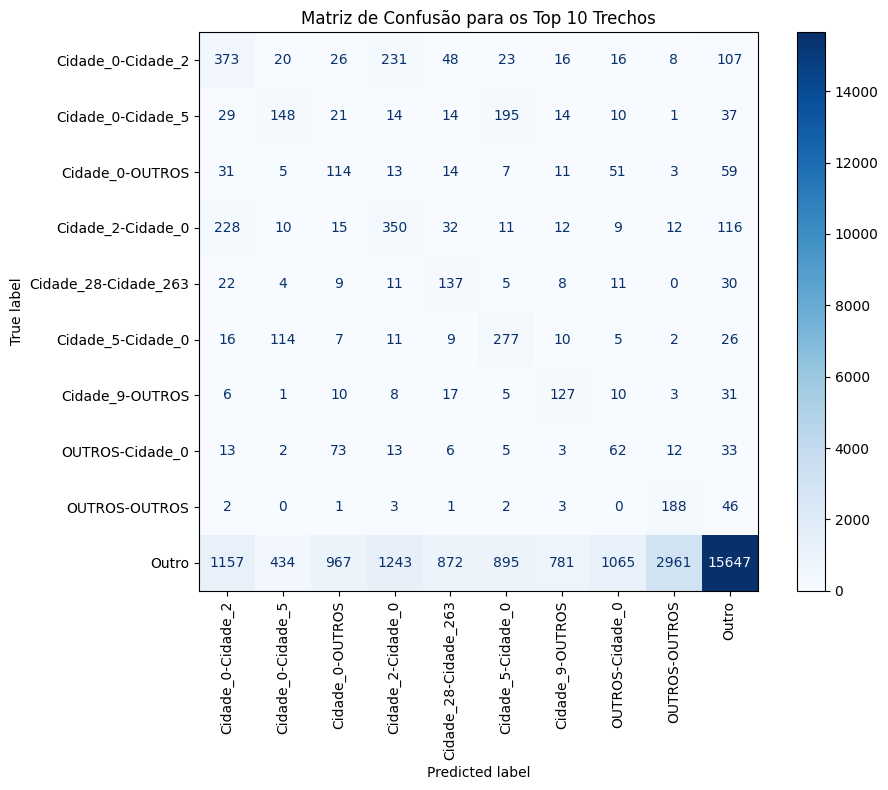

In [180]:
# --- PASSO 3: TREINAMENTO E AVALIAÇÃO DO MODELO FOCADO ---
print("\n[PASSO 3/3] Treinando e avaliando o modelo nos Top 10 trechos...")

# Treinar o pipeline com os novos dados, menores e mais focados
full_pipeline_lgbm.fit(X_train_top10, y_train_encoded)

# Fazer previsões no conjunto de validação focado
y_pred = full_pipeline_lgbm.predict(X_val_top10)
y_pred_proba = full_pipeline_lgbm.predict_proba(X_val_top10)

# --- AVALIAÇÃO COMPLETA ---
print("\n--- Métricas de Performance (Validação - Top 10 Trechos) ---")

# Acurácia
accuracy = accuracy_score(y_val_encoded, y_pred)
print(f"Acurácia: {accuracy:.4f}")

# ROC AUC Score
labels_para_auc = range(len(le_top10.classes_))
roc_auc = roc_auc_score(y_val_encoded, y_pred_proba, multi_class='ovr', average='weighted', labels=labels_para_auc)
print(f"ROC AUC Score (Ponderado): {roc_auc:.4f}")

# F1-Scores Micro e Macro
micro_avg_f1 = f1_score(y_val_encoded, y_pred, average='micro')
macro_avg_f1 = f1_score(y_val_encoded, y_pred, average='macro', zero_division=0)
print(f"F1-Score (Micro Avg): {micro_avg_f1:.4f}")
print(f"F1-Score (Macro Avg): {macro_avg_f1:.4f}")

# Relatório detalhado
print("\n--- Relatório de Classificação Detalhado (por trecho) ---")
print(classification_report(y_val_encoded, y_pred, target_names=le_top10.classes_))

# Matriz de Confusão
print("\n--- Matriz de Confusão (Top 10 Trechos) ---")
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_val_encoded, y_pred, ax=ax,
                                        display_labels=le_top10.classes_,
                                        cmap=plt.cm.Blues,
                                        xticks_rotation='vertical')
plt.title('Matriz de Confusão para os Top 10 Trechos')
plt.tight_layout()
plt.show()


## Tratamento para aumentar a performance do modelo

In [181]:
from sklearn.impute import SimpleImputer
# ==============================================================================
# NOVA ESTRATÉGIA: MODELAGEM FOCADA NOS TOP 10 TRECHOS MAIS POPULARES
# ==============================================================================
# Este script assume que X_train, y_train, X_val e y_val já foram criados.
# ==============================================================================

# --- PASSO 1 (NOVO): FILTRAR DADOS PARA OS TOP 10 TRECHOS ---
print("\n[PASSO 1/3] Identificando e filtrando para os 10 trechos mais populares...")

# 1.1 Identificar os 10 trechos mais populares APENAS no conjunto de treino
top_10_trechos = y_train.value_counts().nlargest(10).index
print("\nTop 10 trechos selecionados para o modelo:")
print(top_10_trechos.tolist())

# 1.2 Filtrar y_train e y_val para conter apenas esses trechos
y_train_top10 = y_train[y_train.isin(top_10_trechos)]
y_val_top10 = y_val[y_val.isin(top_10_trechos)]

# 1.3 Filtrar X_train e X_val para manter a consistência com y
X_train_top10 = X_train.loc[y_train_top10.index]
X_val_top10 = X_val.loc[y_val_top10.index]

print(f"\nDados de treino reduzidos para {len(X_train_top10)} amostras.")
print(f"Dados de validação reduzidos para {len(X_val_top10)} amostras.")

# 1.4 Criar um novo LabelEncoder e re-encodar o alvo (agora com apenas 10 classes)
le_top10 = LabelEncoder()
y_train_encoded = le_top10.fit_transform(y_train_top10)
y_val_encoded = le_top10.transform(y_val_top10)


[PASSO 1/3] Identificando e filtrando para os 10 trechos mais populares...

Top 10 trechos selecionados para o modelo:
['Outro', 'Cidade_0-Cidade_2', 'Cidade_2-Cidade_0', 'OUTROS-OUTROS', 'Cidade_0-OUTROS', 'Cidade_0-Cidade_5', 'Cidade_5-Cidade_0', 'OUTROS-Cidade_0', 'Cidade_9-OUTROS', 'Cidade_28-Cidade_263']

Dados de treino reduzidos para 37664 amostras.
Dados de validação reduzidos para 29876 amostras.


In [182]:
# --- PASSO 2: REUTILIZAR O PIPELINE DE MODELAGEM ---
# O pipeline que já criamos é perfeitamente reutilizável.
print("\n[PASSO 2/3] Reutilizando o pipeline de pré-processamento e o modelo LightGBM...")
# (Assumindo que a célula com a definição de 'full_pipeline_lgbm' já foi executada)


# --- PASSO 3 (NOVO): OTIMIZAÇÃO DE HIPERPARÂMETROS E AVALIAÇÃO FINAL ---
print("\n[PASSO 3/3] Iniciando a otimização de hiperparâmetros com RandomizedSearchCV...")

# 3.1 Definir o espaço de busca dos parâmetros para o LightGBM
# Usamos 'classifier__' como prefixo para indicar que o parâmetro é do classificador dentro do pipeline
param_dist = {
    'classifier__n_estimators': [100, 200, 300, 500],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__num_leaves': [20, 31, 40, 50],
    'classifier__max_depth': [-1, 5, 10, 15],
    'classifier__reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'classifier__reg_lambda': [0.0, 0.1, 0.5, 1.0],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'classifier__subsample': [0.7, 0.8, 0.9, 1.0]
}

# 3.2 Configurar a busca aleatória
# n_iter: número de combinações a serem testadas.
# cv: número de 'folds' na validação cruzada.
# scoring: métrica a ser otimizada (f1_macro é ótima para multiclasse desbalanceado).
# n_jobs=-1: usa todos os processadores disponíveis para acelerar a busca.
random_search = RandomizedSearchCV(
    full_pipeline_lgbm,
    param_distributions=param_dist,
    n_iter=5,
    cv=2,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# 3.3 Executar a busca para encontrar os melhores parâmetros
random_search.fit(X_train_top10, y_train_encoded)

# 3.4 Obter e imprimir os melhores resultados da busca
print("\nOtimização concluída!")
print("Melhor F1-Score (Macro) encontrado na validação cruzada: {:.4f}".format(random_search.best_score_))
print("Melhores parâmetros encontrados:")
print(random_search.best_params_)

# 3.5 Usar o MELHOR MODELO encontrado para fazer as previsões finais
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_val_top10)
y_pred_proba = best_model.predict_proba(X_val_top10)


[PASSO 2/3] Reutilizando o pipeline de pré-processamento e o modelo LightGBM...

[PASSO 3/3] Iniciando a otimização de hiperparâmetros com RandomizedSearchCV...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2354
[LightGBM] [Info] Number of data points in the train set: 37664, number of used features: 605
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names




--- Métricas de Performance do Modelo Otimizado (Validação - Top 10 Trechos) ---
Acurácia: 0.7842
ROC AUC Score (Ponderado): 0.8571
F1-Score (Micro Avg): 0.7842
F1-Score (Macro Avg): 0.3427

--- Relatório de Classificação Detalhado (por trecho) ---
                      precision    recall  f1-score   support

   Cidade_0-Cidade_2       0.24      0.38      0.30       868
   Cidade_0-Cidade_5       0.31      0.29      0.30       483
     Cidade_0-OUTROS       0.19      0.35      0.25       308
   Cidade_2-Cidade_0       0.25      0.32      0.28       795
Cidade_28-Cidade_263       0.28      0.51      0.36       237
   Cidade_5-Cidade_0       0.30      0.45      0.36       477
     Cidade_9-OUTROS       0.28      0.46      0.35       218
     OUTROS-Cidade_0       0.10      0.21      0.14       222
       OUTROS-OUTROS       0.12      0.64      0.20       246
               Outro       0.94      0.84      0.89     26022

            accuracy                           0.78     29876
    

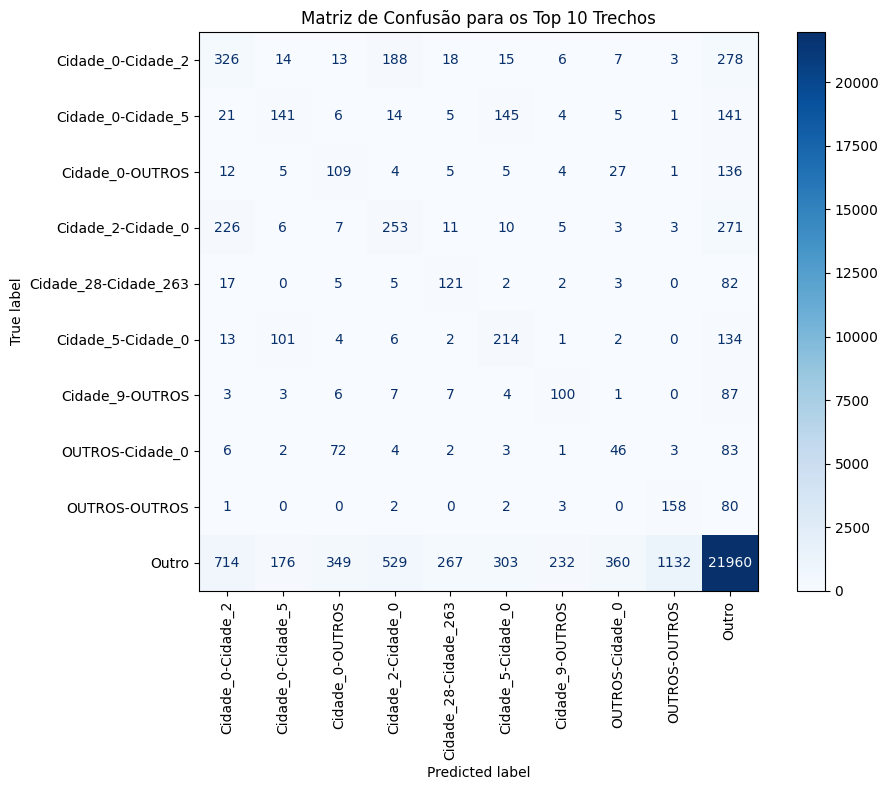

In [183]:
# --- AVALIAÇÃO COMPLETA DO MODELO OTIMIZADO ---
print("\n--- Métricas de Performance do Modelo Otimizado (Validação - Top 10 Trechos) ---")

# Acurácia
accuracy = accuracy_score(y_val_encoded, y_pred)
print(f"Acurácia: {accuracy:.4f}")

# ROC AUC Score
labels_para_auc = range(len(le_top10.classes_))
roc_auc = roc_auc_score(y_val_encoded, y_pred_proba, multi_class='ovr', average='weighted', labels=labels_para_auc)
print(f"ROC AUC Score (Ponderado): {roc_auc:.4f}")

# F1-Scores Micro e Macro
micro_avg_f1 = f1_score(y_val_encoded, y_pred, average='micro')
macro_avg_f1 = f1_score(y_val_encoded, y_pred, average='macro', zero_division=0)
print(f"F1-Score (Micro Avg): {micro_avg_f1:.4f}")
print(f"F1-Score (Macro Avg): {macro_avg_f1:.4f}")

# Relatório detalhado
print("\n--- Relatório de Classificação Detalhado (por trecho) ---")
print(classification_report(y_val_encoded, y_pred, target_names=le_top10.classes_))

# Matriz de Confusão
print("\n--- Matriz de Confusão (Top 10 Trechos) ---")
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_val_encoded, y_pred, ax=ax,
                                        display_labels=le_top10.classes_,
                                        cmap=plt.cm.Blues,
                                        xticks_rotation='vertical')
plt.title('Matriz de Confusão para os Top 10 Trechos')
plt.tight_layout()
plt.show()

## Realocação dos conjuntos de dados


[PASSO 1/4] Analisando a distribuição dos Top 10 trechos...


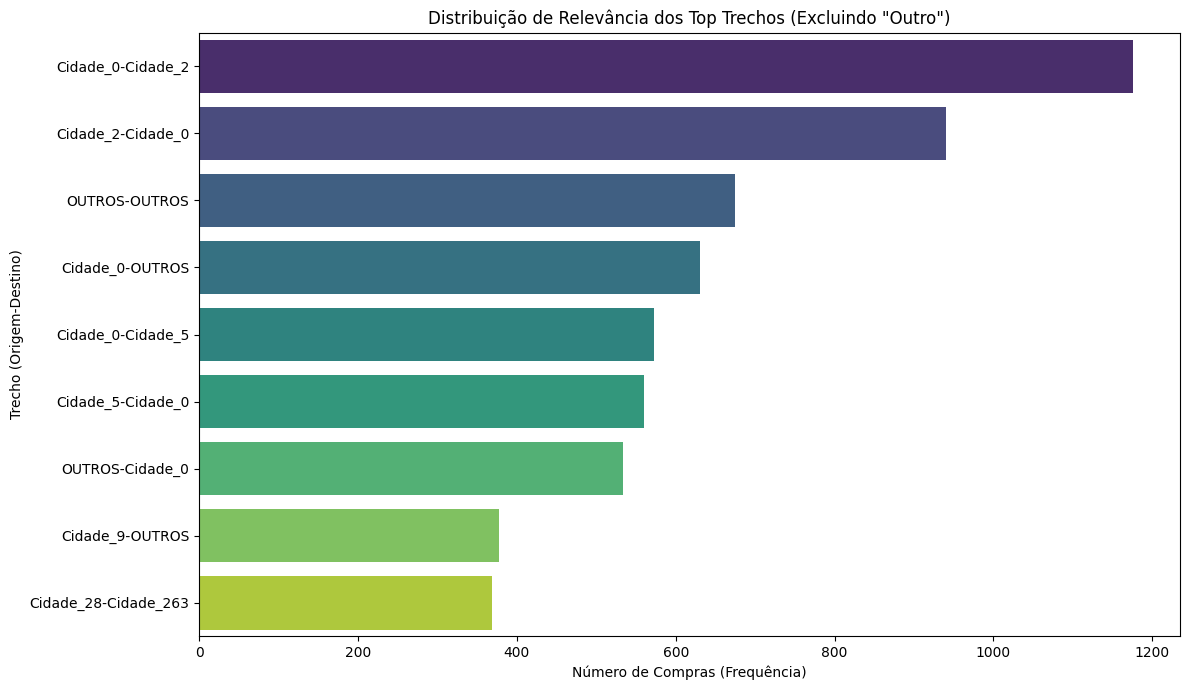

In [184]:
# ==============================================================================
# NOVA ESTRATÉGIA: ANÁLISE PROFUNDA E MODELAGEM FINAL NOS TOP 10 TRECHOS
# ==============================================================================
# Este script assume que X_train, y_train, X_val e y_val já foram criados.
# ==============================================================================

# --- PASSO 1: ANÁLISE E VISUALIZAÇÃO DOS DADOS FOCADOS ---
print("\n[PASSO 1/4] Analisando a distribuição dos Top 10 trechos...")

# 1.1 Identificar os 10 trechos mais populares APENAS no conjunto de treino
top_10_trechos = y_train.value_counts().nlargest(10).index

# 1.2 Filtrar y_train para conter apenas esses trechos (para a visualização)
y_train_top10 = y_train[y_train.isin(top_10_trechos)]

# 1.3 --- NOVA VISUALIZAÇÃO SEM A CATEGORIA 'OUTRO' ---
df_contagem = y_train_top10.value_counts().reset_index()
df_contagem.columns = ['Trecho', 'Contagem']

# Filtrar para remover a linha onde o trecho é 'Outro'
df_contagem_sem_outro = df_contagem[df_contagem['Trecho'] != 'Outro']

# Visualizar a relevância dos trechos nomeados
plt.figure(figsize=(12, 7))
sns.barplot(data=df_contagem_sem_outro, x='Contagem', y='Trecho', palette='viridis', hue='Trecho', legend=False)
plt.title('Distribuição de Relevância dos Top Trechos (Excluindo "Outro")')
plt.xlabel('Número de Compras (Frequência)')
plt.ylabel('Trecho (Origem-Destino)')
plt.tight_layout()
plt.show()



[PASSO 1/4] Analisando a distribuição dos Top 10 trechos...


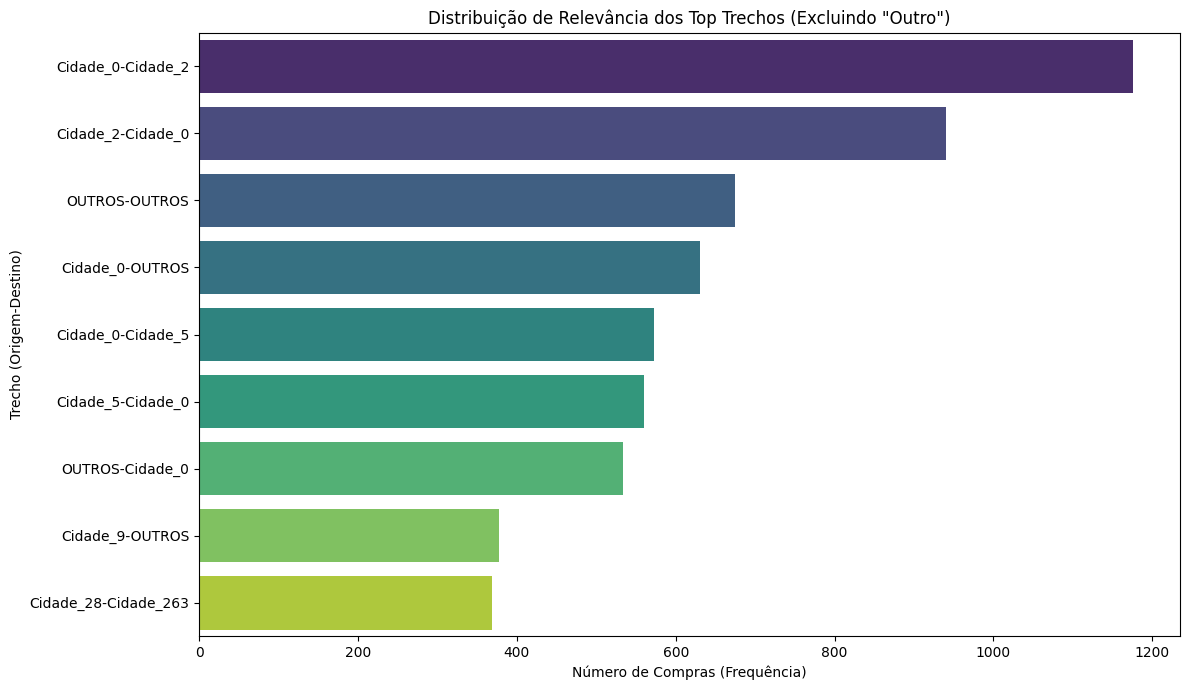


[PASSO 2/4] Combinando dados de treino e validação para maximizar o aprendizado...
Tamanho do novo conjunto de treino unificado: 67540 amostras.
Tamanho do conjunto de teste final: 29876 amostras.

[PASSO 3/4] Iniciando a otimização de hiperparâmetros no dataset unificado...
Iniciando a busca de parâmetros (pode levar alguns minutos)...
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 33770, number of used features: 525
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from sco

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[CV] END classifier__learning_rate=0.01, classifier__max_depth=15, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1; total time=   3.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2279
[LightGBM] [Info] Number of data points in the train set: 33770, number of used features: 570
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[CV] END classifier__learning_rate=0.01, classifier__max_depth=15, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1; total time=   3.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 33770, number of used features: 525
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[CV] END classifier__learning_rate=0.1, classifier__max_depth=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1; total time=   4.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2279
[LightGBM] [Info] Number of data points in the train set: 33770, number of used features: 570
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[CV] END classifier__learning_rate=0.1, classifier__max_depth=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1; total time=   5.0s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 33770, number of used features: 525
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[CV] END classifier__learning_rate=0.05, classifier__max_depth=15, classifier__n_estimators=300, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1; total time=   9.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2279
[LightGBM] [Info] Number of data points in the train set: 33770, number of used features: 570
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[CV] END classifier__learning_rate=0.05, classifier__max_depth=15, classifier__n_estimators=300, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1; total time=   9.9s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 33770, number of used features: 525
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[CV] END classifier__learning_rate=0.01, classifier__max_depth=15, classifier__n_estimators=100, classifier__num_leaves=40, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1; total time=   3.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2279
[LightGBM] [Info] Number of data points in the train set: 33770, number of used features: 570
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[CV] END classifier__learning_rate=0.01, classifier__max_depth=15, classifier__n_estimators=100, classifier__num_leaves=40, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1; total time=   3.8s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2458
[LightGBM] [Info] Number of data points in the train set: 67540, number of used features: 655
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info

In [185]:
# ==============================================================================
# NOVA ESTRATÉGIA: ANÁLISE PROFUNDA E MODELAGEM FINAL NOS TOP 10 TRECHOS
# ==============================================================================
# Este script assume que X_train, y_train, X_val e y_val já foram criados.
# ==============================================================================

# --- PASSO 1: ANÁLISE E VISUALIZAÇÃO DOS DADOS FOCADOS ---
print("\n[PASSO 1/4] Analisando a distribuição dos Top 10 trechos...")

# 1.1 Identificar os 10 trechos mais populares APENAS no conjunto de treino
top_10_trechos = y_train.value_counts().nlargest(10).index

# 1.2 Filtrar y_train para conter apenas esses trechos (para a visualização)
y_train_top10 = y_train[y_train.isin(top_10_trechos)]

# 1.3 --- NOVA VISUALIZAÇÃO SEM A CATEGORIA 'OUTRO' ---
df_contagem = y_train_top10.value_counts().reset_index()
df_contagem.columns = ['Trecho', 'Contagem']

# Filtrar para remover a linha onde o trecho é 'Outro'
df_contagem_sem_outro = df_contagem[df_contagem['Trecho'] != 'Outro']

# Visualizar a relevância dos trechos nomeados
plt.figure(figsize=(12, 7))
sns.barplot(data=df_contagem_sem_outro, x='Contagem', y='Trecho', palette='viridis', hue='Trecho', legend=False)
plt.title('Distribuição de Relevância dos Top Trechos (Excluindo "Outro")')
plt.xlabel('Número de Compras (Frequência)')
plt.ylabel('Trecho (Origem-Destino)')
plt.tight_layout()
plt.show()

# --- PASSO 2: COMBINAR DADOS DE TREINO E VALIDAÇÃO ---
print("\n[PASSO 2/4] Combinando dados de treino e validação para maximizar o aprendizado...")

y_train_top10 = y_train[y_train.isin(top_10_trechos)]
X_train_top10 = X_train.loc[y_train_top10.index]

y_val_top10 = y_val[y_val.isin(top_10_trechos)]
X_val_top10 = X_val.loc[y_val_top10.index]

X_train_final = pd.concat([X_train_top10, X_val_top10], ignore_index=True)
y_train_final = pd.concat([y_train_top10, y_val_top10], ignore_index=True)

X_test_final = X_val_top10
y_test_final = y_val_top10

print(f"Tamanho do novo conjunto de treino unificado: {len(X_train_final)} amostras.")
print(f"Tamanho do conjunto de teste final: {len(X_test_final)} amostras.")

# 2.4 Re-encodar o alvo com base no novo conjunto de treino unificado
le_final = LabelEncoder()
y_train_final_encoded = le_final.fit_transform(y_train_final)
y_test_final_encoded = le_final.transform(y_test_final)


# --- PASSO 3: OTIMIZAÇÃO DE HIPERPARÂMETROS NO DATASET COMBINADO ---
print("\n[PASSO 3/4] Iniciando a otimização de hiperparâmetros no dataset unificado...")

param_dist = {
    'classifier__n_estimators': [100, 200, 300, 500],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__num_leaves': [20, 31, 40],
    'classifier__max_depth': [-1, 10, 15],
    'classifier__reg_alpha': [0.1, 0.5],
    'classifier__reg_lambda': [0.1, 0.5]
}

random_search = RandomizedSearchCV(
    full_pipeline_lgbm, param_distributions=param_dist, n_iter=4, cv=2,
    scoring='f1_macro', random_state=42,
    n_jobs=1,
    verbose=2
)

try:
    print("Iniciando a busca de parâmetros (pode levar alguns minutos)...")
    random_search.fit(X_train_final, y_train_final_encoded)
    print("\nOtimização concluída com sucesso!")
    print(f"Melhor F1-Score (Macro) encontrado na validação cruzada: {random_search.best_score_:.4f}")
    print("Melhores parâmetros encontrados:")
    print(random_search.best_params_)
except Exception as e:
    print("\nERRO: Ocorreu um erro durante a busca de parâmetros no RandomizedSearchCV.")
    print("Isso geralmente acontece se todas as combinações de parâmetros falharem na validação cruzada.")
    print(f"Erro original: {e}")

Iniciando a busca de parâmetros (pode levar alguns minutos)...
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 33770, number of used features: 525
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[CV] END classifier__learning_rate=0.01, classifier__max_depth=15, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1; total time=   3.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2279
[LightGBM] [Info] Number of data points in the train set: 33770, number of used features: 570
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[CV] END classifier__learning_rate=0.01, classifier__max_depth=15, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1; total time=   3.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 33770, number of used features: 525
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[CV] END classifier__learning_rate=0.1, classifier__max_depth=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1; total time=   4.6s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2279
[LightGBM] [Info] Number of data points in the train set: 33770, number of used features: 570
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[CV] END classifier__learning_rate=0.1, classifier__max_depth=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1; total time=   5.0s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 33770, number of used features: 525
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[CV] END classifier__learning_rate=0.05, classifier__max_depth=15, classifier__n_estimators=300, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1; total time=   9.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2279
[LightGBM] [Info] Number of data points in the train set: 33770, number of used features: 570
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[CV] END classifier__learning_rate=0.05, classifier__max_depth=15, classifier__n_estimators=300, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1; total time=   9.8s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 33770, number of used features: 525
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[CV] END classifier__learning_rate=0.01, classifier__max_depth=15, classifier__n_estimators=100, classifier__num_leaves=40, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1; total time=   3.7s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2279
[LightGBM] [Info] Number of data points in the train set: 33770, number of used features: 570
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[CV] END classifier__learning_rate=0.01, classifier__max_depth=15, classifier__n_estimators=100, classifier__num_leaves=40, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1; total time=   3.7s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2458
[LightGBM] [Info] Number of data points in the train set: 67540, number of used features: 655
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names




--- Métricas de Performance Finais (Conjunto de Teste) ---
Acurácia: 0.6770
ROC AUC Score (Ponderado): 0.9441

--- Relatório de Classificação Detalhado (por trecho) ---
                      precision    recall  f1-score   support

   Cidade_0-Cidade_2       0.35      0.83      0.50       868
   Cidade_0-Cidade_5       0.45      0.96      0.61       483
     Cidade_0-OUTROS       0.24      0.94      0.39       308
   Cidade_2-Cidade_0       0.34      0.90      0.49       795
Cidade_28-Cidade_263       0.21      1.00      0.35       237
   Cidade_5-Cidade_0       0.37      0.98      0.53       477
     Cidade_9-OUTROS       0.21      1.00      0.35       218
     OUTROS-Cidade_0       0.18      0.97      0.30       222
       OUTROS-OUTROS       0.11      1.00      0.20       246
               Outro       1.00      0.64      0.78     26022

            accuracy                           0.68     29876
           macro avg       0.35      0.92      0.45     29876
        weighted avg  

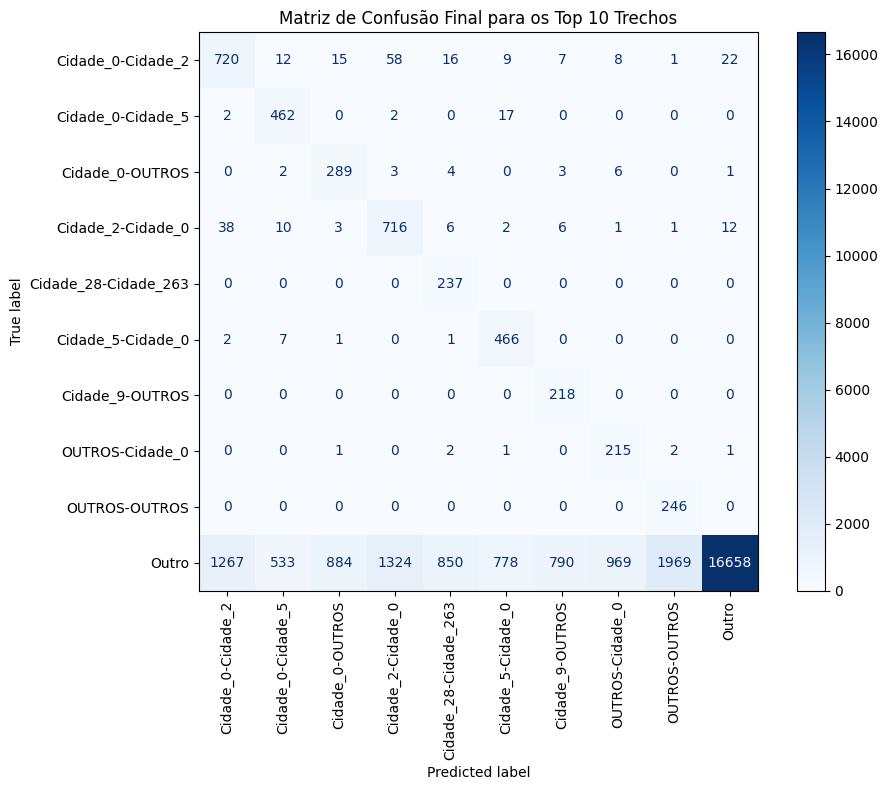

In [186]:
try:
    print("Iniciando a busca de parâmetros (pode levar alguns minutos)...")
    random_search.fit(X_train_final, y_train_final_encoded)
    print("\nOtimização concluída com sucesso!")
    print(f"Melhor F1-Score (Macro) encontrado na validação cruzada: {random_search.best_score_:.4f}")
    print("Melhores parâmetros encontrados:")
    print(random_search.best_params_)
except Exception as e:
    print("\nERRO: Ocorreu um erro durante a busca de parâmetros no RandomizedSearchCV.")
    print("Isso geralmente acontece se todas as combinações de parâmetros falharem na validação cruzada.")
    print(f"Erro original: {e}")


# --- PASSO 4: AVALIAÇÃO FINAL NO CONJUNTO DE TESTE ---
print("\n[PASSO 4/4] Avaliando o modelo final otimizado no conjunto de teste...")

# Verificação de segurança para garantir que a busca foi bem-sucedida
if hasattr(random_search, 'best_estimator_'):
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test_final)
    y_pred_proba = best_model.predict_proba(X_test_final)

    # --- AVALIAÇÃO COMPLETA ---
    print("\n--- Métricas de Performance Finais (Conjunto de Teste) ---")

    accuracy = accuracy_score(y_test_final_encoded, y_pred)
    print(f"Acurácia: {accuracy:.4f}")

    labels_para_auc = range(len(le_final.classes_))
    roc_auc = roc_auc_score(y_test_final_encoded, y_pred_proba, multi_class='ovr', average='weighted', labels=labels_para_auc)
    print(f"ROC AUC Score (Ponderado): {roc_auc:.4f}")

    print("\n--- Relatório de Classificação Detalhado (por trecho) ---")
    print(classification_report(y_test_final_encoded, y_pred, target_names=le_final.classes_))

    print("\n--- Matriz de Confusão Final (Conjunto de Teste) ---")
    fig, ax = plt.subplots(figsize=(10, 8))
    ConfusionMatrixDisplay.from_predictions(y_test_final_encoded, y_pred, ax=ax,
                                            display_labels=le_final.classes_,
                                            cmap=plt.cm.Blues,
                                            xticks_rotation='vertical')
    plt.title('Matriz de Confusão Final para os Top 10 Trechos')
    plt.tight_layout()
    plt.show()

else:
    print("\nAVALIAÇÃO NÃO REALIZADA: A busca por parâmetros no Passo 3 não foi concluída com sucesso.")
    print("Verifique os logs de erro do Passo 3 para diagnosticar o problema.")



## Modelo com Feature "Ultimo destino"

In [187]:
# ==============================================================================
# ESTRATÉGIA AVANÇADA: USAR O ÚLTIMO DESTINO COMO FEATURE PREDITIVA
# ==============================================================================
# Este script assume que df_train_final, df_val e df_test já foram criados
# e que as features '_agrupada' também já existem.
# ==============================================================================

# --- PASSO 1: ENGENHARIA DE FEATURES - CRIAR 'ultimo_destino_ida' E O NOVO ALVO ---
print("\n[PASSO 1/5] Criando features de estado (último destino) e o novo alvo...")

def criar_conjuntos_com_ultimo_destino(df_historico, df_futuro):
    """
    Cria conjuntos de treino/teste onde X contém o último destino do cliente
    e y é o destino da sua próxima compra.
    """
    # 1. Preparar a base de features (X)
    X_base = df_historico.sort_values('data_compra').groupby('id_cliente').tail(1).copy()
    X_base.rename(columns={'destino_ida_agrupada': 'ultimo_destino_ida'}, inplace=True)

    # 2. Preparar a base do alvo (y)
    y_base = df_futuro.sort_values('data_compra').groupby('id_cliente').first()[['destino_ida_agrupada']]
    y_base.rename(columns={'destino_ida_agrupada': 'proximo_destino'}, inplace=True)

    # 3. Juntar X e y pelo id_cliente
    dados_modelo = pd.merge(X_base, y_base, on='id_cliente', how='inner')

    # Adicionar a nova feature à lista de features que serão usadas
    features_reais = [col for col in dados_modelo.columns if col != 'proximo_destino']

    X_final = dados_modelo[features_reais]
    y_final = dados_modelo['proximo_destino']

    return X_final, y_final

# Criar os novos conjuntos de dados
X_train_estado, y_train_estado = criar_conjuntos_com_ultimo_destino(df_train_final_tratado, df_val_tratado)
X_test_estado, y_test_estado = criar_conjuntos_com_ultimo_destino(df_val_tratado, df_test_tratado)

print(f"Dados de treino criados com {len(X_train_estado)} amostras.")
print(f"Dados de teste criados com {len(X_test_estado)} amostras.")



[PASSO 1/5] Criando features de estado (último destino) e o novo alvo...
Dados de treino criados com 45556 amostras.
Dados de teste criados com 34967 amostras.


In [188]:
# --- PASSO 2: FILTRAR PARA OS TOP 10 DESTINOS ---
print("\n[PASSO 2/5] Focando o modelo nos 10 destinos mais populares...")

top_10_destinos = y_train_estado.value_counts().nlargest(10).index
y_train_top10 = y_train_estado[y_train_estado.isin(top_10_destinos)]
X_train_top10 = X_train_estado.loc[y_train_top10.index]

y_test_top10 = y_test_estado[y_test_estado.isin(top_10_destinos)]
X_test_top10 = X_test_estado.loc[y_test_top10.index]

print(f"Dados de treino focados em {len(X_train_top10)} amostras.")
print(f"Dados de teste focados em {len(X_test_top10)} amostras.")

# --- PASSO 3: ENCODING DO ALVO ---
print("\n[PASSO 3/5] Codificando a variável alvo...")
le_final = LabelEncoder()
y_train_encoded = le_final.fit_transform(y_train_top10)
y_test_encoded = le_final.transform(y_test_top10)

# --- PASSO 4: OTIMIZAÇÃO DE HIPERPARÂMETROS ---
print("\n[PASSO 4/5] Iniciando a otimização de hiperparâmetros...")

features_numericas = X_train_top10.select_dtypes(include=np.number).columns.tolist()
features_categoricas = X_train_top10.select_dtypes(include=['object', 'category']).columns.tolist()
if 'id_cliente' in features_categoricas: features_categoricas.remove('id_cliente')
if 'id_cliente' in features_numericas: features_numericas.remove('id_cliente')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas)],
    remainder='drop')

pipeline_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(random_state=42, class_weight='balanced'))])

param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__num_leaves': [20, 31],
    'classifier__max_depth': [-1, 10]}

random_search = RandomizedSearchCV(
    pipeline_final, param_distributions=param_dist, n_iter=4, cv=2,
    scoring='f1_macro', random_state=42, n_jobs=-1, verbose=1)

random_search.fit(X_train_top10, y_train_encoded)
print("\nMelhores parâmetros encontrados:", random_search.best_params_)


[PASSO 2/5] Focando o modelo nos 10 destinos mais populares...
Dados de treino focados em 22195 amostras.
Dados de teste focados em 15701 amostras.

[PASSO 3/5] Codificando a variável alvo...

[PASSO 4/5] Iniciando a otimização de hiperparâmetros...
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3784
[LightGBM] [Info] Number of data points in the train set: 22195, number of used features: 1154
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] 

In [189]:
# --- PASSO 5: AVALIAÇÃO FINAL ---
print("\n[PASSO 5/5] Avaliando o modelo final otimizado no conjunto de teste...")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_top10)
y_pred_proba = best_model.predict_proba(X_test_top10)

print("\n--- Métricas de Performance Finais (Conjunto de Teste) ---")
accuracy = accuracy_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba, multi_class='ovr', average='weighted')
f1_macro = f1_score(y_test_encoded, y_pred, average='macro')

print(f"Acurácia: {accuracy:.4f}")
print(f"ROC AUC (Ponderado): {roc_auc:.4f}")
print(f"F1-Score (Macro): {f1_macro:.4f}")

print("\n--- Relatório de Classificação Detalhado ---")
print(classification_report(y_test_encoded, y_pred, target_names=le_final.classes_))



[PASSO 5/5] Avaliando o modelo final otimizado no conjunto de teste...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names




--- Métricas de Performance Finais (Conjunto de Teste) ---
Acurácia: 0.5736
ROC AUC (Ponderado): 0.8776
F1-Score (Macro): 0.5488

--- Relatório de Classificação Detalhado ---
              precision    recall  f1-score   support

    Cidade_0       0.71      0.45      0.55      4467
  Cidade_106       0.34      0.42      0.38       413
   Cidade_17       0.48      0.64      0.55       855
    Cidade_2       0.59      0.63      0.61      2488
   Cidade_28       0.47      0.69      0.56       781
    Cidade_3       0.50      0.63      0.56      1171
    Cidade_5       0.54      0.66      0.60      1357
   Cidade_80       0.43      0.68      0.52       447
    Cidade_9       0.45      0.60      0.52       869
      OUTROS       0.70      0.60      0.65      2853

    accuracy                           0.57     15701
   macro avg       0.52      0.60      0.55     15701
weighted avg       0.60      0.57      0.57     15701



## Aplicando SMOTE para os dados

In [190]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (classification_report, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import seaborn as sns
# Imports para a nova pipeline com SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# ==============================================================================
# ESTRATÉGIA AVANÇADA: USAR O ÚLTIMO DESTINO COMO FEATURE PREDITIVA
# ==============================================================================
# Este script assume que df_train_final, df_val e df_test já foram criados.
# ==============================================================================

# --- PASSO 1: ENGENHARIA DE FEATURES - CRIAR 'ultimo_destino_ida' E O NOVO ALVO ---
print("\n[PASSO 1/5] Criando features de estado (último destino) e o novo alvo...")

def criar_conjuntos_com_ultimo_destino(df_historico, df_futuro, features_list):
    """
    Cria conjuntos de treino/teste onde X contém o último destino do cliente
    e y é o destino da sua próxima compra.
    """
    # Para cada cliente, pegamos seu último registro no histórico
    X_base = df_historico.sort_values('data_compra').groupby('id_cliente').tail(1).copy()
    # A nossa nova feature preditiva é o destino dessa última viagem
    X_base.rename(columns={'destino_ida_agrupada': 'ultimo_destino_ida'}, inplace=True)

    # Para cada cliente, pegamos sua primeira compra no período futuro
    y_base = df_futuro.sort_values('data_compra').groupby('id_cliente').first()[['destino_ida_agrupada']]
    y_base.rename(columns={'destino_ida_agrupada': 'proximo_destino'}, inplace=True)

    #  Juntar X e y pelo id_cliente
    dados_modelo = pd.merge(X_base, y_base, on='id_cliente', how='inner')

    # Adicionamos a nova feature à lista
    features_list_com_estado = features_list + ['ultimo_destino_ida']
    features_reais = [f for f in features_list_com_estado if f in dados_modelo.columns]

    X_final = dados_modelo[features_reais]
    y_final = dados_modelo['proximo_destino']

    return X_final, y_final

features_base = [
    'gmv_success', 'total_compras', 'quantidade_tickets', 'faixa_tickets_int',
    'periodo_compra_int', 'compras_anteriores', 'valor_acumulado',
    'cliente_recorrente', 'score_fidelidade', 'sazonalidade_score',
    'diversidade_destinos', 'diversidade_empresas', 'compra_ate_5_dias_feriado',
    'periodo_covid_int', 'tipo_dia_int', 'segmento', 'empresa_ida_agrupada'
]

X_train_estado, y_train_estado = criar_conjuntos_com_ultimo_destino(df_train_final_tratado, df_val_tratado, features_base)
X_test_estado, y_test_estado = criar_conjuntos_com_ultimo_destino(df_val_tratado, df_test_tratado, features_base)



[PASSO 1/5] Criando features de estado (último destino) e o novo alvo...


In [191]:
# --- PASSO 2: FILTRAR PARA OS TOP 10 DESTINOS ---
print("\n[PASSO 2/5] Focando o modelo nos 10 destinos mais populares...")

top_10_destinos = y_train_estado.value_counts().nlargest(10).index
y_train_top10 = y_train_estado[y_train_estado.isin(top_10_destinos)]
X_train_top10 = X_train_estado.loc[y_train_top10.index]

y_test_top10 = y_test_estado[y_test_estado.isin(top_10_destinos)]
X_test_top10 = X_test_estado.loc[y_test_top10.index]

print(f"Dados de treino focados em {len(X_train_top10)} amostras.")

le_final = LabelEncoder()
y_train_final_encoded = le_final.fit_transform(y_train_top10)
y_test_final_encoded = le_final.transform(y_test_top10)


# --- PASSO 3: DEFINIÇÃO DA PIPELINE COM SMOTE ---
print("\n[PASSO 3/5] Definindo a pipeline com pré-processamento e SMOTE...")

# Definindo o pré-processador de features
features_numericas = X_train_top10.select_dtypes(include=np.number).columns.tolist()
features_categoricas = X_train_top10.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, features_numericas),
    ('cat', categorical_transformer, features_categoricas)], remainder='drop')

# Criando a pipeline final com SMOTE usando a ImbPipeline
# A ImbPipeline garante que o SMOTE só seja aplicado nos dados de treino durante a validação cruzada
pipeline_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', lgb.LGBMClassifier(random_state=42))
])


[PASSO 2/5] Focando o modelo nos 10 destinos mais populares...
Dados de treino focados em 22195 amostras.

[PASSO 3/5] Definindo a pipeline com pré-processamento e SMOTE...



[PASSO 4/5] Iniciando a otimização de hiperparâmetros
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28053
[LightGBM] [Info] Number of data points in the train set: 59310, number of used features: 446
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names




--- Métricas de Performance Finais (com feature 'ultimo_destino' e SMOTE) ---
              precision    recall  f1-score   support

    Cidade_0       0.59      0.53      0.56      4467
  Cidade_106       0.39      0.38      0.38       413
   Cidade_17       0.47      0.45      0.46       855
    Cidade_2       0.57      0.54      0.56      2488
   Cidade_28       0.55      0.64      0.59       781
    Cidade_3       0.53      0.47      0.50      1171
    Cidade_5       0.52      0.54      0.53      1357
   Cidade_80       0.46      0.49      0.48       447
    Cidade_9       0.48      0.45      0.47       869
      OUTROS       0.57      0.70      0.63      2853

    accuracy                           0.55     15701
   macro avg       0.51      0.52      0.51     15701
weighted avg       0.55      0.55      0.55     15701


--- Matriz de Confusão Final ---


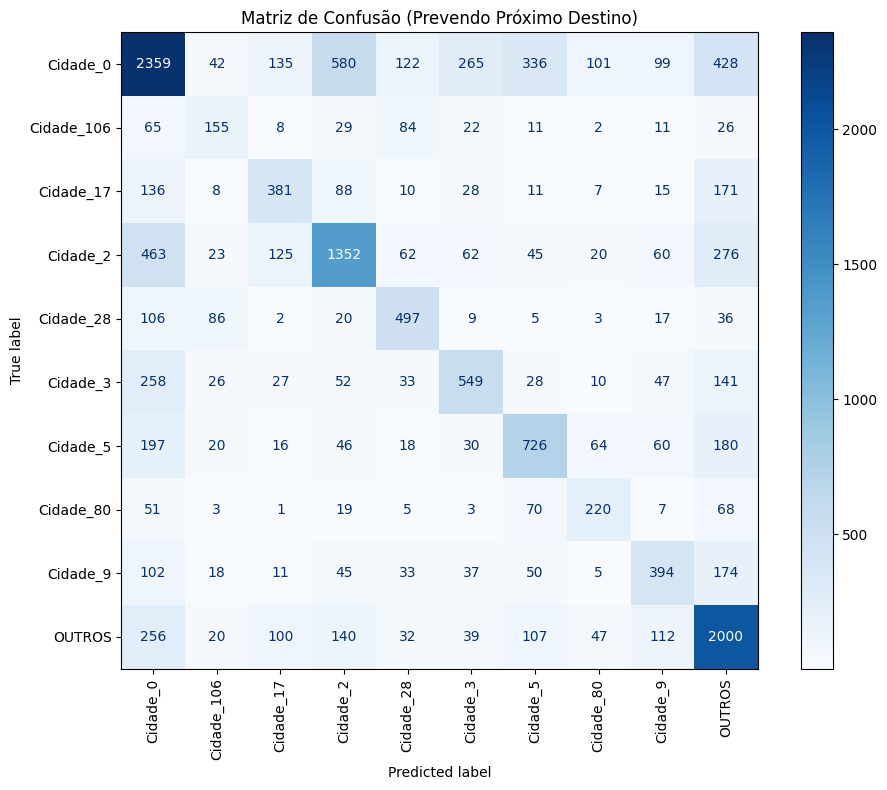

In [194]:
# --- PASSO 4: OTIMIZAÇÃO DE HIPERPARÂMETROS (VERSÃO RÁPIDA) ---
print("\n[PASSO 4/5] Iniciando a otimização de hiperparâmetros")

param_dist_rapido = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__num_leaves': [20, 31],
    'classifier__max_depth': [-1, 10]
}

random_search = RandomizedSearchCV(
    pipeline_smote,
    param_distributions=param_dist_rapido,
    n_iter=4,
    cv=2,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1,
    verbose=1
)
random_search.fit(X_train_top10, y_train_final_encoded)

print("\nMelhores parâmetros encontrados:")
print(random_search.best_params_)


# --- PASSO 5: AVALIAÇÃO FINAL NO CONJUNTO DE TESTE ---
print("\n[PASSO 5/5] Avaliando o modelo final com a nova feature...")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_top10)

# --- AVALIAÇÃO COMPLETA ---
print("\n--- Métricas de Performance Finais (com feature 'ultimo_destino' e SMOTE) ---")
print(classification_report(y_test_final_encoded, y_pred, target_names=le_final.classes_))

# Matriz de Confusão
print("\n--- Matriz de Confusão Final ---")
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_test_final_encoded, y_pred, ax=ax,
                                        display_labels=le_final.classes_,
                                        cmap=plt.cm.Blues,
                                        xticks_rotation='vertical')
plt.title("Matriz de Confusão (Prevendo Próximo Destino)")
plt.tight_layout()
plt.show()


--- Métricas de Performance Finais (Conjunto de Teste) ---
Acurácia: 0.5498
ROC AUC (Ponderado): 0.8776
F1-Score (Macro): 0.5142

--- Relatório de Classificação Detalhado ---
              precision    recall  f1-score   support

    Cidade_0       0.59      0.53      0.56      4467
  Cidade_106       0.39      0.38      0.38       413
   Cidade_17       0.47      0.45      0.46       855
    Cidade_2       0.57      0.54      0.56      2488
   Cidade_28       0.55      0.64      0.59       781
    Cidade_3       0.53      0.47      0.50      1171
    Cidade_5       0.52      0.54      0.53      1357
   Cidade_80       0.46      0.49      0.48       447
    Cidade_9       0.48      0.45      0.47       869
      OUTROS       0.57      0.70      0.63      2853

    accuracy                           0.55     15701
   macro avg       0.51      0.52      0.51     15701
weighted avg       0.55      0.55      0.55     15701


--- Matriz de Confusão Final ---


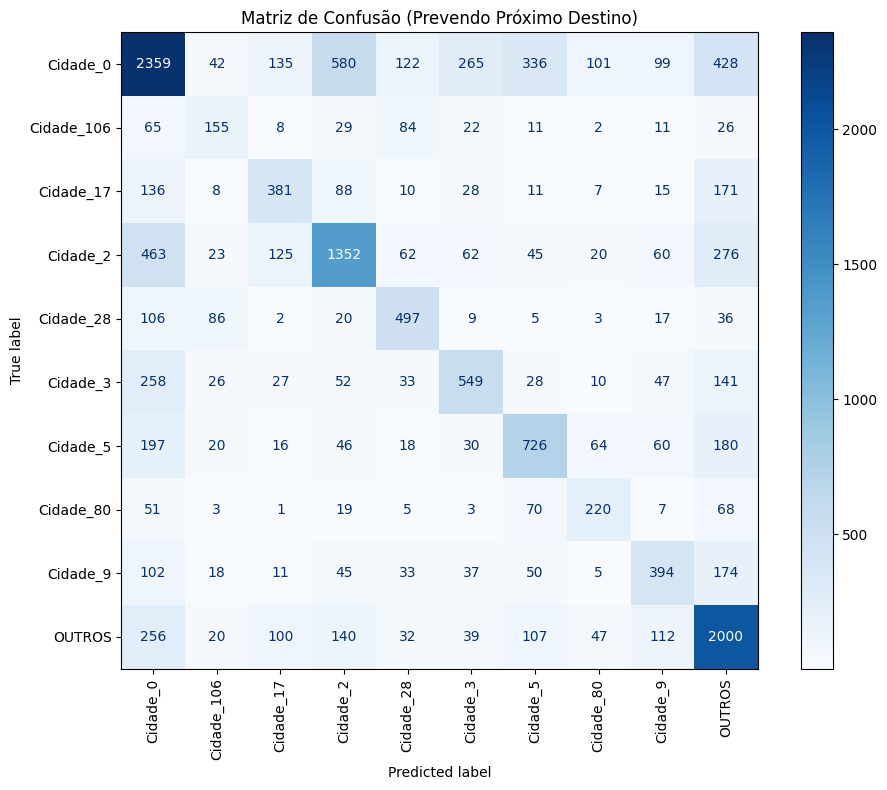

In [195]:
# --- AVALIAÇÃO COMPLETA (COM MÉTRICAS GERAIS) ---
print("\n--- Métricas de Performance Finais (Conjunto de Teste) ---")

# 1. Métricas Gerais
accuracy = accuracy_score(y_test_encoded, y_pred)
# É necessário garantir que todas as classes possíveis sejam passadas para roc_auc_score
labels_para_auc = range(len(le_final.classes_))
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba, multi_class='ovr', average='weighted', labels=labels_para_auc)
f1_macro = f1_score(y_test_encoded, y_pred, average='macro')

print(f"Acurácia: {accuracy:.4f}")
print(f"ROC AUC (Ponderado): {roc_auc:.4f}")
print(f"F1-Score (Macro): {f1_macro:.4f}")


# 2. Relatório Detalhado
print("\n--- Relatório de Classificação Detalhado ---")
print(classification_report(y_test_encoded, y_pred, target_names=le_final.classes_))


# 3. Matriz de Confusão
print("\n--- Matriz de Confusão Final ---")
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred, ax=ax,
                                        display_labels=le_final.classes_,
                                        cmap=plt.cm.Blues,
                                        xticks_rotation='vertical')
plt.title("Matriz de Confusão (Prevendo Próximo Destino)")
plt.tight_layout()
plt.show()

## Modelo final consolidado

In [196]:
# ==============================================================================
# ESTRATÉGIA FINAL CONSOLIDADA
# ==============================================================================
# Este script combina as melhores técnicas que descobrimos:
# 1. Dados de Treino + Validação
# 2. Feature de Estado ('ultimo_destino')
# 3. Balanceamento com SMOTE
# 4. Foco nos Top 10 pares de trechos
# ==============================================================================

# --- PASSO 1: CRIAÇÃO DOS CONJUNTOS DE DADOS BASE ---
print("\n[PASSO 1/6] Criando conjuntos de dados base com a feature 'ultimo_destino'...")

def criar_conjuntos_com_estado(df_historico, df_futuro):
    # Prepara a base de features (X) com o último estado conhecido
    X_base = df_historico.sort_values('data_compra').groupby('id_cliente').tail(1).copy()
    X_base.rename(columns={'destino_ida_agrupada': 'ultimo_destino_ida'}, inplace=True)

    # Prepara a base do alvo (y) com a próxima compra (trecho completo)
    df_futuro['trecho_ida_completo'] = df_futuro['origem_ida_agrupada'].astype(str) + '-' + df_futuro['destino_ida_agrupada'].astype(str)
    y_base = df_futuro.sort_values('data_compra').groupby('id_cliente').first()[['trecho_ida_completo']]
    y_base.rename(columns={'trecho_ida_completo': 'proximo_trecho'}, inplace=True)

    # Junta os dados
    dados_modelo = pd.merge(X_base, y_base, on='id_cliente', how='inner')

    features_reais = [col for col in dados_modelo.columns if col != 'proximo_trecho']
    X_final = dados_modelo[features_reais]
    y_final = dados_modelo['proximo_trecho']

    return X_final, y_final

# O conjunto de treino final usará df_train_final e df_val
X_train_full, y_train_full = criar_conjuntos_com_estado(df_train_final_tratado, df_val_tratado)
# O conjunto de teste final usará df_val e df_test
X_test, y_test = criar_conjuntos_com_estado(df_val_tratado, df_test_tratado)

print(f"Conjunto de treino completo criado com {len(X_train_full)} amostras.")
print(f"Conjunto de teste final criado com {len(X_test)} amostras.")


# --- PASSO 2: FILTRAR PARA OS TOP 10 TRECHOS ---
print("\n[PASSO 2/6] Focando o modelo nos 10 trechos mais populares...")
top_10_trechos = y_train_full.value_counts().nlargest(10).index
y_train_top10 = y_train_full[y_train_full.isin(top_10_trechos)]
X_train_top10 = X_train_full.loc[y_train_top10.index]

y_test_top10 = y_test[y_test.isin(top_10_trechos)]
X_test_top10 = X_test.loc[y_test_top10.index]
print(f"Dados de treino focados em {len(X_train_top10)} amostras.")


# --- PASSO 3: ENCODING DO ALVO ---
print("\n[PASSO 3/6] Codificando a variável alvo...")
le_final = LabelEncoder()
y_train_encoded = le_final.fit_transform(y_train_top10)
y_test_encoded = le_final.transform(y_test_top10)


[PASSO 1/6] Criando conjuntos de dados base com a feature 'ultimo_destino'...
Conjunto de treino completo criado com 45556 amostras.
Conjunto de teste final criado com 34967 amostras.

[PASSO 2/6] Focando o modelo nos 10 trechos mais populares...
Dados de treino focados em 6176 amostras.

[PASSO 3/6] Codificando a variável alvo...


In [197]:
# --- PASSO 4: DEFINIÇÃO DA PIPELINE COMPLETA (COM SMOTE) ---
print("\n[PASSO 4/6] Definindo o pipeline final de modelagem...")
features_numericas = X_train_top10.select_dtypes(include=np.number).columns.tolist()
features_categoricas = X_train_top10.select_dtypes(include=['object', 'category']).columns.tolist()
if 'id_cliente' in features_categoricas: features_categoricas.remove('id_cliente')
if 'id_cliente' in features_numericas: features_numericas.remove('id_cliente')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas)],
    remainder='drop')

pipeline_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', lgb.LGBMClassifier(random_state=42))])


# --- PASSO 5: OTIMIZAÇÃO DE HIPERPARÂMETROS ---
print("\n[PASSO 5/6] Iniciando a otimização de hiperparâmetros (versão rápida)...")
param_dist = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__num_leaves': [20, 31],
    'classifier__max_depth': [-1, 10]}

random_search = RandomizedSearchCV(
    pipeline_smote, param_distributions=param_dist, n_iter=8, cv=2,
    scoring='f1_macro', random_state=42, n_jobs=-1, verbose=1)

random_search.fit(X_train_top10, y_train_encoded)
print("\nMelhores parâmetros encontrados:", random_search.best_params_)


[PASSO 4/6] Definindo o pipeline final de modelagem...

[PASSO 5/6] Iniciando a otimização de hiperparâmetros (versão rápida)...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24709
[LightGBM] [Info] Number of data points in the train set: 11760, number of used features: 845
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start

In [198]:
# --- PASSO 6: AVALIAÇÃO FINAL ---
print("\n[PASSO 6/6] Avaliando o modelo final otimizado no conjunto de teste...")
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_top10)
y_pred_proba = best_model.predict_proba(X_test_top10)

print("\n--- Métricas de Performance Finais (Conjunto de Teste) ---")
accuracy = accuracy_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba, multi_class='ovr', average='weighted')
f1_macro = f1_score(y_test_encoded, y_pred, average='macro')

print(f"Acurácia: {accuracy:.4f}")
print(f"ROC AUC (Ponderado): {roc_auc:.4f}")
print(f"F1-Score (Macro): {f1_macro:.4f}")

print("\n--- Relatório de Classificação Detalhado ---")
print(classification_report(y_test_encoded, y_pred, target_names=le_final.classes_))



[PASSO 6/6] Avaliando o modelo final otimizado no conjunto de teste...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names




--- Métricas de Performance Finais (Conjunto de Teste) ---
Acurácia: 0.5237
ROC AUC (Ponderado): 0.8756
F1-Score (Macro): 0.5444

--- Relatório de Classificação Detalhado ---
                      precision    recall  f1-score   support

   Cidade_0-Cidade_2       0.46      0.51      0.48       868
   Cidade_0-Cidade_5       0.57      0.32      0.41       483
     Cidade_0-OUTROS       0.41      0.41      0.41       308
   Cidade_2-Cidade_0       0.55      0.48      0.51       795
Cidade_28-Cidade_263       0.52      0.59      0.55       237
   Cidade_5-Cidade_0       0.57      0.65      0.61       477
    Cidade_54-OUTROS       0.88      0.86      0.87       150
     Cidade_9-OUTROS       0.59      0.66      0.62       218
     OUTROS-Cidade_0       0.28      0.26      0.27       222
       OUTROS-OUTROS       0.61      0.87      0.71       246

            accuracy                           0.52      4004
           macro avg       0.54      0.56      0.54      4004
        weighted


--- Matriz de Confusão Final ---


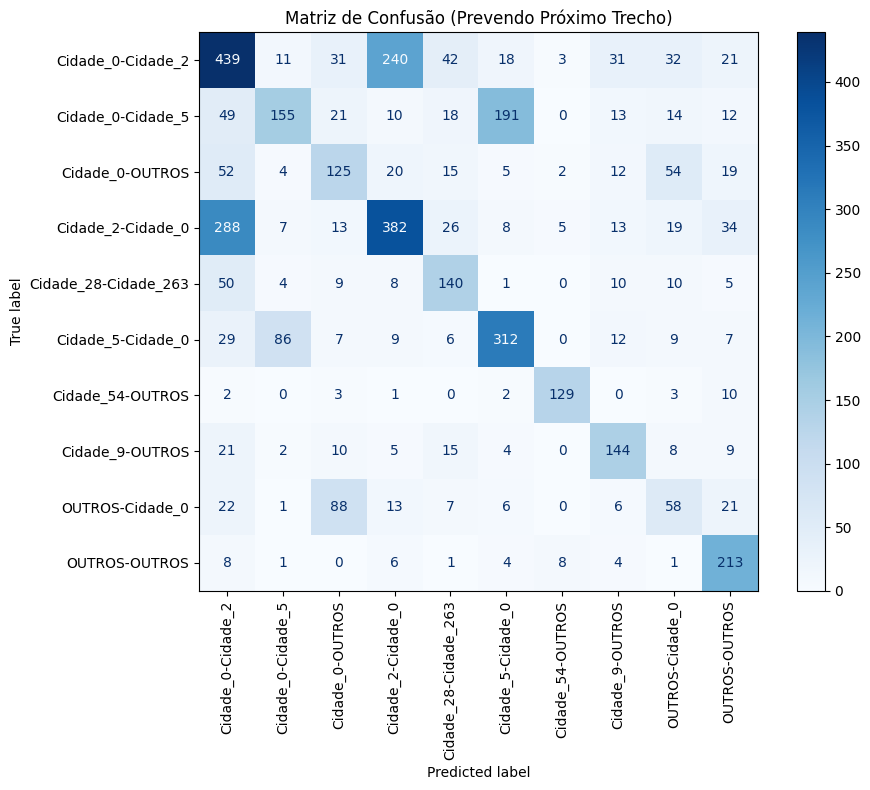

In [200]:
print("\n--- Matriz de Confusão Final ---")
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred, ax=ax,
                                        display_labels=le_final.classes_,
                                        cmap=plt.cm.Blues,
                                        xticks_rotation='vertical')
plt.title("Matriz de Confusão (Prevendo Próximo Trecho)")
plt.tight_layout()
plt.show()